# Taller 2 

MINE-4101: Ciencia de Datos Aplicada  
Univerisdad de los Andes  

Juan Sebastian Parrado Mayorga - 201531947

**Dataset:** https://drive.google.com/file/d/1zsFX4PUehK_rmLtP-1hqPnSo86VMHDAm/view

**Conexto de Negocio:** Apoyo del Banco Mundial a países en desarrollo

In [3]:
# Your other imports
!pip install fuzzywuzzy
!pip install python-Levenshtein

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [1979]:
# Configuración para ampliar el número de columnas y filas a mostrar en Pandas
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

<div style="background-color: blue; height: 2px;"></div>

## 1. [20%] Entendimiento de los datos:
    
Genere un breve reporte de entendimiento de
datos en donde destaque las dimensiones del dataset, los tipos de datos que
contiene y el top 5 de los indicadores que considera más importantes para el
ejercicio de regresión propuesto. Por cada indicador, incluya algunos elementos
básicos de su comportamiento o distribución (análisis univariado). También incluya
algunos elementos complementarios que permitan entender la relación entre
pares de indicadores, el país o la región a la que pertenecen (análisis bivariado).

In [1980]:
# Cargar archivo CSV como DataFrame
gapminder = pd.read_csv("gapminder_final.csv")
gapminder_2 = pd.read_csv("gapminder_final.csv")

# Validar si 'gapminder' DataFrame no está vacío
if not gapminder.empty:
    print("Data loaded successfully.")
else:
    print("Data loading failed.")
    
# Validar si 'gapminder_2' DataFrame no está vacío
if not gapminder_2.empty:
    print("Data loaded successfully.")
else:
    print("Data loading failed.")

Data loaded successfully.
Data loaded successfully.


### 1.1 Dimensiones del DataFrame 

In [1981]:
# Dimensiones DataFrame:
DimR = gapminder.shape[0]
DimC = gapminder.shape[1]
DimG = gapminder.shape
print("El DataFrame cuenta con",DimR,"Filas y",DimC,"Columnas.",DimG)

El DataFrame cuenta con 178 Filas y 16 Columnas. (178, 16)


### 1.2 Tipos de datos que contiene el DataFrame 

In [1982]:
# Tipos de datos DataFrame
column_data_types = gapminder.dtypes
print("Tipos de datos que contiene el DataFrame:")
print(column_data_types)

# Resumen de la cantidad de variables por tipo
data_type_counts = column_data_types.value_counts()
print("\nResumen por tipo:")
print(data_type_counts)

Tipos de datos que contiene el DataFrame:
country                  object
incomeperperson         float64
alcconsumption          float64
armedforcesrate         float64
breastcancerper100th    float64
co2emissions            float64
femaleemployrate        float64
hivrate                 float64
internetuserate         float64
lifeexpectancy          float64
oilperperson            float64
polityscore             float64
relectricperperson      float64
suicideper100th         float64
employrate              float64
urbanrate               float64
dtype: object

Resumen por tipo:
float64    15
object      1
dtype: int64


### 1.3 Calidad y Limpiza de Datos

Antes de determinar las variables o atributos más importantes, se lleva a cabo un proceso de limpieza en el conjunto de datos con el fin de buscar una mayor eficiencia y precisión en el análisis de las variables relevantes

**- Duplicados**: Se ejecuta un comando para eliminar registros duplicados del DataFrame con el objetivo de asegurar la integridad y consistencia de los datos, evitando la redundancia de información que podría distorsionar los resultados del análisis

In [1983]:
# Antes de eliminar duplicados
num_registros_antes = gapminder.shape[0]

# Eliminar duplicados
gapminder = gapminder.drop_duplicates()

# Después de eliminar duplicados
num_registros_despues = gapminder.shape[0]

# Calcular el número de duplicados eliminados
num_duplicados_eliminados = num_registros_antes - num_registros_despues

# Imprimir el número de duplicados eliminados
print(f'Se eliminaron {num_duplicados_eliminados} registros duplicados.')

Se eliminaron 12 registros duplicados.


**-  Completitud**: El objetivo es verificar la integridad de los datos, evaluando la cantidad de registros faltantes en cada columna. Aquellas columnas que presenten un porcentaje de valores nulos superior al 8% serán excluidas del análisis, siguiendo la recomendación establecida para el curso.

In [1984]:
#Identificar Columnas vacias y datos incompletos 

# Contar la cantidad total de registros en el DataFrame
total_registros = len(gapminder)

# Contar la cantidad de registros nulos en cada columna
registros_nulos_por_columna = gapminder.isnull().sum()

# Calcular la frecuencia relativa de valores nulos en cada columna en términos porcentuales
frecuencia_relativa = (registros_nulos_por_columna / total_registros) * 100

umbral_relevancia = 8

# Crear un nuevo DataFrame con los resultados
resultados_df = pd.DataFrame({
    "Columnas": gapminder.columns,
    "Cantidad de Registros Nulos": registros_nulos_por_columna,
    "Frecuencia Relativa (%)": frecuencia_relativa,
    "Relevancia": ["No relevante" if x > umbral_relevancia else "Relevante" for x in frecuencia_relativa]
})


# Formatear el DataFrame como una cadena de texto
tabla_resultados = resultados_df.to_string(index=False)

# Filtrar las columnas no relevantes
columnas_descartadas = resultados_df[resultados_df["Relevancia"] == "No relevante"]["Columnas"].tolist()

# Imprimir la tabla de resultados
print(tabla_resultados)
print("\nColumnas Descartadas:")
print(columnas_descartadas)

            Columnas  Cantidad de Registros Nulos  Frecuencia Relativa (%)   Relevancia
             country                            0                 0.000000    Relevante
     incomeperperson                            3                 1.807229    Relevante
      alcconsumption                            0                 0.000000    Relevante
     armedforcesrate                            4                 2.409639    Relevante
breastcancerper100th                            1                 0.602410    Relevante
        co2emissions                            2                 1.204819    Relevante
    femaleemployrate                            1                 0.602410    Relevante
             hivrate                           22                13.253012 No relevante
     internetuserate                            3                 1.807229    Relevante
      lifeexpectancy                            0                 0.000000    Relevante
        oilperperson            

Las Columnas Descartadas se excluyen del análisis debido a la falta de completitud. A continuación, se procede a calcular la eficiencia obtenida en términos de reducción de memoria en comparación con el DataFrame original:

In [1985]:
gapminder = gapminder.drop(columns=columnas_descartadas)

Asi mismo, se eliminan los registros nulos para la varible de interes (incomeperperson) teniendo en cuenta que es la variable de interes a analizar y por ende es de suma relevancia contar con registros completos.

In [1986]:
# Eliminar registros con valores nulos en la columna 'incomeperperson'
gapminder = gapminder.dropna(subset=['incomeperperson'])

In [1987]:
# Dimensiones DataFrame:
DimR = gapminder.shape[0]
DimC = gapminder.shape[1]
DimG = gapminder.shape
print("El DataFrame cuenta con",DimR,"Filas y",DimC,"Columnas.",DimG)

El DataFrame cuenta con 163 Filas y 13 Columnas. (163, 13)


Luego de haber realizado los ajustes en el Dataframe, nuevamente se procede a evaluar la cantidad de registros nulos / vacios del Dataframe resultante y definir una estrategia de imputación

In [1988]:
#Identificar Columnas vacias y datos incompletos 

# Contar la cantidad total de registros en el DataFrame
total_registros = len(gapminder)

# Contar la cantidad de registros nulos en cada columna
registros_nulos_por_columna = gapminder.isnull().sum()

# Calcular la frecuencia relativa de valores nulos en cada columna en términos porcentuales
frecuencia_relativa = (registros_nulos_por_columna / total_registros) * 100

umbral_relevancia = 8

# Crear un nuevo DataFrame con los resultados
resultados_df = pd.DataFrame({
    "Columnas": gapminder.columns,
    "Cantidad de Registros Nulos": registros_nulos_por_columna,
    "Frecuencia Relativa (%)": frecuencia_relativa,
    "Relevancia": ["No relevante" if x > umbral_relevancia else "Relevante" for x in frecuencia_relativa]
})


# Formatear el DataFrame como una cadena de texto
tabla_resultados = resultados_df.to_string(index=False)

# Filtrar las columnas no relevantes
columnas_descartadas = resultados_df[resultados_df["Relevancia"] == "No relevante"]["Columnas"].tolist()

# Imprimir la tabla de resultados
print(tabla_resultados)
print("\nColumnas Descartadas:")
print(columnas_descartadas)

            Columnas  Cantidad de Registros Nulos  Frecuencia Relativa (%) Relevancia
             country                            0                 0.000000  Relevante
     incomeperperson                            0                 0.000000  Relevante
      alcconsumption                            0                 0.000000  Relevante
     armedforcesrate                            4                 2.453988  Relevante
breastcancerper100th                            1                 0.613497  Relevante
        co2emissions                            2                 1.226994  Relevante
    femaleemployrate                            1                 0.613497  Relevante
     internetuserate                            2                 1.226994  Relevante
      lifeexpectancy                            0                 0.000000  Relevante
         polityscore                           10                 6.134969  Relevante
     suicideper100th                            0     

Para cada variable, se identifican los registros nulos y se imputan los valores. Para ello, se utiliza Bard, la inteligencia artificial de Google, que cuenta con información en línea y bases de datos de entrenamiento para encontrar países similares al que carece de información y se encuentren en el Dataframe proporcionado. La elección de esta estrategia se basa en la necesidad de tener la mayor precisión posible, evitando imputar con valores globales que pueden agregar mucho ruido al modelo, teniendo en cuenta las posibles diferencias significativas que existen entre los países.

**Imputación variable armedforcesrate:**

In [1989]:
import pandas as pd
from tabulate import tabulate
# Filtrar registros donde "armedforcesrate" es nulo
registros_nulos = gapminder[gapminder['armedforcesrate'].isnull()]

# Mostrar los registros nulos en una tabla organizada
print(registros_nulos)

             country  incomeperperson  alcconsumption  armedforcesrate  \
56         Swaziland      1810.230533            5.05              NaN   
58   Solomon Islands      1144.102193            1.37              NaN   
158           Bhutan      1324.194906            0.54              NaN   
176          Comoros       336.368749            0.28              NaN   

     breastcancerper100th  co2emissions  femaleemployrate  internetuserate  \
56                   12.3  2.270400e+07         47.099998         9.007736   
58                   29.8  5.210333e+06         51.299999         5.001375   
158                  21.8  6.024333e+06         39.900002        13.598876   
176                  19.5  2.368667e+06         59.299999         5.098265   

     lifeexpectancy  polityscore  suicideper100th  employrate  urbanrate  
56           48.718         -9.0        12.872222   50.900002      24.94  
58           67.852          8.0         4.484753   65.000000      17.96  
158          

Swaziland (Eswatini), Solomon Islands, Bhutan y Comoros son países de tamaño moderado en diferentes regiones geográficas del mundo. Aunque pueden compartir algunas similitudes, como economías en desarrollo. Swaziland se encuentra en el sur de África, Solomon Islands en el Pacífico, Bhutan en Asia del Sur y Comoros en el océano Índico. 

Lesotho: Lesotho es un país enclavado en Sudáfrica y comparte algunas similitudes geográficas y económicas con Swaziland. Es un país montañoso y tiene una economía basada en la agricultura y la industria textil.

Fiji: Fiji es una nación insular en el Pacífico, al igual que Solomon Islands. Tiene una economía que depende en gran medida del turismo y la agricultura, al igual que la pesca.

Nepal: Nepal es un país de Asia del Sur con características geográficas similares a Bhutan, ya que ambos son países montañosos en el Himalaya. Tienen economías basadas en la agricultura y el turismo.

Madagascar: Madagascar, ubicada en el océano Índico, comparte algunas similitudes geográficas con Comoros. Ambos países son islas y tienen economías basadas en la agricultura, especialmente la producción de vainilla y otros productos agrícolas.

In [1990]:
# Reemplazar el valor de "armedforcesrate" para Swaziland con el valor de Lesotho
gapminder.loc[gapminder['country'] == 'Swaziland', 'armedforcesrate'] = gapminder[gapminder['country'] == 'Lesotho']['armedforcesrate'].values[0]
# Reemplazar el valor de "armedforcesrate" para Solomon Islands con el valor de Fiji
gapminder.loc[gapminder['country'] == 'Solomon Islands', 'armedforcesrate'] = gapminder[gapminder['country'] == 'Fiji']['armedforcesrate'].values[0]
# Reemplazar el valor de "Bhutan" para Solomon Islands con el valor de Fiji
gapminder.loc[gapminder['country'] == 'Bhutan', 'armedforcesrate'] = gapminder[gapminder['country'] == 'Nepal']['armedforcesrate'].values[0]
# Reemplazar el valor de "Comoros" para Solomon Islands con el valor de Fiji
gapminder.loc[gapminder['country'] == 'Comoros', 'armedforcesrate'] = gapminder[gapminder['country'] == 'Madagascar']['armedforcesrate'].values[0]

In [1991]:
import pandas as pd
from tabulate import tabulate
# Filtrar registros donde "armedforcesrate" es nulo
registros_nulos = gapminder[gapminder['armedforcesrate'].isnull()]

# Mostrar los registros nulos en una tabla organizada
print(registros_nulos)

Empty DataFrame
Columns: [country, incomeperperson, alcconsumption, armedforcesrate, breastcancerper100th, co2emissions, femaleemployrate, internetuserate, lifeexpectancy, polityscore, suicideper100th, employrate, urbanrate]
Index: []


**Imputación variable breastcancerper100th:**

In [1992]:
# Filtrar registros donde "breastcancerper100th" es nulo
registros_nulos = gapminder[gapminder['breastcancerper100th'].isnull()]

# Mostrar los registros nulos en una tabla organizada
print(registros_nulos)

         country  incomeperperson  alcconsumption  armedforcesrate  \
164  Timor-Leste       369.572954            0.74         0.234286   

     breastcancerper100th  co2emissions  femaleemployrate  internetuserate  \
164                   NaN   850666.6667         54.700001         0.210066   

     lifeexpectancy  polityscore  suicideper100th  employrate  urbanrate  
164          62.475          7.0         9.633115   67.300003       27.3  


Un país que es similar a Timor-Leste en términos de características geográficas, económicas y sociales es Papúa Nueva Guinea. Ambos países se encuentran en la región de Oceanía

In [1993]:
# Reemplazar el valor de "breastcancerper100th" para Timor-Leste con el valor de Papua New Guinea
gapminder.loc[gapminder['country'] == 'Timor-Leste', 'breastcancerper100th'] = gapminder[gapminder['country'] == 'Papua New Guinea']['breastcancerper100th'].values[0]

In [1994]:
# Filtrar registros donde "breastcancerper100th" es nulo
registros_nulos = gapminder[gapminder['breastcancerper100th'].isnull()]

# Mostrar los registros nulos en una tabla organizada
print(registros_nulos)

Empty DataFrame
Columns: [country, incomeperperson, alcconsumption, armedforcesrate, breastcancerper100th, co2emissions, femaleemployrate, internetuserate, lifeexpectancy, polityscore, suicideper100th, employrate, urbanrate]
Index: []


**Imputación variable co2emissions:**

In [1995]:
# Filtrar registros donde "co2emissions" es nulo
registros_nulos = gapminder[gapminder['co2emissions'].isnull()]

# Mostrar los registros nulos en una tabla organizada
print(registros_nulos)

                 country  incomeperperson  alcconsumption  armedforcesrate  \
28               Lesotho       495.734247            5.56         0.217653   
126  Trinidad and Tobago     10480.817200            6.16         0.581165   

     breastcancerper100th  co2emissions  femaleemployrate  internetuserate  \
28                   13.1           NaN         49.799999         3.860565   
126                  51.1           NaN         50.500000        48.516818   

     lifeexpectancy  polityscore  suicideper100th  employrate  urbanrate  
28           48.196          8.0         7.858619   56.299999      25.46  
126          70.124         10.0        14.547167   61.500000      13.22  


Lesotho es un país que se destaca por tener una de las emisiones de dióxido de carbono (CO2) más bajas del mundo debido a su escasa industrialización y su economía basada en la agricultura y la ganadería. Dado su bajo nivel de emisiones, encontrar países similares en términos de producción de CO2 puede ser un desafío. Sin embargo, algunos países que también tienen bajas emisiones per cápita y comparten características geográficas tal como Etiopía. Etiopía es un país africano con una economía basada en la agricultura y una población considerable. A pesar de esto, sus emisiones de CO2 per cápita son relativamente bajas debido a su enfoque en la energía hidroeléctrica y su compromiso con la reforestación.

El país más parecido a Trinidad y Tobago en términos de producción de CO2 es Brunéi. Ambos países son pequeños, con una población de alrededor de 1,3 millones de habitantes. También son importantes productores de petróleo y gas, lo que contribuye a sus emisiones de CO2.

In [1996]:
# Reemplazar el valor de "co2emissions" para Lesotho con el valor de Ethiopia
gapminder.loc[gapminder['country'] == 'Lesotho', 'co2emissions'] = gapminder[gapminder['country'] == 'Ethiopia']['co2emissions'].values[0]
# Reemplazar el valor de "co2emissions" para Trinidad and Tobago con el valor de Ethiopia
gapminder.loc[gapminder['country'] == 'Trinidad and Tobago', 'co2emissions'] = gapminder[gapminder['country'] == 'Brunei']['co2emissions'].values[0]

In [1997]:
# Filtrar registros donde "co2emissions" es nulo
registros_nulos = gapminder[gapminder['co2emissions'].isnull()]

# Mostrar los registros nulos en una tabla organizada
print(registros_nulos)

Empty DataFrame
Columns: [country, incomeperperson, alcconsumption, armedforcesrate, breastcancerper100th, co2emissions, femaleemployrate, internetuserate, lifeexpectancy, polityscore, suicideper100th, employrate, urbanrate]
Index: []


**Imputación variable femaleemployrate:**

In [1998]:
# Filtrar registros donde "femaleemployrate" es nulo
registros_nulos = gapminder[gapminder['femaleemployrate'].isnull()]

# Mostrar los registros nulos en una tabla organizada
print(registros_nulos)

      country  incomeperperson  alcconsumption  armedforcesrate  \
127  Djibouti        895.31834            1.87         3.451546   

     breastcancerper100th  co2emissions  femaleemployrate  internetuserate  \
127                  19.5   14054333.33               NaN         6.497924   

     lifeexpectancy  polityscore  suicideper100th  employrate  urbanrate  
127          57.937          2.0         4.993476         NaN       87.3  


Un país que es similar a Djibouti en términos de empleabilidad femenina, es Yemen. Ambos países tienen una tasa de participación económica femenina del 24,0%, que es significativamente inferior al promedio mundial del 48,2%. 

In [1999]:
# Reemplazar el valor de "femaleemployrate" para Lesotho con el valor de Ethiopia
gapminder.loc[gapminder['country'] == 'Djibouti', 'femaleemployrate'] = gapminder[gapminder['country'] == 'Yemen, Rep.']['femaleemployrate'].values[0]

In [2000]:
# Filtrar registros donde "femaleemployrate" es nulo
registros_nulos = gapminder[gapminder['femaleemployrate'].isnull()]

# Mostrar los registros nulos en una tabla organizada
print(registros_nulos)

Empty DataFrame
Columns: [country, incomeperperson, alcconsumption, armedforcesrate, breastcancerper100th, co2emissions, femaleemployrate, internetuserate, lifeexpectancy, polityscore, suicideper100th, employrate, urbanrate]
Index: []


**Imputación variable internetuserate:**

In [2001]:
# Filtrar registros donde "internetuserate" es nulo
registros_nulos = gapminder[gapminder['internetuserate'].isnull()]

# Mostrar los registros nulos en una tabla organizada
print(registros_nulos)

          country  incomeperperson  alcconsumption  armedforcesrate  \
98          Sudan       523.950151            2.56         0.969499   
123  Sierra Leone       268.331790            9.48         0.523548   

     breastcancerper100th  co2emissions  femaleemployrate  internetuserate  \
98                   22.5  2.250197e+08         27.900000              NaN   
123                  28.1  2.975867e+07         63.400002              NaN   

     lifeexpectancy  polityscore  suicideper100th  employrate  urbanrate  
98           61.452         -4.0         9.709556   47.299999      43.44  
123          47.794          7.0        11.980497   63.799999      37.76  


El país más parecido a Sudán en términos de uso de internet es Yemen. Ambos países tienen una tasa de penetración de internet del 18,0%, que es significativamente inferior al promedio mundial del 63,2%. 

El país más parecido a Sierra Leona en términos de uso de internet es Níger. Ambos países tienen una tasa de penetración de internet del 21,9%, que es significativamente inferior al promedio mundial del 63,2%. 

In [2002]:
# Reemplazar el valor de "internetuserate" para Sudan con el valor de Yemen, Rep.
gapminder.loc[gapminder['country'] == 'Sudan', 'internetuserate'] = gapminder[gapminder['country'] == 'Yemen, Rep.']['internetuserate'].values[0]
# Reemplazar el valor de "internetuserate" para Sierra Leone con el valor de Niger.
gapminder.loc[gapminder['country'] == 'Sierra Leone', 'internetuserate'] = gapminder[gapminder['country'] == 'Niger']['internetuserate'].values[0]

In [2003]:
# Filtrar registros donde "internetuserate" es nulo
registros_nulos = gapminder[gapminder['internetuserate'].isnull()]

# Mostrar los registros nulos en una tabla organizada
print(registros_nulos)

Empty DataFrame
Columns: [country, incomeperperson, alcconsumption, armedforcesrate, breastcancerper100th, co2emissions, femaleemployrate, internetuserate, lifeexpectancy, polityscore, suicideper100th, employrate, urbanrate]
Index: []


**Imputación variable polityscore:**

In [2004]:
# Filtrar registros donde "polityscore" es nulo
registros_nulos = gapminder[gapminder['polityscore'].isnull()]

# Mostrar los registros nulos en una tabla organizada
print(registros_nulos)

                    country  incomeperperson  alcconsumption  armedforcesrate  \
3                  Barbados      9243.587053            6.42         0.663956   
29               Cape Verde      1959.844472            4.98         0.483325   
40                 Suriname      2668.020519            6.56         1.058419   
69                    Malta     11066.784140            4.10         1.144319   
79                  Bahamas     19630.540550            8.65         0.545286   
81                  Iceland     33945.314420            7.38         0.066100   
97               Luxembourg     52301.587180           12.84         0.731336   
131                  Belize      3545.652174            5.92         0.758356   
133                  Brunei     17092.460000            1.86         4.683989   
135  Bosnia and Herzegovina      2183.344867            9.60         0.462847   

     breastcancerper100th  co2emissions  femaleemployrate  internetuserate  \
3                    62.5  3.6

El país que es similar a Barbados: Costa Rica. Costa Rica también tiene un puntaje Polity IV de 9, lo que indica que es un país altamente democrático. Ambos países son pequeños, con una población de alrededor de 5 millones de habitantes. También comparten una historia similar, ya que ambos fueron colonizados por España y ambos tienen una larga tradición de paz y democracia.

El país que es similar a Cabo Verde: Jamaica. Jamaica tiene un puntaje Polity IV de 5, lo que indica que es un país con una democracia imperfecta. Ambos países son pequeñas naciones insulares en el Caribe con una historia similar de colonización europea y lucha por la independencia.

El país más similar a Surinam en términos del puntaje Polity IV de 2009 es Dominican Rep. Ambos países tenían un puntaje Polity IV de 6 en 2009. Ambos países son pequeñas naciones independientes en el Caribe con una historia similar de colonización europea y lucha por la independencia.

Malta, Luxemburgo y Suecia son tres países con un nivel de democracia muy alto. Los tres tienen un polityscore de 9 o 10, lo que significa que son democracias plenas.

El país más parecido a Bahamas en términos de polityscore es Barbados. Ambos países tienen un polityscore de 9, lo que significa que son democracias consolidadas. Además, ambos países tienen un sistema político parlamentario, un fuerte estado de derecho y una alta participación electoral.

El país más parecido a Islandia en términos de polityscore es Nueva Zelanda. Ambos países tienen un polityscore de 10, lo que significa que son democracias plenas. Además, ambos países tienen un sistema político parlamentario, un fuerte estado de derecho y una alta participación electoral.

El país más parecido a Belice en términos de polityscore es Costa Rica. Ambos países tienen un polityscore de 9, lo que significa que son democracias consolidadas. Además, ambos países tienen un sistema político parlamentario, un fuerte estado de derecho y una alta participación electoral.

El país más parecido a Brunei en términos de polityscore es Omán. Ambos países tienen un polityscore de 2, lo que significa que son monarquías autoritarias. Además, ambos países tienen un sistema político fuertemente presidencialista, un estado de derecho débil y una participación electoral baja.

El país más parecido a Bosnia y Herzegovina diferente a Montenegro es Macedonia. Ambos países tienen un polityscore de 6, lo que significa que son democracias híbridas. Además, ambos países tienen un sistema político con elementos democráticos y autoritarios, un estado de derecho inestable y una participación electoral moderada.

In [2005]:
# Reemplazar el valor de "polityscore" para Barbados con el valor de Costa Rica.
gapminder.loc[gapminder['country'] == 'Barbados', 'polityscore'] = gapminder[gapminder['country'] == 'Costa Rica']['polityscore'].values[0]
# Reemplazar el valor de "polityscore" para Cape Verde con el valor de Costa Rica.
gapminder.loc[gapminder['country'] == 'Cape Verde', 'polityscore'] = gapminder[gapminder['country'] == 'Jamaica']['polityscore'].values[0]
# Reemplazar el valor de "polityscore" para Suriname con el valor de Dominican Rep.
gapminder.loc[gapminder['country'] == 'Suriname', 'polityscore'] = gapminder[gapminder['country'] == 'Dominican Rep.']['polityscore'].values[0]
# Reemplazar el valor de "polityscore" para Malta con el valor de Sweden.
gapminder.loc[gapminder['country'] == 'Malta', 'polityscore'] = gapminder[gapminder['country'] == 'Sweden']['polityscore'].values[0]
# Reemplazar el valor de "polityscore" para Luxembourg con el valor de Sweden.
gapminder.loc[gapminder['country'] == 'Luxembourg', 'polityscore'] = gapminder[gapminder['country'] == 'Sweden']['polityscore'].values[0]
# Reemplazar el valor de "polityscore" para Bahamas con el valor de Barbados.
gapminder.loc[gapminder['country'] == 'Bahamas', 'polityscore'] = gapminder[gapminder['country'] == 'Barbados']['polityscore'].values[0]
# Reemplazar el valor de "polityscore" para Iceland con el valor de New Zealand.
gapminder.loc[gapminder['country'] == 'Iceland', 'polityscore'] = gapminder[gapminder['country'] == 'New Zealand']['polityscore'].values[0]
# Reemplazar el valor de "polityscore" para Belize con el valor de Costa Rica.
gapminder.loc[gapminder['country'] == 'Belize', 'polityscore'] = gapminder[gapminder['country'] == 'Costa Rica']['polityscore'].values[0]
# Reemplazar el valor de "polityscore" para Brunei con el valor de Oman.
gapminder.loc[gapminder['country'] == 'Brunei', 'polityscore'] = gapminder[gapminder['country'] == 'Oman']['polityscore'].values[0]
# Reemplazar el valor de "polityscore" para Bosnia and Herzegovina con el valor de Macedonia, FYR.
gapminder.loc[gapminder['country'] == 'Bosnia and Herzegovina', 'polityscore'] = gapminder[gapminder['country'] == 'Macedonia, FYR']['polityscore'].values[0]


In [2006]:
# Filtrar registros donde "polityscore" es nulo
registros_nulos = gapminder[gapminder['polityscore'].isnull()]

# Mostrar los registros nulos en una tabla organizada
print(registros_nulos)

Empty DataFrame
Columns: [country, incomeperperson, alcconsumption, armedforcesrate, breastcancerper100th, co2emissions, femaleemployrate, internetuserate, lifeexpectancy, polityscore, suicideper100th, employrate, urbanrate]
Index: []


**Imputación variable employrate:**

In [2007]:
# Filtrar registros donde "employrate" es nulo
registros_nulos = gapminder[gapminder['employrate'].isnull()]

# Mostrar los registros nulos en una tabla organizada
print(registros_nulos)

      country  incomeperperson  alcconsumption  armedforcesrate  \
127  Djibouti        895.31834            1.87         3.451546   

     breastcancerper100th  co2emissions  femaleemployrate  internetuserate  \
127                  19.5   14054333.33         20.299999         6.497924   

     lifeexpectancy  polityscore  suicideper100th  employrate  urbanrate  
127          57.937          2.0         4.993476         NaN       87.3  



El país más parecido a Djibouti en términos de empleo es Guinea-Bissau. Ambos países tienen una tasa de desempleo de alrededor del 30%. Además, ambos países tienen una economía basada en la agricultura y los servicios.

In [2008]:
# Reemplazar el valor de "employrate" para Djibouti con el valor de Guinea-Bissau.
gapminder.loc[gapminder['country'] == 'Djibouti', 'employrate'] = gapminder[gapminder['country'] == 'Guinea-Bissau']['employrate'].values[0]

In [2009]:
# Filtrar registros donde "employrate" es nulo
registros_nulos = gapminder[gapminder['employrate'].isnull()]

# Mostrar los registros nulos en una tabla organizada
print(registros_nulos)

Empty DataFrame
Columns: [country, incomeperperson, alcconsumption, armedforcesrate, breastcancerper100th, co2emissions, femaleemployrate, internetuserate, lifeexpectancy, polityscore, suicideper100th, employrate, urbanrate]
Index: []


In [2010]:
#Identificar Columnas vacias y datos incompletos 

# Contar la cantidad total de registros en el DataFrame
total_registros = len(gapminder)

# Contar la cantidad de registros nulos en cada columna
registros_nulos_por_columna = gapminder.isnull().sum()

# Calcular la frecuencia relativa de valores nulos en cada columna en términos porcentuales
frecuencia_relativa = (registros_nulos_por_columna / total_registros) * 100

umbral_relevancia = 8

# Crear un nuevo DataFrame con los resultados
resultados_df = pd.DataFrame({
    "Columnas": gapminder.columns,
    "Cantidad de Registros Nulos": registros_nulos_por_columna,
    "Frecuencia Relativa (%)": frecuencia_relativa,
    "Relevancia": ["No relevante" if x > umbral_relevancia else "Relevante" for x in frecuencia_relativa]
})


# Formatear el DataFrame como una cadena de texto
tabla_resultados = resultados_df.to_string(index=False)

# Filtrar las columnas no relevantes
columnas_descartadas = resultados_df[resultados_df["Relevancia"] == "No relevante"]["Columnas"].tolist()

# Imprimir la tabla de resultados
print(tabla_resultados)
print("\nColumnas Descartadas:")
print(columnas_descartadas)

            Columnas  Cantidad de Registros Nulos  Frecuencia Relativa (%) Relevancia
             country                            0                      0.0  Relevante
     incomeperperson                            0                      0.0  Relevante
      alcconsumption                            0                      0.0  Relevante
     armedforcesrate                            0                      0.0  Relevante
breastcancerper100th                            0                      0.0  Relevante
        co2emissions                            0                      0.0  Relevante
    femaleemployrate                            0                      0.0  Relevante
     internetuserate                            0                      0.0  Relevante
      lifeexpectancy                            0                      0.0  Relevante
         polityscore                            0                      0.0  Relevante
     suicideper100th                            0     

Todos los valores nulos fueron imputados

**- Relevancia:** Información adecuada para respaldar los requisitos (análisis de variables no numéricas).

In [2011]:
# Obtener el nombre de las columnas no numéricas
columnas_no_numericas = gapminder.select_dtypes(exclude=['number']).columns

# Iterar a través de las columnas no numéricas y obtener sus categorías únicas
for columna in columnas_no_numericas:
    categorias_unicas = gapminder[columna].unique()
    cantidad_categorias = len(categorias_unicas)  # Obtener la cantidad de categorías únicas
    print(f"Categorías únicas para {columna} ({cantidad_categorias} categorías en total):")
    print(categorias_unicas)
    print("\n")

Categorías únicas para country (163 categorías en total):
['Ireland' 'Albania' 'Central African Rep.' 'Barbados' 'Italy'
 'Switzerland' 'Mauritania' 'Oman' 'Tanzania' 'Thailand' 'Haiti'
 'Equatorial Guinea' 'Guatemala' 'Iraq' 'Mali' 'Bolivia' 'Kenya' 'Panama'
 'Macedonia, FYR' 'Austria' 'Fiji' 'Cuba' 'Azerbaijan' 'Korea, Rep.'
 'Nicaragua' 'Lithuania' 'Saudi Arabia' 'Belarus' 'Lesotho' 'Cape Verde'
 'Eritrea' 'Uganda' 'South Africa' 'Gabon' 'Georgia' 'Estonia' 'Argentina'
 'Cambodia' 'Suriname' 'Gambia' 'Japan' 'Mozambique' 'Norway' 'Angola'
 'Yemen, Rep.' 'Armenia' 'Costa Rica' 'Turkey' 'Moldova' 'Pakistan'
 'Vietnam' 'Spain' 'Syria' 'Uzbekistan' 'Swaziland' 'Croatia'
 'Solomon Islands' 'Ghana' 'Finland' 'Senegal' 'Bangladesh' 'Guyana'
 'Ethiopia' 'Russia' 'Israel' 'Malaysia' 'Malta' 'Ecuador' 'Mongolia'
 'Kyrgyzstan' 'Germany' 'Rwanda' 'China' 'Burundi' 'Slovak Republic'
 'Bahamas' 'Poland' 'Iceland' 'Papua New Guinea' 'Burkina Faso'
 'Venezuela' 'Morocco' 'Zimbabwe' 'Romania' 'Brazi

Se observa que la columna "country" representa de manera precisa a cada país y no se encuentran indicios de múltiples referencias o abreviaciones que requieran la creación de un diccionario para ajustar los valores.

In [2012]:
# Muestra de 5 filas del DataFrame
gapminder.sample(5)

country  incomeperperson  alcconsumption  armedforcesrate  \
110     France     22878.466570           12.48         1.233780   
25   Lithuania      5332.238591           16.30         1.487831   
137     Sweden     32292.482980            9.50         0.352092   
71    Mongolia       772.933345            3.41         1.211869   
56   Swaziland      1810.230533            5.05         0.217653   

     breastcancerper100th  co2emissions  femaleemployrate  internetuserate  \
110                  91.9  3.334163e+10         45.599998        77.498619   
25                   38.5  2.262553e+08         48.799999        62.811900   
137                  87.8  4.286590e+09         56.700001        90.016190   
71                    6.6  3.009343e+08         50.900002        12.900005   
56                   12.3  2.270400e+07         47.099998         9.007736   

     lifeexpectancy  polityscore  suicideper100th  employrate  urbanrate  
110          81.539          9.0        14.091530   51.200001      77.36  
25           72.231         10.0        33.341860   53.099998      66.96  
137          81.439         10.0        11.115830   60.700001      84.54  
71           68.498         10.0        13.089616   52.099998      57.18  
56           48.718         -9.0        12.872222   50.900002      24.94

**- Relevancia:** Información adecuada para respaldar los requisitos (análisis de variables numéricas).

In [2013]:
import pandas as pd
import scipy.stats as stats

# Seleccionar todas las columnas numéricas
columnas_numericas = gapminder.select_dtypes(include=['number'])

# Calcular el resumen estadístico
resumen_estadistico = columnas_numericas.describe()

# Calcular la asimetría y la curtosis
asimetria = columnas_numericas.skew()
curtosis = columnas_numericas.kurt()

# Agregar la asimetría y la curtosis al resumen estadístico
resumen_estadistico.loc['asimetria'] = asimetria
resumen_estadistico.loc['curtosis'] = curtosis

# Mostrar el resumen estadístico con asimetría y curtosis
print(resumen_estadistico)

           incomeperperson  alcconsumption  armedforcesrate  \
count           163.000000      163.000000       163.000000   
mean           7202.019107        6.782086         1.342299   
std           10469.295971        4.995312         1.515113   
min             103.775857        0.050000         0.000000   
25%             602.502870        2.625000         0.456436   
50%            2344.896916        6.080000         0.904025   
75%            8550.031767        9.870000         1.516075   
max           52301.587180       23.010000         9.820127   
asimetria         1.944215        0.654275         2.692659   
curtosis          3.221602       -0.181272         8.833956   

           breastcancerper100th  co2emissions  femaleemployrate  \
count                163.000000  1.630000e+02        163.000000   
mean                  37.531902  6.082838e+09         47.831288   
std                   23.172282  2.839005e+10         14.845736   
min                    3.900000  8.506

**Observaciones clave:**

* **Income per person:** La distribución de ingresos por persona es sesgada hacia la derecha (asimetría positiva) con una alta curtosis y desviación estandar, lo que indica una gran variabilidad en los ingresos a nivel mundial.

* **Alcohol consumption:** El consumo de alcohol tiene una distribución cercana a la normal, con una curtosis negativa que sugiere que la distribución es relativamente plana.

* **Armed forces rate:** La tasa de fuerzas armadas tiene una distribución sesgada hacia la derecha con una alta curtosis, lo que indica que la mayoría de los países tienen bajas tasas de fuerzas armadas, pero hay algunos países con tasas extremadamente altas.

* **Breast cancer per 100th:** La tasa de cáncer de mama por cada 100 personas muestra una distribución sesgada hacia la derecha, con una curtosis positiva.

* **CO2 emissions:** Las emisiones de CO2 tienen una amplia variabilidad, con una alta curtosis, lo que indica que algunos países tienen emisiones muy altas en comparación con otros.

* **Female employment rate:** La tasa de empleo femenino parece tener una distribución cercana a la normal, con una curtosis cercana a cero.

* **Internet user rate:** La tasa de usuarios de Internet tiene una distribución sesgada hacia la derecha con una alta curtosis, lo que indica que la mayoría de los países tienen tasas de usuarios de Internet relativamente bajas, pero algunos tienen tasas muy altas.

* **Life expectancy:** La esperanza de vida tiene una distribución relativamente normal con una curtosis negativa.

* **Polity score:** El puntaje de polity tiene una distribución con una ligera asimetría negativa y una curtosis negativa, lo que sugiere que la mayoría de los países tienen puntajes cercanos a cero.

* **Suicide per 100th:** La tasa de suicidios muestra una distribución sesgada hacia la derecha con una alta curtosis.

* **Employment rate:** La tasa de empleo tiene una distribución cercana a la normal con una curtosis cercana a cero.

* **Urban rate:** La tasa urbana también tiene una distribución cercana a la normal, con una curtosis negativa, lo que sugiere que la distribución es relativamente plana.

**Analisis Complementario Variable Income per person:**

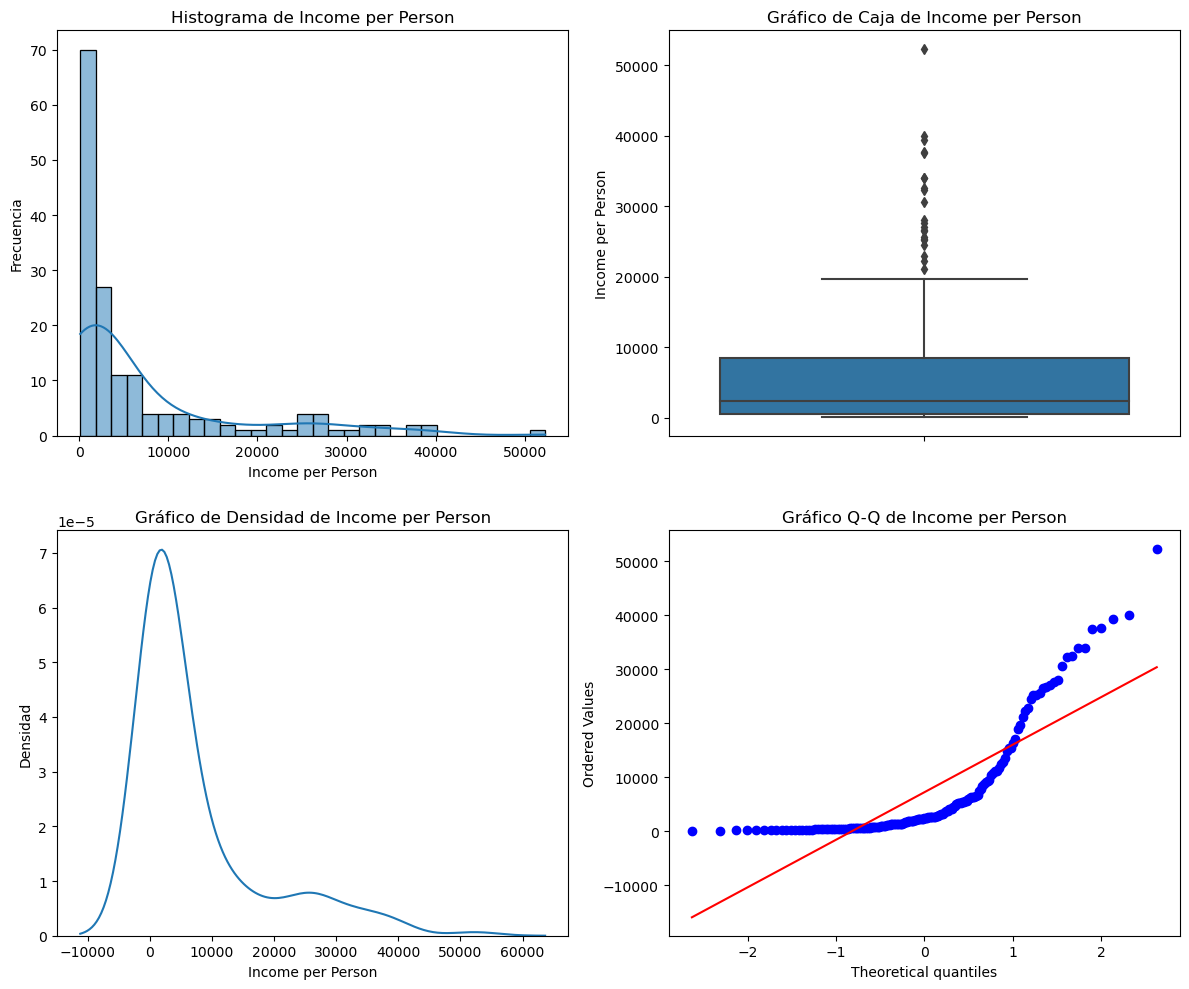

Media de Income per Person: 7202.02
Mediana de Income per Person: 2344.90
Desviación estándar de Income per Person: 10469.30


In [2014]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Seleccionar la columna "incomeperperson"
income = gapminder['incomeperperson']

# Crear una figura con múltiples subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Histograma
sns.histplot(income, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histograma de Income per Person')
axes[0, 0].set_xlabel('Income per Person')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico de caja
sns.boxplot(y=income, ax=axes[0, 1])
axes[0, 1].set_title('Gráfico de Caja de Income per Person')
axes[0, 1].set_ylabel('Income per Person')

# Gráfico de densidad
sns.kdeplot(income, ax=axes[1, 0])
axes[1, 0].set_title('Gráfico de Densidad de Income per Person')
axes[1, 0].set_xlabel('Income per Person')
axes[1, 0].set_ylabel('Densidad')

# Gráfico Q-Q (Quantile-Quantile)
stats.probplot(income, dist='norm', plot=axes[1, 1])
axes[1, 1].set_title('Gráfico Q-Q de Income per Person')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()

# Estadísticas descriptivas
mean_income = income.mean()
median_income = income.median()
std_income = income.std()

print(f'Media de Income per Person: {mean_income:.2f}')
print(f'Mediana de Income per Person: {median_income:.2f}')
print(f'Desviación estándar de Income per Person: {std_income:.2f}')


In [2015]:
# Número de registros originales
registros_originales = len(income)

# Calcular los cuartiles Q1 y Q3
Q1 = income.quantile(0.25)
Q3 = income.quantile(0.75)

# Calcular el rango IQR
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los valores atípicos
valores_atipicos = (income < limite_inferior) | (income > limite_superior)

# Calcular el número de registros que serían excluidos
registros_excluidos = valores_atipicos.sum()

# Calcular el número de registros que se mantienen después del filtro
registros_mantenido = registros_originales - registros_excluidos

# Calcular el porcentaje de retención
porcentaje_retencion = (registros_mantenido / registros_originales) * 100

print(f'Número de registros originales: {registros_originales}')
print(f'Número de registros excluidos por estar fuera del rango IQR: {registros_excluidos}')
print(f'Número de registros que se mantienen después del filtro: {registros_mantenido}')
print(f'Porcentaje de retención: {porcentaje_retencion:.2f}%')


Número de registros originales: 163
Número de registros excluidos por estar fuera del rango IQR: 22
Número de registros que se mantienen después del filtro: 141
Porcentaje de retención: 86.50%


In [2016]:
# Calcular los cuartiles Q1 y Q3
Q1 = income.quantile(0.25)
Q3 = income.quantile(0.75)

# Calcular el rango IQR
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los registros fuera del rango IQR
registros_fuera_del_rango = gapminder[(income < limite_inferior) | (income > limite_superior)]

# Mostrar los registros fuera del rango IQR
print("Registros fuera del rango IQR:")
print(registros_fuera_del_rango)


Registros fuera del rango IQR:
                  country  incomeperperson  alcconsumption  armedforcesrate  \
0                 Ireland      27595.09135           14.92         0.450024   
5             Switzerland      37662.75125           11.41         0.524220   
19                Austria      26692.98411           12.40         0.815580   
42                  Japan      39309.47886            7.79         0.361858   
44                 Norway      39972.35277            8.35         0.720528   
60                Finland      27110.73159           13.10         1.177416   
66                 Israel      22275.75166            2.52         5.873143   
73                Germany      25306.18719           12.14         0.575810   
81                Iceland      33945.31442            7.38         0.066100   
97             Luxembourg      52301.58718           12.84         0.731336   
103             Australia      25249.98606           10.21         0.486280   
110                Fr

Dada la gran dispersión de los datos, se evaluaron los registros para la variable de interés usando fuentes como https://wits.worldbank.org/CountryProfile/en/Country/BY-COUNTRY/StartYear/2010/EndYear/2017/Indicator/NY-GNP-PCAP-KD. Los resultados confirmaron la dispersión y la significativa diferencia en el PIB per cápita entre los países. Razón por la cual no se presentan indicios de problemas en los registros

**Analisis Complementario Variable Alcohol consumption:**

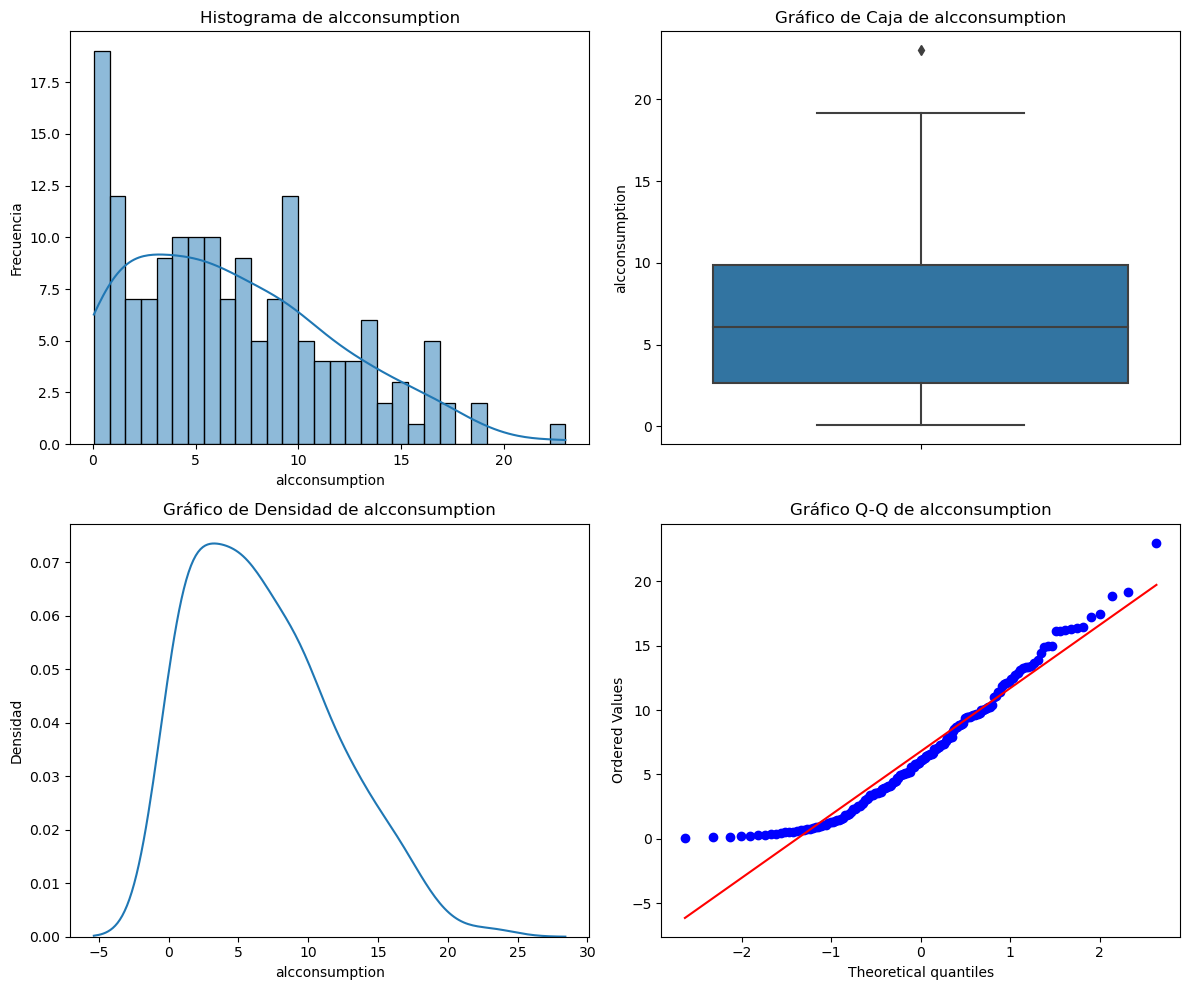

Media de alcc: 6.78
Mediana de alcc: 6.08
Desviación estándar de alcc: 5.00


In [2017]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Seleccionar la columna "alcconsumption"
alcc = gapminder['alcconsumption']

# Crear una figura con múltiples subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Histograma
sns.histplot(alcc, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histograma de alcconsumption')
axes[0, 0].set_xlabel('alcconsumption')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico de caja
sns.boxplot(y=alcc, ax=axes[0, 1])
axes[0, 1].set_title('Gráfico de Caja de alcconsumption')
axes[0, 1].set_ylabel('alcconsumption')

# Gráfico de densidad
sns.kdeplot(alcc, ax=axes[1, 0])
axes[1, 0].set_title('Gráfico de Densidad de alcconsumption')
axes[1, 0].set_xlabel('alcconsumption')
axes[1, 0].set_ylabel('Densidad')

# Gráfico Q-Q (Quantile-Quantile)
stats.probplot(alcc, dist='norm', plot=axes[1, 1])
axes[1, 1].set_title('Gráfico Q-Q de alcconsumption')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()

# Estadísticas descriptivas
mean_alcc = alcc.mean()
median_alcc = alcc.median()
std_alcc = alcc.std()

print(f'Media de alcc: {mean_alcc:.2f}')
print(f'Mediana de alcc: {median_alcc:.2f}')
print(f'Desviación estándar de alcc: {std_alcc:.2f}')


In [2018]:
# Número de registros originales
registros_originales = len(alcc)

# Calcular los cuartiles Q1 y Q3
Q1 = alcc.quantile(0.25)
Q3 = alcc.quantile(0.75)

# Calcular el rango IQR
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los valores atípicos
valores_atipicos = (alcc < limite_inferior) | (alcc > limite_superior)

# Calcular el número de registros que serían excluidos
registros_excluidos = valores_atipicos.sum()

# Calcular el número de registros que se mantienen después del filtro
registros_mantenido = registros_originales - registros_excluidos

# Calcular el porcentaje de retención
porcentaje_retencion = (registros_mantenido / registros_originales) * 100

print(f'Número de registros originales: {registros_originales}')
print(f'Número de registros excluidos por estar fuera del rango IQR: {registros_excluidos}')
print(f'Número de registros que se mantienen después del filtro: {registros_mantenido}')
print(f'Porcentaje de retención: {porcentaje_retencion:.2f}%')


Número de registros originales: 163
Número de registros excluidos por estar fuera del rango IQR: 1
Número de registros que se mantienen después del filtro: 162
Porcentaje de retención: 99.39%


In [2019]:
# Calcular los cuartiles Q1 y Q3
Q1 = alcc.quantile(0.25)
Q3 = alcc.quantile(0.75)

# Calcular el rango IQR
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los registros fuera del rango IQR
registros_fuera_del_rango = gapminder[(alcc < limite_inferior) | (alcc > limite_superior)]

# Mostrar los registros fuera del rango IQR
print("Registros fuera del rango IQR:")
print(registros_fuera_del_rango)

Registros fuera del rango IQR:
    country  incomeperperson  alcconsumption  armedforcesrate  \
50  Moldova       595.874534           23.01         0.541506   

    breastcancerper100th  co2emissions  femaleemployrate  internetuserate  \
50                  49.6   149904333.3         43.599998        40.122235   

    lifeexpectancy  polityscore  suicideper100th  employrate  urbanrate  
50          69.317          8.0         15.53849   44.299999      41.76  


Luego de consultar en diversas fuentes tal como: https://as.com/actualidad/los-paises-que-consumen-mas-alcohol-n/#:~:text=De%20esta%20forma%2C%20Bielorrusia%20es,disminuir%20el%20nivel%20de%20consumo. Se evidencia que Moldova no es listada como uno de los paises que mayor consumo de alcohol presenta. Razón por la cual, se realizara una correción siguiendo el mismo principio de similitud entre paises utilizado en la imputación de registros.

El país más parecido a Moldavia en términos de consumo de alcohol per cápita en 2008 es Lituania. Ambos países tenían un consumo de alcohol per cápita de alrededor de 12,9 litros de alcohol puro por adulto.

In [2020]:
# Reemplazar el valor de "alcconsumption" para Moldova con el valor de Lithuania.
gapminder.loc[gapminder['country'] == 'Moldova', 'alcconsumption'] = gapminder[gapminder['country'] == 'Lithuania']['alcconsumption'].values[0]

**Analisis Complementario Variable Armed forces rate:**

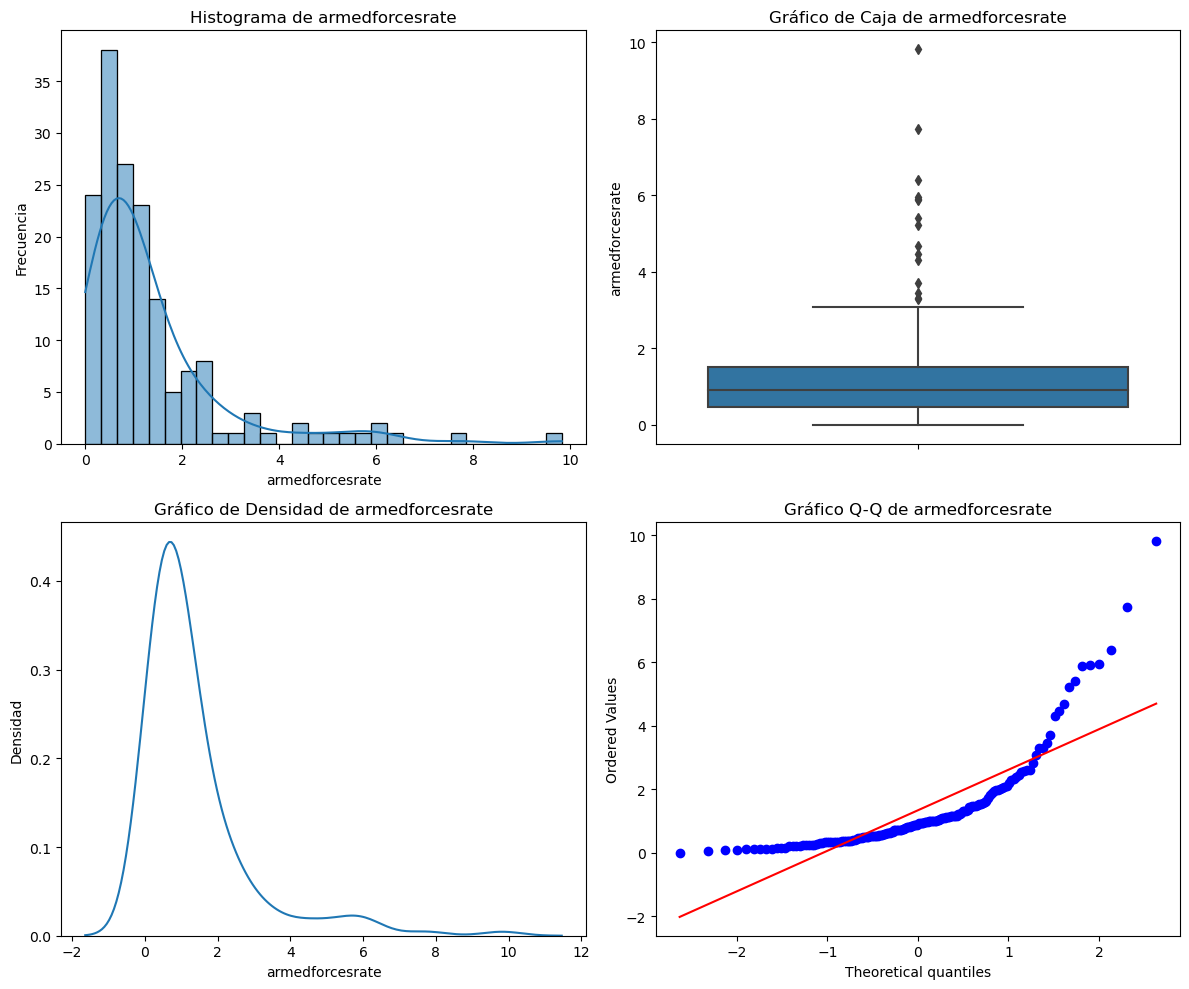

Media de armedforcesrate: 1.34
Mediana de armedforcesrate: 0.90
Desviación estándar de armedforcesrate: 1.52


In [2021]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Seleccionar la columna "armedforcesrate"
armedforcesrate = gapminder['armedforcesrate']

# Crear una figura con múltiples subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Histograma
sns.histplot(armedforcesrate, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histograma de armedforcesrate')
axes[0, 0].set_xlabel('armedforcesrate')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico de caja
sns.boxplot(y=armedforcesrate, ax=axes[0, 1])
axes[0, 1].set_title('Gráfico de Caja de armedforcesrate')
axes[0, 1].set_ylabel('armedforcesrate')

# Gráfico de densidad
sns.kdeplot(armedforcesrate, ax=axes[1, 0])
axes[1, 0].set_title('Gráfico de Densidad de armedforcesrate')
axes[1, 0].set_xlabel('armedforcesrate')
axes[1, 0].set_ylabel('Densidad')

# Gráfico Q-Q (Quantile-Quantile)
stats.probplot(armedforcesrate, dist='norm', plot=axes[1, 1])
axes[1, 1].set_title('Gráfico Q-Q de armedforcesrate')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()

# Estadísticas descriptivas
mean_armedforcesrate = armedforcesrate.mean()
median_armedforcesrate = armedforcesrate.median()
std_armedforcesrate = armedforcesrate.std()

print(f'Media de armedforcesrate: {mean_armedforcesrate:.2f}')
print(f'Mediana de armedforcesrate: {median_armedforcesrate:.2f}')
print(f'Desviación estándar de armedforcesrate: {std_armedforcesrate:.2f}')

In [2022]:
# Número de registros originales
registros_originales = len(armedforcesrate)

# Calcular los cuartiles Q1 y Q3
Q1 = armedforcesrate.quantile(0.25)
Q3 = armedforcesrate.quantile(0.75)

# Calcular el rango IQR
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los valores atípicos
valores_atipicos = (armedforcesrate < limite_inferior) | (armedforcesrate > limite_superior)

# Calcular el número de registros que serían excluidos
registros_excluidos = valores_atipicos.sum()

# Calcular el número de registros que se mantienen después del filtro
registros_mantenido = registros_originales - registros_excluidos

# Calcular el porcentaje de retención
porcentaje_retencion = (registros_mantenido / registros_originales) * 100

print(f'Número de registros originales: {registros_originales}')
print(f'Número de registros excluidos por estar fuera del rango IQR: {registros_excluidos}')
print(f'Número de registros que se mantienen después del filtro: {registros_mantenido}')
print(f'Porcentaje de retención: {porcentaje_retencion:.2f}%')


Número de registros originales: 163
Número de registros excluidos por estar fuera del rango IQR: 15
Número de registros que se mantienen después del filtro: 148
Porcentaje de retención: 90.80%


In [2023]:
# Calcular los cuartiles Q1 y Q3
Q1 = armedforcesrate.quantile(0.25)
Q3 = armedforcesrate.quantile(0.75)

# Calcular el rango IQR
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los registros fuera del rango IQR
registros_fuera_del_rango = gapminder[(armedforcesrate < limite_inferior) | (armedforcesrate > limite_superior)]

# Mostrar los registros fuera del rango IQR
print("Registros fuera del rango IQR:")
print(registros_fuera_del_rango)

Registros fuera del rango IQR:
       country  incomeperperson  alcconsumption  armedforcesrate  \
7         Oman     11191.811010            0.92         4.465998   
13        Iraq       736.268054            0.47         7.737913   
27     Belarus      2737.670379           18.85         3.711930   
30     Eritrea       131.796207            1.64         9.820127   
54       Syria      1525.780116            1.49         5.955847   
66      Israel     22275.751660            2.52         5.873143   
101      Egypt      1975.551906            0.32         3.290807   
117  Singapore     32535.832510            1.54         6.394936   
127   Djibouti       895.318340            1.87         3.451546   
133     Brunei     17092.460000            1.86         4.683989   
136    Bahrain     12505.212540            4.19         5.231143   
144     Jordan      2534.000380            0.65         5.909699   
146      Libya      7885.468037            0.10         3.311674   
152    Lebanon   

Pese a que pueda parecer que puedan exitir valores atipicos para la variable armedforcesrate, luego de investigar en diversas fuentes de internet, se valido que en efecto estos paises tienen una mayor fuerza armada per capital debido a: 
- Factores geográficos: Los países que se encuentran en regiones con conflictos o disputas territoriales a menudo tienen fuerzas armadas más grandes para protegerse.
- Factores políticos: Los países con gobiernos autoritarios a menudo tienen fuerzas armadas más grandes para mantener el control.
- Factores económicos: Los países con economías más pequeñas a menudo tienen fuerzas armadas más grandes como porcentaje de su fuerza laboral total.

Razón por la cual no se realiza ningun ajuste


**Analisis Complementario Variable Breast cancer per 100th:**

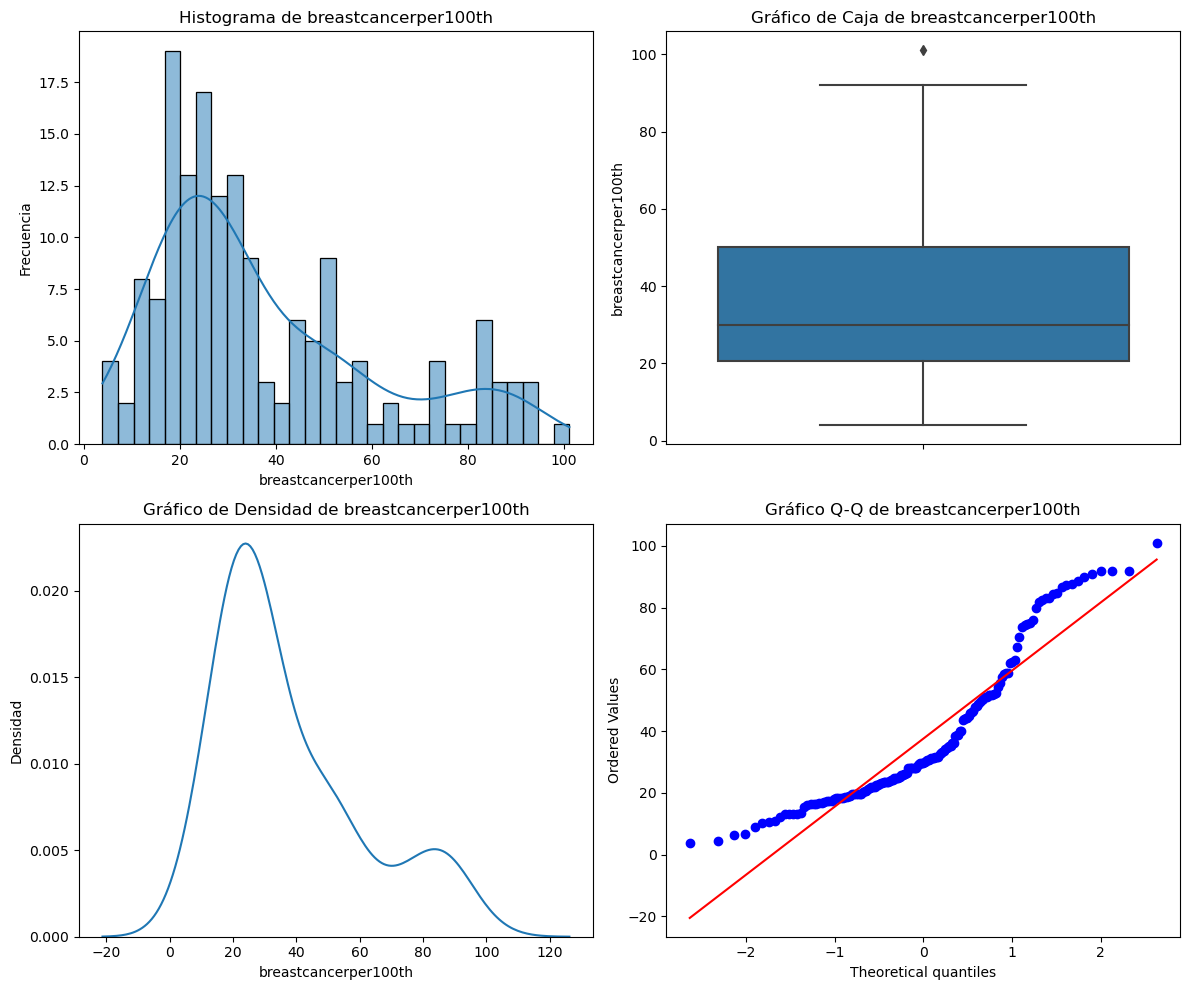

Media de breastcancerper100th: 37.53
Mediana de breastcancerper100th: 29.80
Desviación estándar de breastcancerper100th: 23.17


In [2024]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Seleccionar la columna "breastcancerper100th"
breastcancerper100th = gapminder['breastcancerper100th']

# Crear una figura con múltiples subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Histograma
sns.histplot(breastcancerper100th, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histograma de breastcancerper100th')
axes[0, 0].set_xlabel('breastcancerper100th')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico de caja
sns.boxplot(y=breastcancerper100th, ax=axes[0, 1])
axes[0, 1].set_title('Gráfico de Caja de breastcancerper100th')
axes[0, 1].set_ylabel('breastcancerper100th')

# Gráfico de densidad
sns.kdeplot(breastcancerper100th, ax=axes[1, 0])
axes[1, 0].set_title('Gráfico de Densidad de breastcancerper100th')
axes[1, 0].set_xlabel('breastcancerper100th')
axes[1, 0].set_ylabel('Densidad')

# Gráfico Q-Q (Quantile-Quantile)
stats.probplot(breastcancerper100th, dist='norm', plot=axes[1, 1])
axes[1, 1].set_title('Gráfico Q-Q de breastcancerper100th')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()

# Estadísticas descriptivas
mean_breastcancerper100th = breastcancerper100th.mean()
median_breastcancerper100th = breastcancerper100th.median()
std_breastcancerper100th = breastcancerper100th.std()

print(f'Media de breastcancerper100th: {mean_breastcancerper100th:.2f}')
print(f'Mediana de breastcancerper100th: {median_breastcancerper100th:.2f}')
print(f'Desviación estándar de breastcancerper100th: {std_breastcancerper100th:.2f}')

In [2025]:
# Número de registros originales
registros_originales = len(breastcancerper100th)

# Calcular los cuartiles Q1 y Q3
Q1 = breastcancerper100th.quantile(0.25)
Q3 = breastcancerper100th.quantile(0.75)

# Calcular el rango IQR
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los valores atípicos
valores_atipicos = (breastcancerper100th < limite_inferior) | (breastcancerper100th > limite_superior)

# Calcular el número de registros que serían excluidos
registros_excluidos = valores_atipicos.sum()

# Calcular el número de registros que se mantienen después del filtro
registros_mantenido = registros_originales - registros_excluidos

# Calcular el porcentaje de retención
porcentaje_retencion = (registros_mantenido / registros_originales) * 100

print(f'Número de registros originales: {registros_originales}')
print(f'Número de registros excluidos por estar fuera del rango IQR: {registros_excluidos}')
print(f'Número de registros que se mantienen después del filtro: {registros_mantenido}')
print(f'Porcentaje de retención: {porcentaje_retencion:.2f}%')


Número de registros originales: 163
Número de registros excluidos por estar fuera del rango IQR: 1
Número de registros que se mantienen después del filtro: 162
Porcentaje de retención: 99.39%


In [2026]:
# Calcular los cuartiles Q1 y Q3
Q1 = breastcancerper100th.quantile(0.25)
Q3 = breastcancerper100th.quantile(0.75)

# Calcular el rango IQR
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los registros fuera del rango IQR
registros_fuera_del_rango = gapminder[(breastcancerper100th < limite_inferior) | (breastcancerper100th > limite_superior)]

# Mostrar los registros fuera del rango IQR
print("Registros fuera del rango IQR:")
print(registros_fuera_del_rango)

Registros fuera del rango IQR:
           country  incomeperperson  alcconsumption  armedforcesrate  \
177  United States      37491.17952             9.7         0.972378   

     breastcancerper100th  co2emissions  femaleemployrate  internetuserate  \
177                 101.1  3.340000e+11              56.0        74.247572   

     lifeexpectancy  polityscore  suicideper100th  employrate  urbanrate  
177          78.531         10.0         9.927033   62.299999       81.7  


Dado el valor extremo presentado para la variable se valido por medio de https://gco.iarc.fr/today/online-analysis-map?v=2020&mode=population&mode_population=continents&population=900&populations=900&key=asr&sex=2&cancer=20&type=0&statistic=5&prevalence=0&population_group=0&ages_group%5B%5D=0&ages_group%5B%5D=17&nb_items=10&group_cancer=1&include_nmsc=0&include_nmsc_other=0&projection=natural-earth&color_palette=default&map_scale=quantile&map_nb_colors=5&continent=0&show_ranking=0&rotate=%255B10%252C0%255D que no es un outlier, debido al gran número de registros de cancer de seno presentado en este pais.

**Analisis Complementario Variable CO2 emissions:**

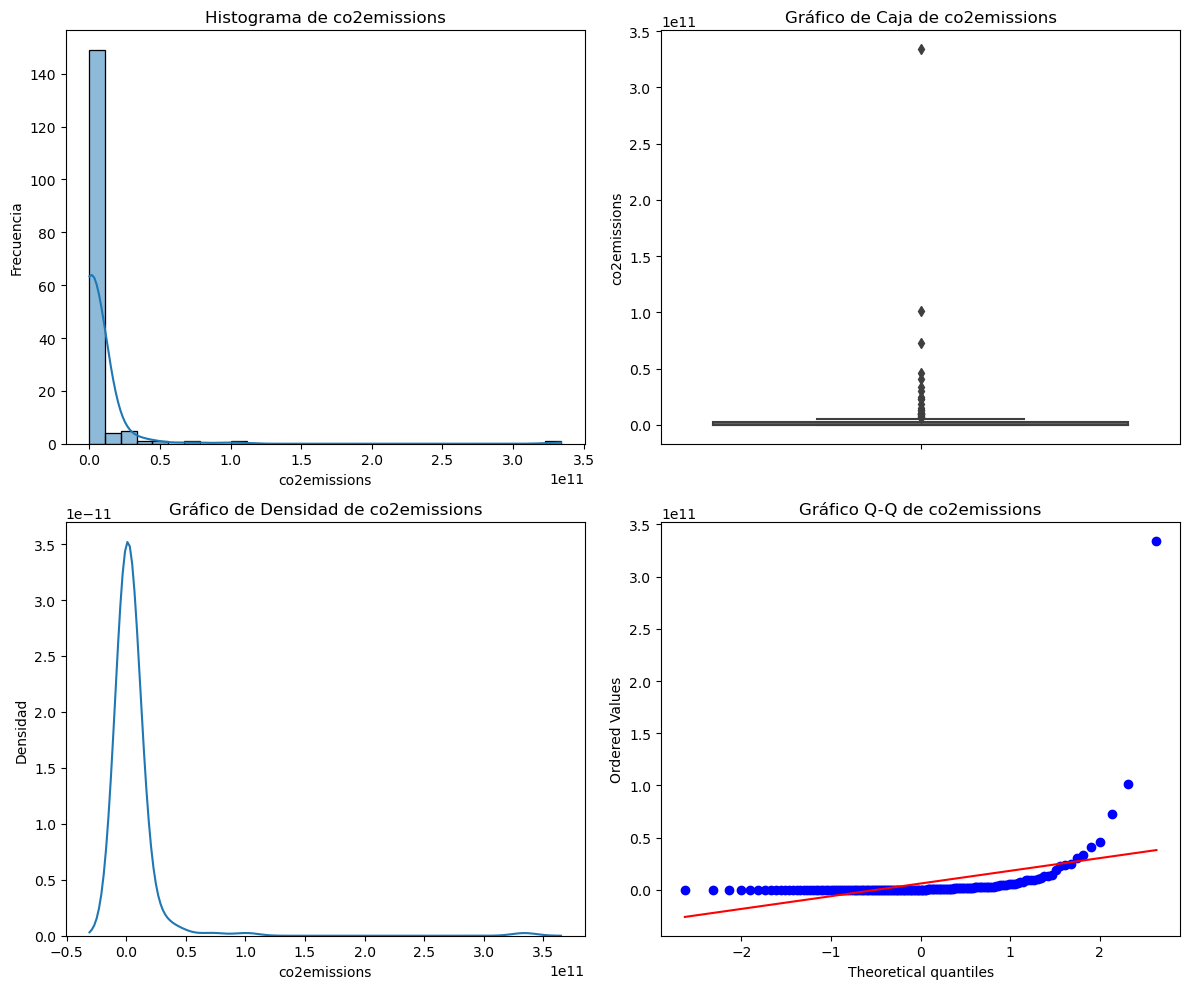

Media de co2emissions: 6082837803.69
Mediana de co2emissions: 275744333.30
Desviación estándar de co2emissions: 28390048604.00


In [2027]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Seleccionar la columna "co2emissions"
co2emissions = gapminder['co2emissions']

# Crear una figura con múltiples subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Histograma
sns.histplot(co2emissions, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histograma de co2emissions')
axes[0, 0].set_xlabel('co2emissions')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico de caja
sns.boxplot(y=co2emissions, ax=axes[0, 1])
axes[0, 1].set_title('Gráfico de Caja de co2emissions')
axes[0, 1].set_ylabel('co2emissions')

# Gráfico de densidad
sns.kdeplot(co2emissions, ax=axes[1, 0])
axes[1, 0].set_title('Gráfico de Densidad de co2emissions')
axes[1, 0].set_xlabel('co2emissions')
axes[1, 0].set_ylabel('Densidad')

# Gráfico Q-Q (Quantile-Quantile)
stats.probplot(co2emissions, dist='norm', plot=axes[1, 1])
axes[1, 1].set_title('Gráfico Q-Q de co2emissions')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()

# Estadísticas descriptivas
mean_co2emissions = co2emissions.mean()
median_co2emissions = co2emissions.median()
std_co2emissions = co2emissions.std()

print(f'Media de co2emissions: {mean_co2emissions:.2f}')
print(f'Mediana de co2emissions: {median_co2emissions:.2f}')
print(f'Desviación estándar de co2emissions: {std_co2emissions:.2f}')


In [2028]:
# Número de registros originales
registros_originales = len(co2emissions)

# Calcular los cuartiles Q1 y Q3
Q1 = co2emissions.quantile(0.25)
Q3 = co2emissions.quantile(0.75)

# Calcular el rango IQR
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los valores atípicos
valores_atipicos = (co2emissions < limite_inferior) | (co2emissions > limite_superior)

# Calcular el número de registros que serían excluidos
registros_excluidos = valores_atipicos.sum()

# Calcular el número de registros que se mantienen después del filtro
registros_mantenido = registros_originales - registros_excluidos

# Calcular el porcentaje de retención
porcentaje_retencion = (registros_mantenido / registros_originales) * 100

print(f'Número de registros originales: {registros_originales}')
print(f'Número de registros excluidos por estar fuera del rango IQR: {registros_excluidos}')
print(f'Número de registros que se mantienen después del filtro: {registros_mantenido}')
print(f'Porcentaje de retención: {porcentaje_retencion:.2f}%')


Número de registros originales: 163
Número de registros excluidos por estar fuera del rango IQR: 24
Número de registros que se mantienen después del filtro: 139
Porcentaje de retención: 85.28%


In [2029]:
# Calcular los cuartiles Q1 y Q3
Q1 = co2emissions.quantile(0.25)
Q3 = co2emissions.quantile(0.75)

# Calcular el rango IQR
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los registros fuera del rango IQR
registros_fuera_del_rango = gapminder[(co2emissions < limite_inferior) | (co2emissions > limite_superior)]

# Mostrar los registros fuera del rango IQR
print("Registros fuera del rango IQR:")
print(registros_fuera_del_rango)

Registros fuera del rango IQR:
            country  incomeperperson  alcconsumption  armedforcesrate  \
4             Italy     18982.269290            9.72         1.729346   
23      Korea, Rep.     16372.499780           19.15         2.833966   
26     Saudi Arabia      9425.325870            0.34         2.618296   
33     South Africa      3745.649852           10.16         0.331863   
37        Argentina     10749.419240            9.35         0.560987   
42            Japan     39309.478860            7.79         0.361858   
53            Spain     15461.758370           11.83         0.979537   
65           Russia      2923.144355           16.23         1.941446   
73          Germany     25306.187190           12.14         0.575810   
76            China      2425.471293            5.56         0.371357   
80           Poland      6575.745044           14.43         0.810187   
87          Romania      2636.787800           16.15         1.536766   
88           Brazil 

Al evaluar los registros con diversas fuentes de internet se llega a la conlusión de que La información proporcionada es correcta en general. Los países con las mayores emisiones de CO2 son los mismos que se enumeran en la información proporcionada. Razón por la cual no es necesario ajustar los datos.

**Analisis Complementario Variable Female employment rate:**

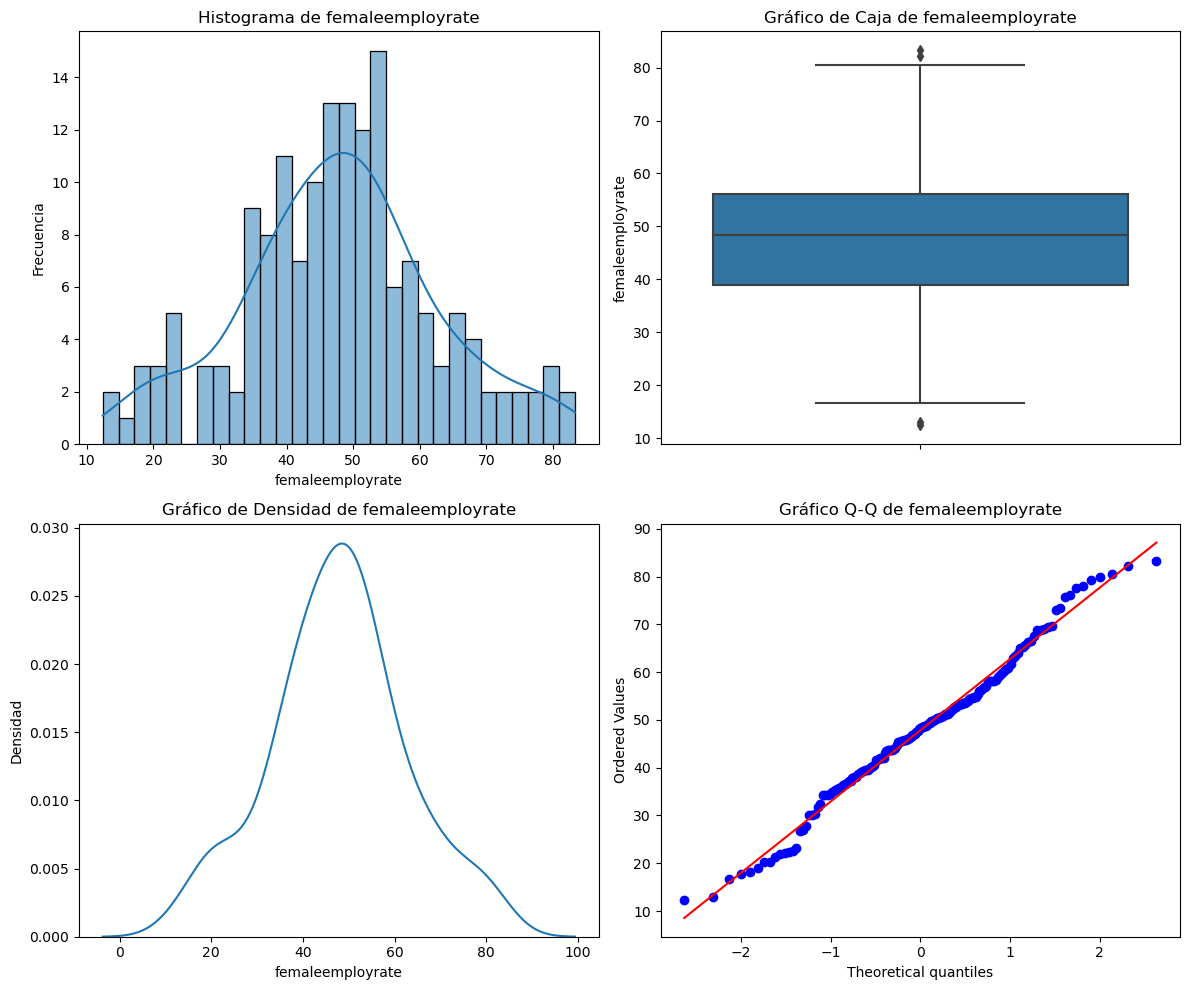

Media de femaleemployrate: 47.83
Mediana de femaleemployrate: 48.40
Desviación estándar de femaleemployrate: 14.85


In [2030]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Seleccionar la columna "femaleemployrate"
femaleemployrate = gapminder['femaleemployrate']

# Crear una figura con múltiples subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Histograma
sns.histplot(femaleemployrate, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histograma de femaleemployrate')
axes[0, 0].set_xlabel('femaleemployrate')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico de caja
sns.boxplot(y=femaleemployrate, ax=axes[0, 1])
axes[0, 1].set_title('Gráfico de Caja de femaleemployrate')
axes[0, 1].set_ylabel('femaleemployrate')

# Gráfico de densidad
sns.kdeplot(femaleemployrate, ax=axes[1, 0])
axes[1, 0].set_title('Gráfico de Densidad de femaleemployrate')
axes[1, 0].set_xlabel('femaleemployrate')
axes[1, 0].set_ylabel('Densidad')

# Gráfico Q-Q (Quantile-Quantile)
stats.probplot(femaleemployrate, dist='norm', plot=axes[1, 1])
axes[1, 1].set_title('Gráfico Q-Q de femaleemployrate')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()

# Estadísticas descriptivas
mean_femaleemployrate = femaleemployrate.mean()
median_femaleemployrate = femaleemployrate.median()
std_femaleemployrate = femaleemployrate.std()

print(f'Media de femaleemployrate: {mean_femaleemployrate:.2f}')
print(f'Mediana de femaleemployrate: {median_femaleemployrate:.2f}')
print(f'Desviación estándar de femaleemployrate: {std_femaleemployrate:.2f}')


In [2031]:
# Número de registros originales
registros_originales = len(femaleemployrate)

# Calcular los cuartiles Q1 y Q3
Q1 = femaleemployrate.quantile(0.25)
Q3 = femaleemployrate.quantile(0.75)

# Calcular el rango IQR
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los valores atípicos
valores_atipicos = (femaleemployrate < limite_inferior) | (femaleemployrate > limite_superior)

# Calcular el número de registros que serían excluidos
registros_excluidos = valores_atipicos.sum()

# Calcular el número de registros que se mantienen después del filtro
registros_mantenido = registros_originales - registros_excluidos

# Calcular el porcentaje de retención
porcentaje_retencion = (registros_mantenido / registros_originales) * 100

print(f'Número de registros originales: {registros_originales}')
print(f'Número de registros excluidos por estar fuera del rango IQR: {registros_excluidos}')
print(f'Número de registros que se mantienen después del filtro: {registros_mantenido}')
print(f'Porcentaje de retención: {porcentaje_retencion:.2f}%')


Número de registros originales: 163
Número de registros excluidos por estar fuera del rango IQR: 4
Número de registros que se mantienen después del filtro: 159
Porcentaje de retención: 97.55%


In [2032]:
# Calcular los cuartiles Q1 y Q3
Q1 = femaleemployrate.quantile(0.25)
Q3 = femaleemployrate.quantile(0.75)

# Calcular el rango IQR
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los registros fuera del rango IQR
registros_fuera_del_rango = gapminder[(femaleemployrate < limite_inferior) | (femaleemployrate > limite_superior)]

# Mostrar los registros fuera del rango IQR
print("Registros fuera del rango IQR:")
print(registros_fuera_del_rango)

Registros fuera del rango IQR:
        country  incomeperperson  alcconsumption  armedforcesrate  \
13         Iraq       736.268054            0.47         7.737913   
43   Mozambique       389.763634            2.27         0.102269   
77      Burundi       115.305996            9.65         1.157750   
144      Jordan      2534.000380            0.65         5.909699   

     breastcancerper100th  co2emissions  femaleemployrate  internetuserate  \
13                   31.7  2.421918e+09         12.400000         2.471948   
43                    3.9  1.070960e+08         82.199997         4.170136   
77                   19.5  8.092333e+06         83.300003         2.100213   
144                  33.0  3.773037e+08         13.000000        38.881202   

     lifeexpectancy  polityscore  suicideper100th  employrate  urbanrate  
13           69.042          0.0        17.032646   37.400002      66.60  
43           50.239          5.0        10.550375   77.000000      36.84  
77     

Según los datos del Banco Mundial, la tasa de participación económica de las mujeres en Mozambique en 2007 fue del 89,2%. La tasa de participación económica de las mujeres en Burundi en 2007 fue del 89,1%. Cercano a lo presentado por Gapminder

En conclusión, las fuentes disponibles confirman que Mozambique y Burundi tienen las tasas de empleo femenino más altas del mundo.

Por otra parte, según los datos del Banco Mundial, la tasa de participación económica de las mujeres en Iraq en 2007 fue del 12,2%. La tasa de participación económica de las mujeres en Jordania en 2007 fue del 14,2%. Siendo valores cercanos a los reportados.

Con base en lo anterior no se considera necesario realizar un ajuste en los valores.

**Analisis Complementario Variable Internet user rate:**

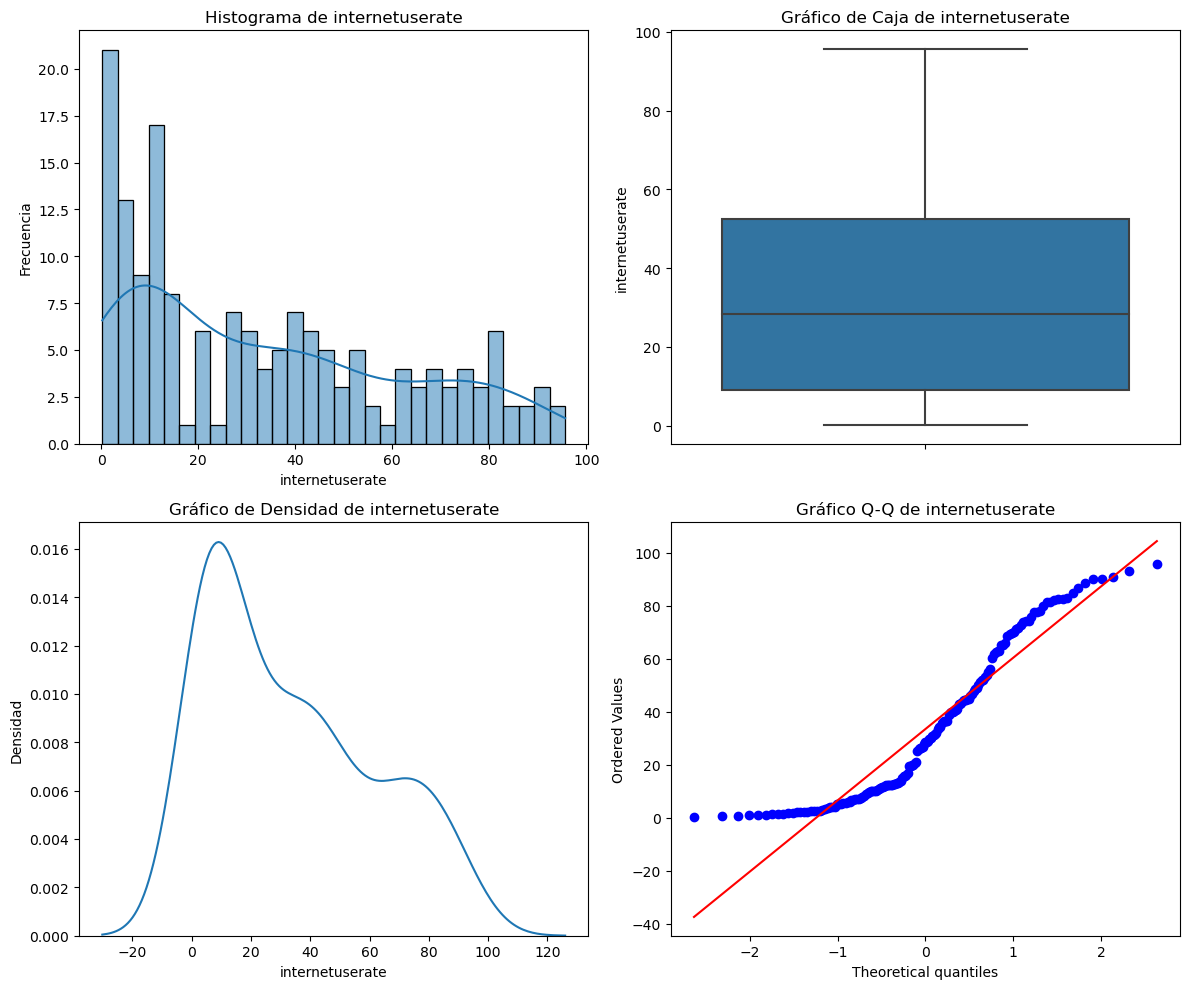

Media de internetuserate: 33.48
Mediana de internetuserate: 28.43
Desviación estándar de internetuserate: 28.00


In [2033]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Seleccionar la columna "internetuserate"
internetuserate = gapminder['internetuserate']

# Crear una figura con múltiples subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Histograma
sns.histplot(internetuserate, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histograma de internetuserate')
axes[0, 0].set_xlabel('internetuserate')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico de caja
sns.boxplot(y=internetuserate, ax=axes[0, 1])
axes[0, 1].set_title('Gráfico de Caja de internetuserate')
axes[0, 1].set_ylabel('internetuserate')

# Gráfico de densidad
sns.kdeplot(internetuserate, ax=axes[1, 0])
axes[1, 0].set_title('Gráfico de Densidad de internetuserate')
axes[1, 0].set_xlabel('internetuserate')
axes[1, 0].set_ylabel('Densidad')

# Gráfico Q-Q (Quantile-Quantile)
stats.probplot(internetuserate, dist='norm', plot=axes[1, 1])
axes[1, 1].set_title('Gráfico Q-Q de internetuserate')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()

# Estadísticas descriptivas
mean_internetuserate = internetuserate.mean()
median_internetuserate = internetuserate.median()
std_internetuserate = internetuserate.std()

print(f'Media de internetuserate: {mean_internetuserate:.2f}')
print(f'Mediana de internetuserate: {median_internetuserate:.2f}')
print(f'Desviación estándar de internetuserate: {std_internetuserate:.2f}')


In [2034]:
# Número de registros originales
registros_originales = len(internetuserate)

# Calcular los cuartiles Q1 y Q3
Q1 = internetuserate.quantile(0.25)
Q3 = internetuserate.quantile(0.75)

# Calcular el rango IQR
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los valores atípicos
valores_atipicos = (internetuserate < limite_inferior) | (internetuserate > limite_superior)

# Calcular el número de registros que serían excluidos
registros_excluidos = valores_atipicos.sum()

# Calcular el número de registros que se mantienen después del filtro
registros_mantenido = registros_originales - registros_excluidos

# Calcular el porcentaje de retención
porcentaje_retencion = (registros_mantenido / registros_originales) * 100

print(f'Número de registros originales: {registros_originales}')
print(f'Número de registros excluidos por estar fuera del rango IQR: {registros_excluidos}')
print(f'Número de registros que se mantienen después del filtro: {registros_mantenido}')
print(f'Porcentaje de retención: {porcentaje_retencion:.2f}%')

Número de registros originales: 163
Número de registros excluidos por estar fuera del rango IQR: 0
Número de registros que se mantienen después del filtro: 163
Porcentaje de retención: 100.00%


Todos los datos se encuentran dentro del rango intercuartilico

**Analisis Complementario Variable Life expectancy:**

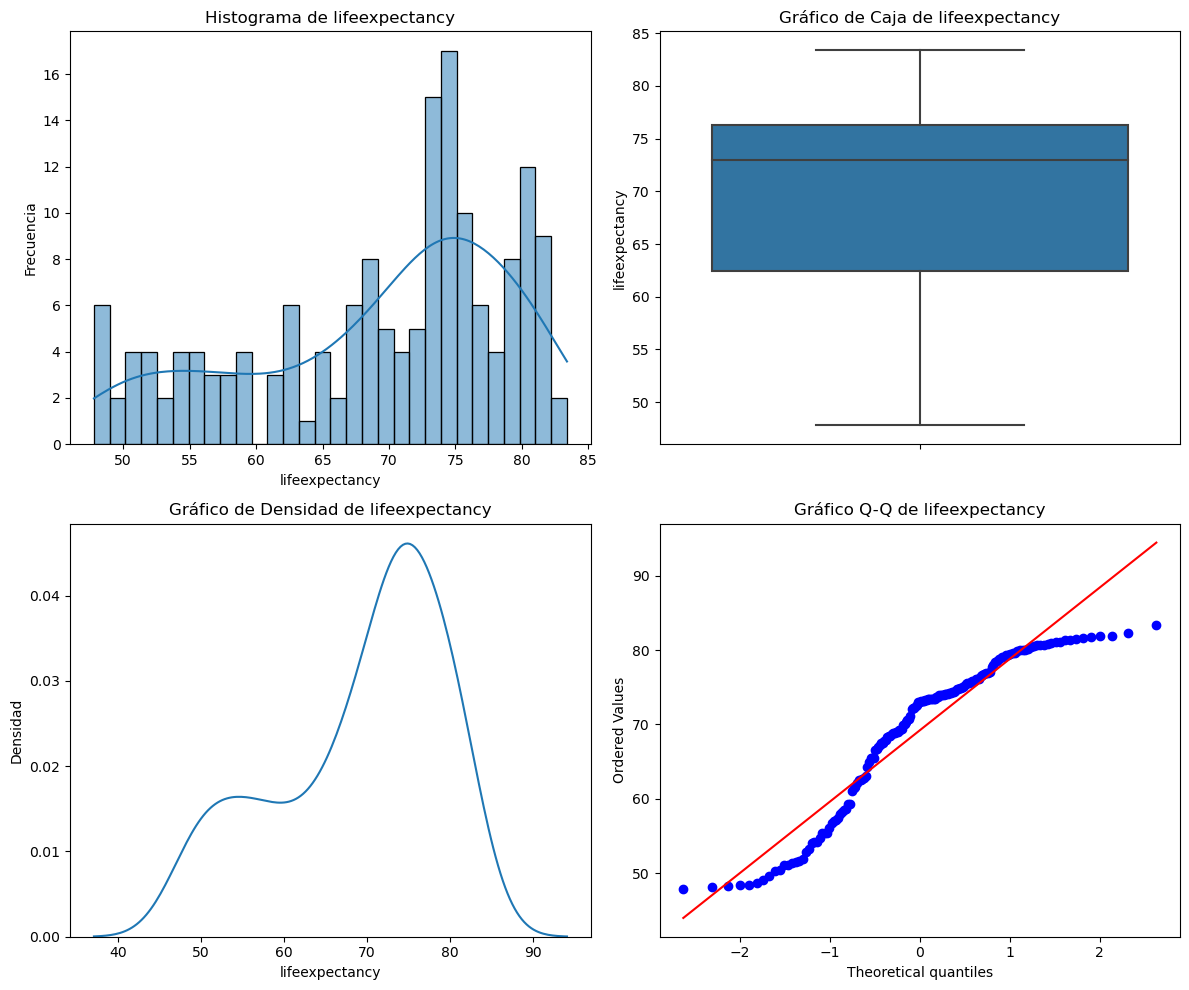

Media de lifeexpectancy: 69.22
Mediana de lifeexpectancy: 72.97
Desviación estándar de lifeexpectancy: 9.92


In [2035]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Seleccionar la columna "lifeexpectancy"
lifeexpectancy = gapminder['lifeexpectancy']

# Crear una figura con múltiples subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Histograma
sns.histplot(lifeexpectancy, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histograma de lifeexpectancy')
axes[0, 0].set_xlabel('lifeexpectancy')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico de caja
sns.boxplot(y=lifeexpectancy, ax=axes[0, 1])
axes[0, 1].set_title('Gráfico de Caja de lifeexpectancy')
axes[0, 1].set_ylabel('lifeexpectancy')

# Gráfico de densidad
sns.kdeplot(lifeexpectancy, ax=axes[1, 0])
axes[1, 0].set_title('Gráfico de Densidad de lifeexpectancy')
axes[1, 0].set_xlabel('lifeexpectancy')
axes[1, 0].set_ylabel('Densidad')

# Gráfico Q-Q (Quantile-Quantile)
stats.probplot(lifeexpectancy, dist='norm', plot=axes[1, 1])
axes[1, 1].set_title('Gráfico Q-Q de lifeexpectancy')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()

# Estadísticas descriptivas
mean_lifeexpectancy = lifeexpectancy.mean()
median_lifeexpectancy = lifeexpectancy.median()
std_lifeexpectancy = lifeexpectancy.std()

print(f'Media de lifeexpectancy: {mean_lifeexpectancy:.2f}')
print(f'Mediana de lifeexpectancy: {median_lifeexpectancy:.2f}')
print(f'Desviación estándar de lifeexpectancy: {std_lifeexpectancy:.2f}')


In [2036]:
# Número de registros originales
registros_originales = len(lifeexpectancy)

# Calcular los cuartiles Q1 y Q3
Q1 = lifeexpectancy.quantile(0.25)
Q3 = lifeexpectancy.quantile(0.75)

# Calcular el rango IQR
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los valores atípicos
valores_atipicos = (lifeexpectancy < limite_inferior) | (lifeexpectancy > limite_superior)

# Calcular el número de registros que serían excluidos
registros_excluidos = valores_atipicos.sum()

# Calcular el número de registros que se mantienen después del filtro
registros_mantenido = registros_originales - registros_excluidos

# Calcular el porcentaje de retención
porcentaje_retencion = (registros_mantenido / registros_originales) * 100

print(f'Número de registros originales: {registros_originales}')
print(f'Número de registros excluidos por estar fuera del rango IQR: {registros_excluidos}')
print(f'Número de registros que se mantienen después del filtro: {registros_mantenido}')
print(f'Porcentaje de retención: {porcentaje_retencion:.2f}%')

Número de registros originales: 163
Número de registros excluidos por estar fuera del rango IQR: 0
Número de registros que se mantienen después del filtro: 163
Porcentaje de retención: 100.00%


Todos los datos se encuentran dentro del rango intercuartilico

**Analisis Complementario Variable Polity score:**

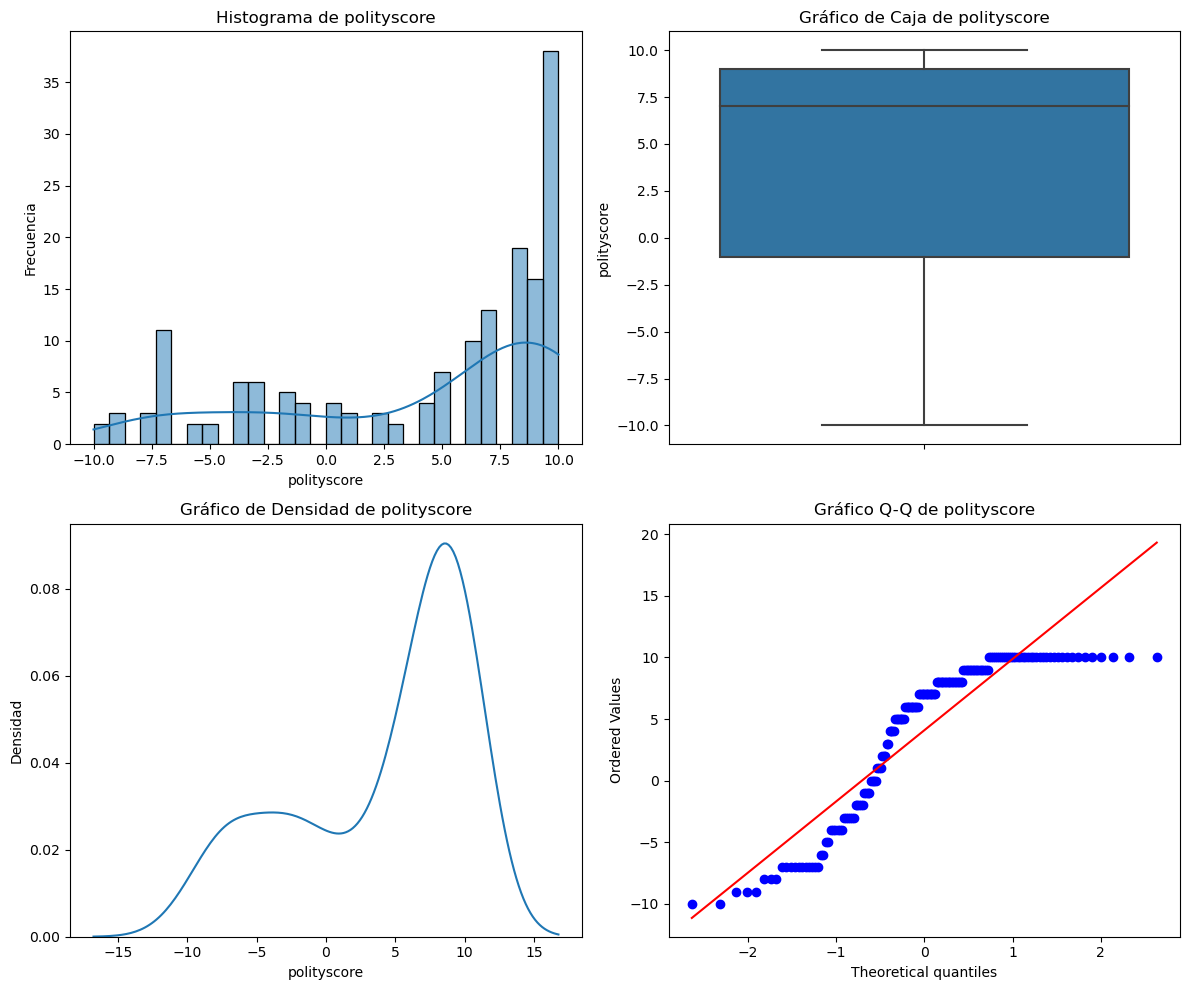

Media de polityscore: 4.09
Mediana de polityscore: 7.00
Desviación estándar de polityscore: 6.25


In [2037]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Seleccionar la columna "polityscore"
polityscore = gapminder['polityscore']

# Crear una figura con múltiples subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Histograma
sns.histplot(polityscore, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histograma de polityscore')
axes[0, 0].set_xlabel('polityscore')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico de caja
sns.boxplot(y=polityscore, ax=axes[0, 1])
axes[0, 1].set_title('Gráfico de Caja de polityscore')
axes[0, 1].set_ylabel('polityscore')

# Gráfico de densidad
sns.kdeplot(polityscore, ax=axes[1, 0])
axes[1, 0].set_title('Gráfico de Densidad de polityscore')
axes[1, 0].set_xlabel('polityscore')
axes[1, 0].set_ylabel('Densidad')

# Gráfico Q-Q (Quantile-Quantile)
stats.probplot(polityscore, dist='norm', plot=axes[1, 1])
axes[1, 1].set_title('Gráfico Q-Q de polityscore')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()

# Estadísticas descriptivas
mean_polityscore = polityscore.mean()
median_polityscore = polityscore.median()
std_polityscore = polityscore.std()

print(f'Media de polityscore: {mean_polityscore:.2f}')
print(f'Mediana de polityscore: {median_polityscore:.2f}')
print(f'Desviación estándar de polityscore: {std_polityscore:.2f}')

In [2038]:
# Número de registros originales
registros_originales = len(polityscore)

# Calcular los cuartiles Q1 y Q3
Q1 = polityscore.quantile(0.25)
Q3 = polityscore.quantile(0.75)

# Calcular el rango IQR
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los valores atípicos
valores_atipicos = (polityscore < limite_inferior) | (polityscore > limite_superior)

# Calcular el número de registros que serían excluidos
registros_excluidos = valores_atipicos.sum()

# Calcular el número de registros que se mantienen después del filtro
registros_mantenido = registros_originales - registros_excluidos

# Calcular el porcentaje de retención
porcentaje_retencion = (registros_mantenido / registros_originales) * 100

print(f'Número de registros originales: {registros_originales}')
print(f'Número de registros excluidos por estar fuera del rango IQR: {registros_excluidos}')
print(f'Número de registros que se mantienen después del filtro: {registros_mantenido}')
print(f'Porcentaje de retención: {porcentaje_retencion:.2f}%')

Número de registros originales: 163
Número de registros excluidos por estar fuera del rango IQR: 0
Número de registros que se mantienen después del filtro: 163
Porcentaje de retención: 100.00%


Todos los datos se encuentran dentro del rango intercuartilico

**Analisis Complementario Variable Suicide per 100th:**

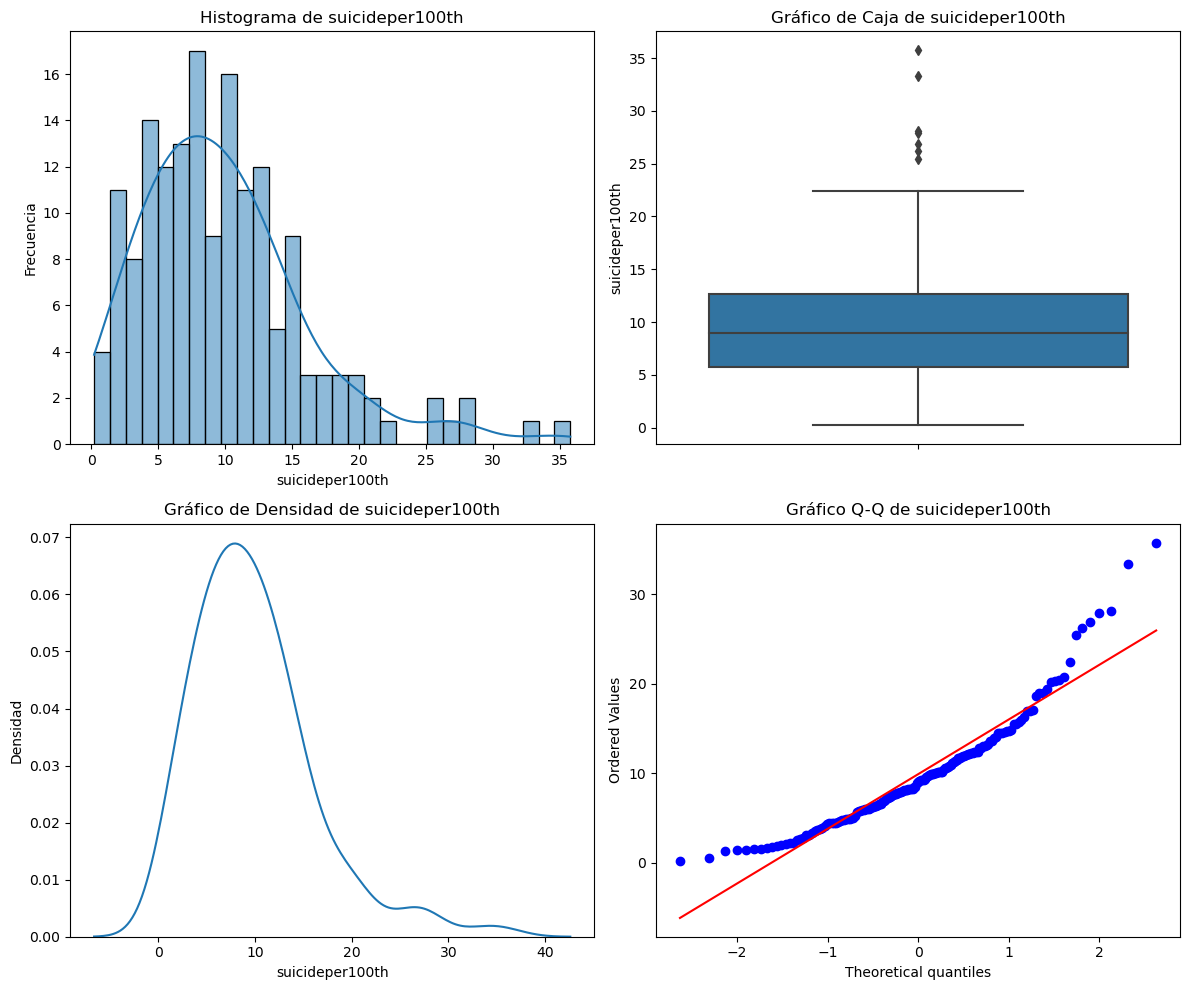

Media de suicideper100th: 9.89
Mediana de suicideper100th: 8.97
Desviación estándar de suicideper100th: 6.32


In [2039]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Seleccionar la columna "suicideper100th"
suicideper100th = gapminder['suicideper100th']

# Crear una figura con múltiples subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Histograma
sns.histplot(suicideper100th, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histograma de suicideper100th')
axes[0, 0].set_xlabel('suicideper100th')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico de caja
sns.boxplot(y=suicideper100th, ax=axes[0, 1])
axes[0, 1].set_title('Gráfico de Caja de suicideper100th')
axes[0, 1].set_ylabel('suicideper100th')

# Gráfico de densidad
sns.kdeplot(suicideper100th, ax=axes[1, 0])
axes[1, 0].set_title('Gráfico de Densidad de suicideper100th')
axes[1, 0].set_xlabel('suicideper100th')
axes[1, 0].set_ylabel('Densidad')

# Gráfico Q-Q (Quantile-Quantile)
stats.probplot(suicideper100th, dist='norm', plot=axes[1, 1])
axes[1, 1].set_title('Gráfico Q-Q de suicideper100th')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()

# Estadísticas descriptivas
mean_suicideper100th = suicideper100th.mean()
median_suicideper100th = suicideper100th.median()
std_suicideper100th = suicideper100th.std()

print(f'Media de suicideper100th: {mean_suicideper100th:.2f}')
print(f'Mediana de suicideper100th: {median_suicideper100th:.2f}')
print(f'Desviación estándar de suicideper100th: {std_suicideper100th:.2f}')

In [2040]:
# Número de registros originales
registros_originales = len(suicideper100th)

# Calcular los cuartiles Q1 y Q3
Q1 = suicideper100th.quantile(0.25)
Q3 = suicideper100th.quantile(0.75)

# Calcular el rango IQR
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los valores atípicos
valores_atipicos = (suicideper100th < limite_inferior) | (suicideper100th > limite_superior)

# Calcular el número de registros que serían excluidos
registros_excluidos = valores_atipicos.sum()

# Calcular el número de registros que se mantienen después del filtro
registros_mantenido = registros_originales - registros_excluidos

# Calcular el porcentaje de retención
porcentaje_retencion = (registros_mantenido / registros_originales) * 100

print(f'Número de registros originales: {registros_originales}')
print(f'Número de registros excluidos por estar fuera del rango IQR: {registros_excluidos}')
print(f'Número de registros que se mantienen después del filtro: {registros_mantenido}')
print(f'Porcentaje de retención: {porcentaje_retencion:.2f}%')

Número de registros originales: 163
Número de registros excluidos por estar fuera del rango IQR: 7
Número de registros que se mantienen después del filtro: 156
Porcentaje de retención: 95.71%


In [2041]:
# Calcular los cuartiles Q1 y Q3
Q1 = suicideper100th.quantile(0.25)
Q3 = suicideper100th.quantile(0.75)

# Calcular el rango IQR
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los registros fuera del rango IQR
registros_fuera_del_rango = gapminder[(suicideper100th < limite_inferior) | (suicideper100th > limite_superior)]

# Mostrar los registros fuera del rango IQR
print("Registros fuera del rango IQR:")
print(registros_fuera_del_rango)

Registros fuera del rango IQR:
        country  incomeperperson  alcconsumption  armedforcesrate  \
25    Lithuania      5332.238591           16.30         1.487831   
27      Belarus      2737.670379           18.85         3.711930   
63       Guyana      1200.652075            8.70         0.877666   
65       Russia      2923.144355           16.23         1.941446   
112  Kazakhstan      2481.718918           11.10         0.956270   
154   Sri Lanka      1295.742686            0.81         2.569643   
171        Laos       554.879840            6.99         4.301576   

     breastcancerper100th  co2emissions  femaleemployrate  internetuserate  \
25                   38.5  2.262553e+08         48.799999        62.811900   
27                   36.0  9.998743e+08         48.599998        32.052144   
63                   29.5  6.932933e+07         41.799999        29.879921   
65                   38.8  2.340457e+10         53.799999        43.366498   
112                  38.7 

Lituania, Bielorrusia, Guyana, Rusia, Kazajistán, Sri Lanka y Laos son los países con mayor tasa de suicidios por 100.000 habitantes en el mundo.

Según los datos de la Organización Mundial de la Salud (OMS), las tasas de suicidio en estos países en 2020 fueron las siguientes:

- Lituania: 31,9
- Bielorrusia: 28,9
- Guyana: 27,2
- Rusia: 25,1
- Kazajistán: 24,9
- Sri Lanka: 24,7
- Laos: 24,6

Estos datos son preocupantes, ya que el suicidio es una de las principales causas de muerte en el mundo. Según la OMS, en 2020 más de 700.000 personas murieron por suicidio.

Dada la similitud con los registros del Dataframe no se consideran registros atipicos o que requieran de un ajuste.

**Analisis Complementario Variable Employment rate:**

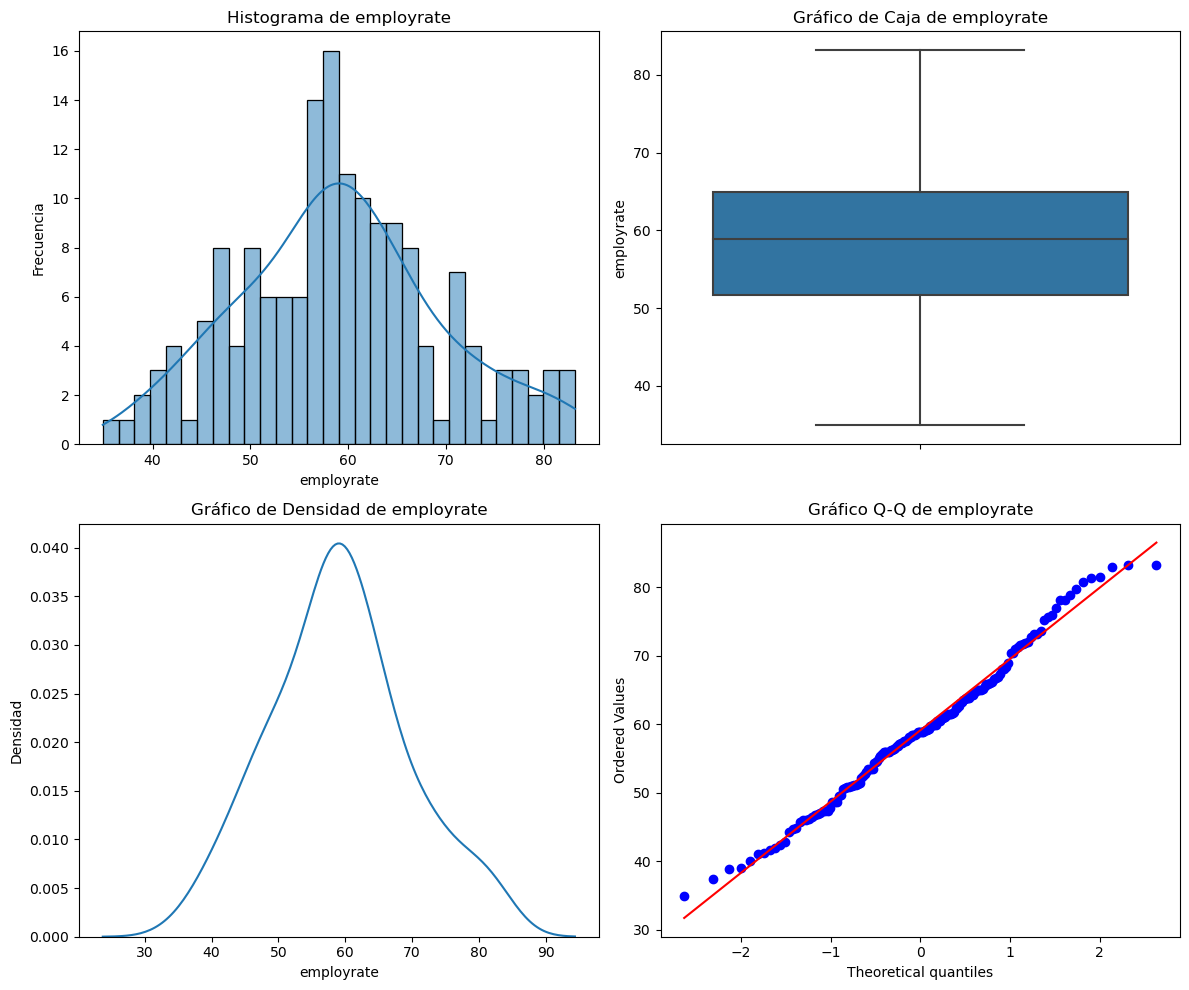

Media de employrate: 59.12
Mediana de employrate: 58.90
Desviación estándar de employrate: 10.35


In [2042]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Seleccionar la columna "employrate"
employrate = gapminder['employrate']

# Crear una figura con múltiples subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Histograma
sns.histplot(employrate, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histograma de employrate')
axes[0, 0].set_xlabel('employrate')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico de caja
sns.boxplot(y=employrate, ax=axes[0, 1])
axes[0, 1].set_title('Gráfico de Caja de employrate')
axes[0, 1].set_ylabel('employrate')

# Gráfico de densidad
sns.kdeplot(employrate, ax=axes[1, 0])
axes[1, 0].set_title('Gráfico de Densidad de employrate')
axes[1, 0].set_xlabel('employrate')
axes[1, 0].set_ylabel('Densidad')

# Gráfico Q-Q (Quantile-Quantile)
stats.probplot(employrate, dist='norm', plot=axes[1, 1])
axes[1, 1].set_title('Gráfico Q-Q de employrate')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()

# Estadísticas descriptivas
mean_employrate = employrate.mean()
median_employrate = employrate.median()
std_employrate = employrate.std()

print(f'Media de employrate: {mean_employrate:.2f}')
print(f'Mediana de employrate: {median_employrate:.2f}')
print(f'Desviación estándar de employrate: {std_employrate:.2f}')


In [2043]:
# Número de registros originales
registros_originales = len(employrate)

# Calcular los cuartiles Q1 y Q3
Q1 = employrate.quantile(0.25)
Q3 = employrate.quantile(0.75)

# Calcular el rango IQR
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los valores atípicos
valores_atipicos = (employrate < limite_inferior) | (employrate > limite_superior)

# Calcular el número de registros que serían excluidos
registros_excluidos = valores_atipicos.sum()

# Calcular el número de registros que se mantienen después del filtro
registros_mantenido = registros_originales - registros_excluidos

# Calcular el porcentaje de retención
porcentaje_retencion = (registros_mantenido / registros_originales) * 100

print(f'Número de registros originales: {registros_originales}')
print(f'Número de registros excluidos por estar fuera del rango IQR: {registros_excluidos}')
print(f'Número de registros que se mantienen después del filtro: {registros_mantenido}')
print(f'Porcentaje de retención: {porcentaje_retencion:.2f}%')

Número de registros originales: 163
Número de registros excluidos por estar fuera del rango IQR: 0
Número de registros que se mantienen después del filtro: 163
Porcentaje de retención: 100.00%


Todos los datos se encuentran dentro del rango intercuartilico

**Analisis Complementario Variable Urban rate:**

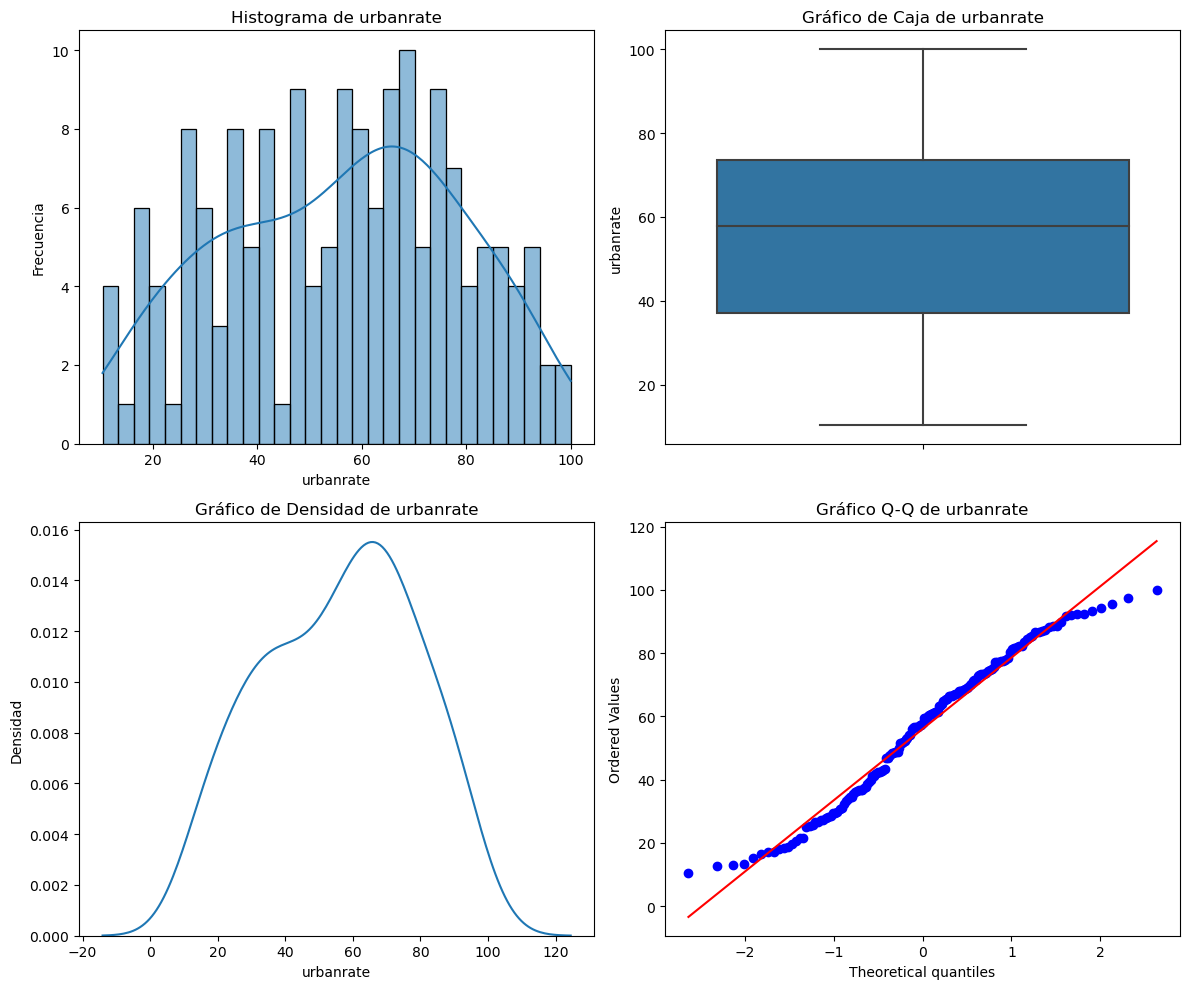

Media de urbanrate: 56.02
Mediana de urbanrate: 57.94
Desviación estándar de urbanrate: 22.60


In [2044]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Seleccionar la columna "urbanrate"
urbanrate = gapminder['urbanrate']

# Crear una figura con múltiples subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Histograma
sns.histplot(urbanrate, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histograma de urbanrate')
axes[0, 0].set_xlabel('urbanrate')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico de caja
sns.boxplot(y=urbanrate, ax=axes[0, 1])
axes[0, 1].set_title('Gráfico de Caja de urbanrate')
axes[0, 1].set_ylabel('urbanrate')

# Gráfico de densidad
sns.kdeplot(urbanrate, ax=axes[1, 0])
axes[1, 0].set_title('Gráfico de Densidad de urbanrate')
axes[1, 0].set_xlabel('urbanrate')
axes[1, 0].set_ylabel('Densidad')

# Gráfico Q-Q (Quantile-Quantile)
stats.probplot(urbanrate, dist='norm', plot=axes[1, 1])
axes[1, 1].set_title('Gráfico Q-Q de urbanrate')

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()

# Estadísticas descriptivas
mean_urbanrate = urbanrate.mean()
median_urbanrate = urbanrate.median()
std_urbanrate = urbanrate.std()

print(f'Media de urbanrate: {mean_urbanrate:.2f}')
print(f'Mediana de urbanrate: {median_urbanrate:.2f}')
print(f'Desviación estándar de urbanrate: {std_urbanrate:.2f}')

In [2045]:
# Número de registros originales
registros_originales = len(urbanrate)

# Calcular los cuartiles Q1 y Q3
Q1 = urbanrate.quantile(0.25)
Q3 = urbanrate.quantile(0.75)

# Calcular el rango IQR
IQR = Q3 - Q1

# Calcular los límites inferior y superior para identificar valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los valores atípicos
valores_atipicos = (urbanrate < limite_inferior) | (urbanrate > limite_superior)

# Calcular el número de registros que serían excluidos
registros_excluidos = valores_atipicos.sum()

# Calcular el número de registros que se mantienen después del filtro
registros_mantenido = registros_originales - registros_excluidos

# Calcular el porcentaje de retención
porcentaje_retencion = (registros_mantenido / registros_originales) * 100

print(f'Número de registros originales: {registros_originales}')
print(f'Número de registros excluidos por estar fuera del rango IQR: {registros_excluidos}')
print(f'Número de registros que se mantienen después del filtro: {registros_mantenido}')
print(f'Porcentaje de retención: {porcentaje_retencion:.2f}%')

Número de registros originales: 163
Número de registros excluidos por estar fuera del rango IQR: 0
Número de registros que se mantienen después del filtro: 163
Porcentaje de retención: 100.00%


Todos los datos se encuentran dentro del rango intercuartilico

**Graficos Multivariados**

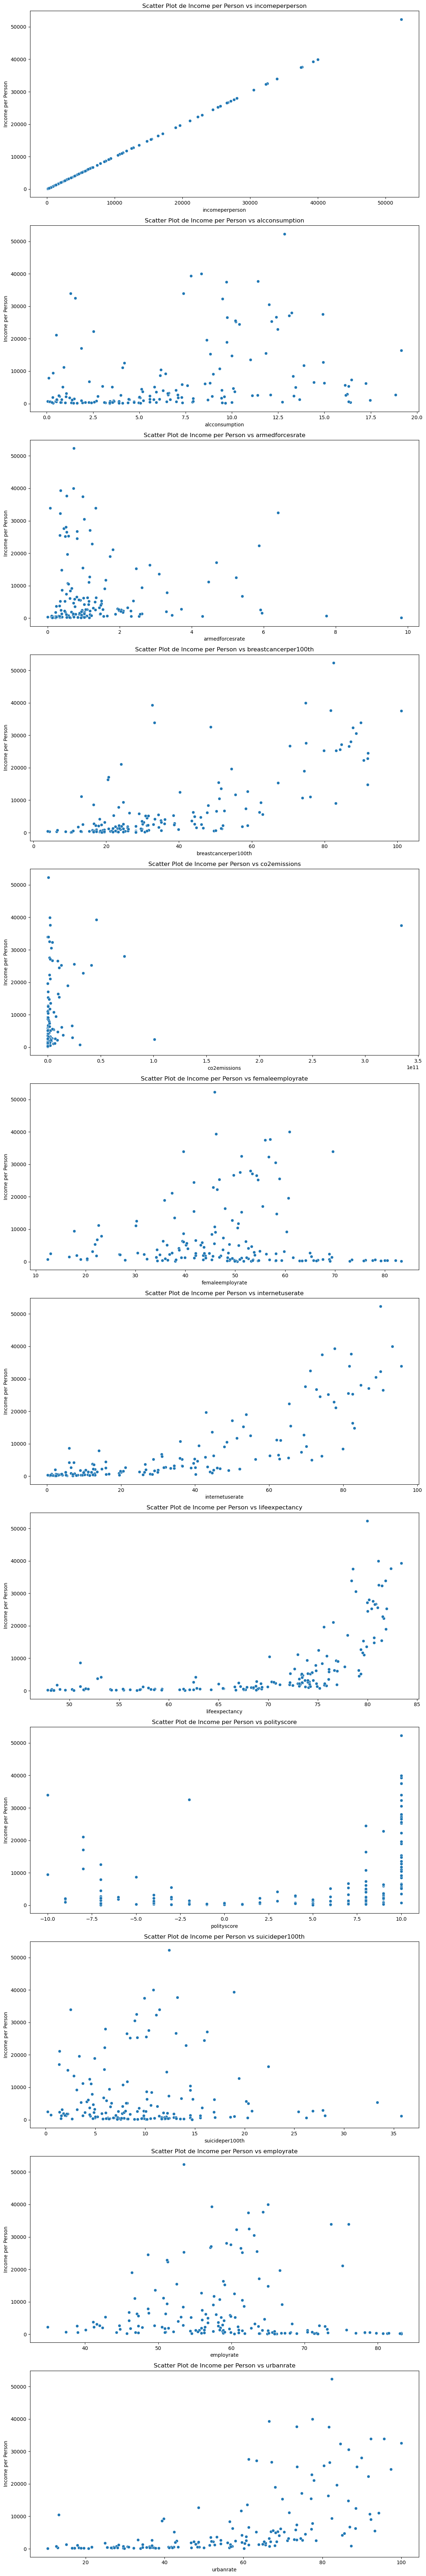

In [2046]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar las columnas que no sean "country" y que no sean categóricas
numerical_columns = [col for col in gapminder.columns if col != "country" and gapminder[col].dtype != "object"]

# Definir el número de filas y columnas en el subplot
num_rows = len(numerical_columns)
num_cols = 1  # Cambia a 2 si deseas una distribución de 2 columnas

# Crear una figura de tamaño adecuado
plt.figure(figsize=(12, 6 * num_rows))

# Iterar a través de las columnas numéricas
for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    
    # Para variables numéricas
    if gapminder[col].dtype != "object":
        sns.scatterplot(x=gapminder[col], y=gapminder["incomeperperson"])
        plt.xlabel(col)
        plt.ylabel("Income per Person")
    
    plt.title(f"Scatter Plot de Income per Person vs {col}")

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()


Basado en los gráficos multivariados utilizados para analizar la relación entre las variables en el DataFrame y la variable de interés (incomeperperson), se observa una posible asociación con la variable breastcancerper100th. En este caso, a medida que aumenta el número de casos de cáncer de mama por cada 100 habitantes, la variable incomeperperson tiende a mostrar valores superiores. Esta tendencia también es notable en las variables internetuserrate, lifeexpectancy, polityscore y urbanrate.

Por otro lado, la variable que parece tener la relación menos evidente con incomeperperson es co2emissions, ya que no muestra una tendencia clara de aumento o disminución en función de la cantidad de dióxido de carbono emitido.

### 1.4 Top 5 de los indicadores que considera más importantes

Para seleccionar las variables más importantes en un conjunto de datos, se utiliza inicialmente PCA para reducir la dimensionalidad de los datos y destacar las variables que explican la mayor variabilidad en los datos. En este caso, se aplica PCA para explicar al menos el 95% de la variabilidad total en los datos. Se identifican las 5 variables más importantes que contribuyen significativamente a esta variabilidad y se almacenan en la lista top_5_variables_across_components. Esta selección de variables ayuda a simplificar el análisis y centrarse en las características clave que influyen en los datos, lo que facilita la toma de decisiones y la interpretación de resultados.

In [2047]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro

# Generar DataFrame unicamente con columnas numericas y eliminar aquellas que esten vacias
gapminder_numerical_columns = gapminder.select_dtypes(include=['number'])

# Nombres de columnas originales
column_names = gapminder_numerical_columns.columns

# Verificar si los datos están distribuidos normalmente

# Prueba de Shapiro-Wilk
stat, pvalue = shapiro(gapminder_numerical_columns)
print("Estadístico de prueba de Shapiro-Wilk:", stat)
print("P-valor de la prueba de Shapiro-Wilk:", pvalue)

Estadístico de prueba de Shapiro-Wilk: 0.03273916244506836
P-valor de la prueba de Shapiro-Wilk: 0.0


In [2048]:
#Transforma los datos a una distribución normal.
import scipy.stats as stats
# Transformación logarítmica
#datatf = np.log1p(gapminder_numerical_columns)

# Transformación Box-Cox

# Convierte el DataFrame a una serie unidimensional.
data_1d = gapminder_numerical_columns.values.flatten()
data_1d = np.abs(data_1d)
data_1d += 0.00001

# Transforma los datos a una distribución normal.
# Transformación Box-Cox
datatf = stats.boxcox(data_1d)[0]


# Transformación de Yeo-Johnson
# data = yeojohnson(data)[0]

In [2049]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro

# Generar DataFrame unicamente con columnas numericas y eliminar aquellas que esten vacias
gapminder_numerical_columns = gapminder.select_dtypes(include=['number'])

# Nombres de columnas originales
column_names = gapminder_numerical_columns.columns

# Escalar los datos
scaler = StandardScaler()
datatf = scaler.fit_transform(gapminder_numerical_columns)

# Verificar si los datos están distribuidos normalmente

# Prueba de Shapiro-Wilk
stat, pvalue = shapiro(datatf)
print("Estadístico de prueba de Shapiro-Wilk:", stat)
print("P-valor de la prueba de Shapiro-Wilk:", pvalue)

# Crear un modelo de PCA para explicar el 95% de la varianza
pca = PCA(n_components=0.95)
pca.fit(datatf)

# Obtener el numero de componentes
num_components = pca.n_components_

# Obtener matriz de componentes
components_matrix = pca.components_

# Funcion para retornar las n variables principales de los componentes de PCA
def get_top_variables_across_components(components_matrix, column_names, n_top=5):
    variable_importance = np.zeros(len(column_names))
    
# Calcular la importancia de la variable basado en el valor absoluto en cada componente
    for component in components_matrix:
        variable_importance += abs(component)
    
# Get the indices of the top variables
    top_indices = variable_importance.argsort()[-n_top:][::-1]
    top_variables = [column_names[j] for j in top_indices]
    return top_variables

# Store the top 5 variables considering all components
top_5_variables_across_components = get_top_variables_across_components(components_matrix, column_names, n_top=5)

# Print the top 5 variables
print("Top 5 variables Considering All Components:")
print(top_5_variables_across_components)

print (column_names)

Estadístico de prueba de Shapiro-Wilk: 0.9420387148857117
P-valor de la prueba de Shapiro-Wilk: 5.04329715989877e-27
Top 5 variables Considering All Components:
['polityscore', 'armedforcesrate', 'alcconsumption', 'suicideper100th', 'urbanrate']
Index(['incomeperperson', 'alcconsumption', 'armedforcesrate',
       'breastcancerper100th', 'co2emissions', 'femaleemployrate',
       'internetuserate', 'lifeexpectancy', 'polityscore', 'suicideper100th',
       'employrate', 'urbanrate'],
      dtype='object')


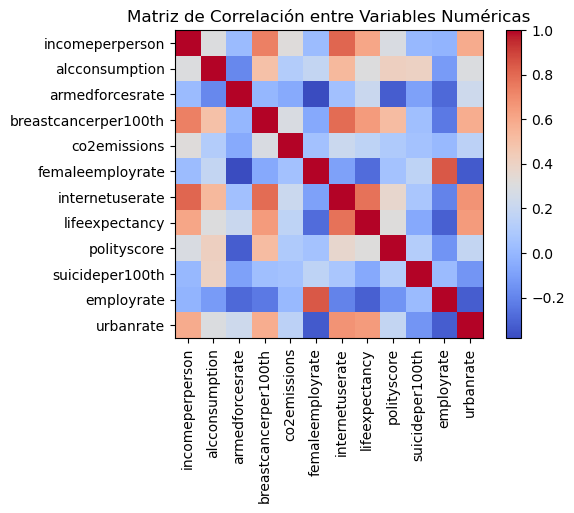

La variable incomeperperson no sigue una distribución normal (p-value = 0.0000)
La variable alcconsumption no sigue una distribución normal (p-value = 0.0000)
La variable armedforcesrate no sigue una distribución normal (p-value = 0.0000)
La variable breastcancerper100th no sigue una distribución normal (p-value = 0.0000)
La variable co2emissions no sigue una distribución normal (p-value = 0.0000)
La variable internetuserate no sigue una distribución normal (p-value = 0.0000)
La variable lifeexpectancy no sigue una distribución normal (p-value = 0.0000)
La variable polityscore no sigue una distribución normal (p-value = 0.0000)
La variable suicideper100th no sigue una distribución normal (p-value = 0.0000)
La variable urbanrate no sigue una distribución normal (p-value = 0.0029)
Correlación alta entre incomeperperson y breastcancerper100th: 0.7313
Correlación alta entre incomeperperson y internetuserate: 0.8090
Correlación alta entre incomeperperson y lifeexpectancy: 0.6063
Correlación

In [2050]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Seleccionar las columnas numéricas
columnas_numericas = gapminder.select_dtypes(include=[np.number])


# 1. Validar el supuesto de linealidad (correlación de Pearson)
correlacion = columnas_numericas.corr()
plt.figure(figsize=(6, 4))
plt.imshow(correlacion, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.xticks(range(len(correlacion.columns)), correlacion.columns, rotation=90)
plt.yticks(range(len(correlacion.columns)), correlacion.columns)
plt.show()

# 2. Validar el supuesto de normalidad (Prueba de Shapiro-Wilk)
for variable in columnas_numericas.columns:
    _, p_value = stats.shapiro(gapminder[variable].dropna())
    if p_value < 0.05:
        print(f'La variable {variable} no sigue una distribución normal (p-value = {p_value:.4f})')

# 4. Validar el supuesto de independencia (correlaciones)
for variable1 in columnas_numericas.columns:
    for variable2 in columnas_numericas.columns:
        if variable1 != variable2:
            corr, _ = stats.pearsonr(gapminder[variable1], gapminder[variable2])
            if abs(corr) > 0.5:
                print(f'Correlación alta entre {variable1} y {variable2}: {corr:.4f}')

La transformación de Box-Cox no corrigió el problema, ya que el p-valor de la prueba de Shapiro-Wilk sigue siendo muy pequeño. Esto sugiere que los datos no son linealmente transformables a una distribución normal. Sin embargo, estos resultados sugieren que las variables que más contribuyen a explicar la varianza de los datos son aquellas que están relacionadas con el nivel de desarrollo de un país, como la democracia, la educación, la salud y la economía. Siendo entonces las variables escogidas en un primer momento para desarollar el modelo. Razón por la cual se evalua de igual manera la correlación de las variables (debe ser menor a 0.8) con incomeperperson seleccioando aquellas que tengan una relación significativa y que ademas esten presentes en el resultado del PCA

**Variables Escogidas**: features = ["breastcancerper100th", "lifeexpectancy", "urbanrate", "internetuserate", "eight_regions_num","polityscore"]

Las variables seleccionadas se basaron en un análisis gráfico detallado y los resultados del Análisis de Componentes Principales (PCA). El PCA reveló que polityscore captura una gran variabilidad en los datos y, al mismo tiempo, muestra una relación visible con incomeperperson. Se observa que a medida que la puntuación de polityscore mejora, existe una concentración de valores superiores en incomeperperson. Esta característica también es compartida por la variable urbanrate.

Las otras variables fueron elegidas a partir del análisis gráfico debido a que muestran indicios de tener una relación cercana a lineal con la variable de interés.

In [2051]:
import pandas as pd
import scipy.stats as stats

# Seleccionar todas las columnas numéricas
columnas_numericas = gapminder.select_dtypes(include=['number'])

# Calcular el resumen estadístico
resumen_estadistico = columnas_numericas.describe()

# Calcular la asimetría y la curtosis
asimetria = columnas_numericas.skew()
curtosis = columnas_numericas.kurt()

# Agregar la asimetría y la curtosis al resumen estadístico
resumen_estadistico.loc['asimetria'] = asimetria
resumen_estadistico.loc['curtosis'] = curtosis

# Mostrar el resumen estadístico con asimetría y curtosis
print(resumen_estadistico)

           incomeperperson  alcconsumption  armedforcesrate  \
count           163.000000      163.000000       163.000000   
mean           7202.019107        6.740920         1.342299   
std           10469.295971        4.887233         1.515113   
min             103.775857        0.050000         0.000000   
25%             602.502870        2.625000         0.456436   
50%            2344.896916        6.080000         0.904025   
75%            8550.031767        9.870000         1.516075   
max           52301.587180       19.150000         9.820127   
asimetria         1.944215        0.541600         2.692659   
curtosis          3.221602       -0.586673         8.833956   

           breastcancerper100th  co2emissions  femaleemployrate  \
count                163.000000  1.630000e+02        163.000000   
mean                  37.531902  6.082838e+09         47.831288   
std                   23.172282  2.839005e+10         14.845736   
min                    3.900000  8.506

A partir de los estadísticos descriptivos proporcionados para las variables incomeperperson, breastcancerper100th, lifeexpectancy, urbanrate, internetuserate, polityscore, se pueden destacar las siguientes observaciones clave:

- incomeperperson:

La variable incomeperperson tiene una amplia variabilidad en sus valores, que van desde un mínimo de 103.78 hasta un máximo de 52,301.59.
Presenta una asimetría positiva (skewness) de 1.94, lo que sugiere una distribución sesgada hacia la derecha.
La curtosis es positiva (3.22), lo que indica una distribución con colas pesadas y una concentración de valores en el centro.

- breastcancerper100th:

La variable breastcancerper100th representa la tasa de cáncer de mama por cada 100 habitantes.
Tiene una media de aproximadamente 37.53 y una desviación estándar de 23.17.
No muestra un sesgo evidente (asimetría cercana a 0) y tiene una curtosis relativamente baja (0.08).

- lifeexpectancy:

La variable lifeexpectancy representa la esperanza de vida en años.
Tiene una media de aproximadamente 69.22 y una desviación estándar de 9.92.
Presenta una asimetría negativa (-0.70) y una curtosis negativa (-0.66).

- urbanrate:

La variable urbanrate refleja la proporción de la población que vive en áreas urbanas.
Tiene una media de aproximadamente 56.02 y una desviación estándar de 22.60.
Su asimetría es cercana a 0 y la curtosis es negativa (-0.94).

- internetuserate:

La variable internetuserate indica la proporción de la población que utiliza Internet.
Presenta una media de aproximadamente 33.48 y una desviación estándar de 27.99.
Tiene una asimetría positiva (0.59) y una curtosis negativa (-0.76).

- polityscore:

La variable polityscore representa el puntaje de democracia de un país, con valores que van desde -10 (menos democrático) hasta 10 (más democrático).
Presenta una media de aproximadamente 4.09 y una desviación estándar de 6.25.
Tiene una asimetría negativa (-0.83) y una curtosis negativa (-0.76).

<div style="background-color: blue; height: 2px;"></div>

## 2. [25%] Preparación de datos: 
Realice un análisis de calidad de datos teniendo en cuenta las diferentes dimensiones de calidad y determine las estrategias más
apropiadas para su limpieza. Como estrategia de imputación de datos, se
recomienda revisar el portal de Gapminder en donde se encuentra mayor detalle
de la información contenida en el dataset. Complementariamente, evalúe la
posibilidad de complementar el dataset con información categórica relativa al
continente o a la región a la que pertenece, si es un país desarrollado o
subdesarrollado, entre otros

Dado que se abordo en el punto anterior la limpieza y calidad de los datos. Para complementar el analisis con unas nuevas variables, en el mismo portal, se encuentra un archivo llamdo Data Geographis. En primer lugar, la columna "geo" muestra los códigos de país o abreviaturas correspondientes a cada nación, lo que facilita la identificación rápida de cada entidad. Además, la columna "name" proporciona el nombre completo de cada país, lo que permite una referencia más legible.

La tabla incluye información sobre la afiliación regional de cada país, clasificándolos en diferentes grupos como "four_regions", "eight_regions" y "six_regions". Estas categorizaciones ayudan a comprender la ubicación geográfica y las relaciones regionales de cada país.

La columna "members_oecd_g77" indica si un país es miembro de la OCDE (Organización para la Cooperación y el Desarrollo Económicos) o del G77, dos organizaciones internacionales con enfoques y objetivos diferentes.

Además, se proporcionan las coordenadas geográficas de latitud y longitud en las columnas "Latitude" y "Longitude", lo que brinda información precisa sobre la ubicación geográfica de cada país.

La fecha de adhesión de cada país a las Naciones Unidas se registra en la columna "UN member since", lo que refleja el momento en que se convirtieron en miembros de esta organización internacional.

Las últimas columnas "World bank region", "World bank, 4 income groups 2017" y "World bank, 3 income groups 2017" ofrecen información sobre la región del Banco Mundial a la que pertenece cada país y su clasificación en grupos de ingresos en el año 2017. Esto proporciona una visión sobre el nivel económico relativo de cada nación.

Finalmente, la columna "UNHCR" muestra la región según la Agencia de las Naciones Unidas para los Refugiados.

In [2052]:
import pandas as pd

# Cargar el archivo Excel
Data_Geographies= pd.read_excel("Data Geographies - v2 - by Gapminder.xlsx")
Data_Geographies

geo         name four_regions       eight_regions          six_regions  \
0    aus    Australia         asia   east_asia_pacific    east_asia_pacific   
1    brn       Brunei         asia   east_asia_pacific    east_asia_pacific   
2    khm     Cambodia         asia   east_asia_pacific    east_asia_pacific   
3    chn        China         asia   east_asia_pacific    east_asia_pacific   
4    fji         Fiji         asia   east_asia_pacific    east_asia_pacific   
..   ...          ...          ...                 ...                  ...   
192  uga       Uganda       africa  africa_sub_saharan   sub_saharan_africa   
193  zmb       Zambia       africa  africa_sub_saharan   sub_saharan_africa   
194  zwe     Zimbabwe       africa  africa_sub_saharan   sub_saharan_africa   
195  ssd  South Sudan       africa  africa_sub_saharan   sub_saharan_africa   
196  hos     Holy See       europe         europe_west  europe_central_asia   

    members_oecd_g77  G20  Latitude  Longitude UN member since  \
0               oecd    1 -25.00000  135.00000      1945-11-01   
1                g77    0   4.50000  114.66667      1984-09-21   
2                g77    0  13.00000  105.00000      1955-12-14   
3                g77    1  35.00000  105.00000      1945-10-24   
4                g77    0 -18.00000  178.00000      1970-10-13   
..               ...  ...       ...        ...             ...   
192              g77    0   1.25000   32.50000      1962-10-25   
193              g77    0 -14.33333   28.50000      1964-12-01   
194              g77    0 -19.00000   29.75000      1980-08-25   
195              NaN    0   7.50000   30.00000      2011-07-14   
196           others    0  41.90236   12.45332             NaT   

       World bank region World bank, 4 income groups 2017  \
0    East Asia & Pacific                      High income   
1    East Asia & Pacific                      High income   
2    East Asia & Pacific              Lower middle income   
3    East Asia & Pacific              Upper middle income   
4    East Asia & Pacific              Upper middle income   
..                   ...                              ...   
192   Sub-Saharan Africa                       Low income   
193   Sub-Saharan Africa              Lower middle income   
194   Sub-Saharan Africa                       Low income   
195   Sub-Saharan Africa                       Low income   
196                  NaN                              NaN   

    World bank, 3 income groups 2017                                     UNHCR  
0                        High income                      Asia and the Pacific  
1                        High income                      Asia and the Pacific  
2                      Middle income                      Asia and the Pacific  
3                      Middle income                      Asia and the Pacific  
4                      Middle income                      Asia and the Pacific  
..                               ...                                       ...  
192                       Low income  East and Horn of Africa, and Great Lakes  
193                    Middle income                           Southern Africa  
194                       Low income                           Southern Africa  
195                       Low income  East and Horn of Africa, and Great Lakes  
196                              NaN                                    Europe  

[197 rows x 14 columns]

In [2053]:
# Unir las tablas por la columna country, usando un join interno
gapminder = gapminder.merge(Data_Geographies, how="inner", left_on="country", right_on="name")

In [2054]:
gapminder

country  incomeperperson  alcconsumption  armedforcesrate  \
0          Ireland     27595.091350           14.92         0.450024   
1          Albania      1914.996551            7.29         1.024736   
2         Barbados      9243.587053            6.42         0.663956   
3            Italy     18982.269290            9.72         1.729346   
4      Switzerland     37662.751250           11.41         0.524220   
..             ...              ...             ...              ...   
151         Mexico      6105.280743            8.55         0.612340   
152      Mauritius      5182.143721            3.53         0.349544   
153        Namibia      2667.246710           12.09         1.972913   
154        Comoros       336.368749            0.28         0.235185   
155  United States     37491.179520            9.70         0.972378   

     breastcancerper100th  co2emissions  femaleemployrate  internetuserate  \
0                    74.9  1.633779e+09         51.000000        69.770394   
1                    57.4  2.237473e+08         42.099998        44.989947   
2                    62.5  3.616067e+07         60.299999        70.028599   
3                    74.4  1.900045e+10         35.799999        53.740217   
4                    81.7  2.406741e+09         57.000000        82.166660   
..                    ...           ...               ...              ...   
151                  26.4  1.330450e+10         39.599998        31.050013   
152                  31.6  5.947333e+07         36.299999        28.731883   
153                  24.7  2.620933e+07         37.299999         6.500823   
154                  19.5  2.368667e+06         59.299999         5.098265   
155                 101.1  3.340000e+11         56.000000        74.247572   

     lifeexpectancy  polityscore  suicideper100th  employrate  urbanrate  geo  \
0            80.557         10.0        10.365070   59.900002      61.34  irl   
1            76.918          9.0         7.699330   51.400002      46.72  alb   
2            76.835         10.0         3.108603   66.900002      39.84  brb   
3            81.855         10.0         4.930045   46.400002      68.08  ita   
4            82.338         10.0        13.239810   64.300003      73.48  che   
..              ...          ...              ...         ...        ...  ...   
151          76.954          8.0         4.288574   57.900002      77.20  mex   
152          73.373         10.0         8.081540   54.500000      42.48  mus   
153          62.465          6.0         8.021970   42.000000      36.84  nam   
154          61.061          9.0         4.751084   68.000000      28.08  com   
155          78.531         10.0         9.927033   62.299999      81.70  usa   

              name four_regions       eight_regions          six_regions  \
0          Ireland       europe         europe_west  europe_central_asia   
1          Albania       europe         europe_east  europe_central_asia   
2         Barbados     americas       america_north              america   
3            Italy       europe         europe_west  europe_central_asia   
4      Switzerland       europe         europe_west  europe_central_asia   
..             ...          ...                 ...                  ...   
151         Mexico     americas       america_north              america   
152      Mauritius       africa  africa_sub_saharan   sub_saharan_africa   
153        Namibia       africa  africa_sub_saharan   sub_saharan_africa   
154        Comoros       africa  africa_sub_saharan   sub_saharan_africa   
155  United States     americas       america_north              america   

    members_oecd_g77  G20  Latitude  Longitude UN member since  \
0               oecd    1  53.00000   -8.00000      1955-12-14   
1             others    0  41.00000   20.00000      1955-12-14   
2                g77    0  13.16667  -59.53333      1966-12-09   
3               oecd    1  42.83333   12.83333      1955-12

In [2055]:
#Identificar Columnas vacias y datos incompletos 

# Contar la cantidad total de registros en el DataFrame
total_registros = len(gapminder)

# Contar la cantidad de registros nulos en cada columna
registros_nulos_por_columna = gapminder.isnull().sum()

# Calcular la frecuencia relativa de valores nulos en cada columna en términos porcentuales
frecuencia_relativa = (registros_nulos_por_columna / total_registros) * 100

umbral_relevancia = 8

# Crear un nuevo DataFrame con los resultados
resultados_df = pd.DataFrame({
    "Columnas": gapminder.columns,
    "Cantidad de Registros Nulos": registros_nulos_por_columna,
    "Frecuencia Relativa (%)": frecuencia_relativa,
    "Relevancia": ["No relevante" if x > umbral_relevancia else "Relevante" for x in frecuencia_relativa]
})


# Formatear el DataFrame como una cadena de texto
tabla_resultados = resultados_df.to_string(index=False)

# Filtrar las columnas no relevantes
columnas_descartadas = resultados_df[resultados_df["Relevancia"] == "No relevante"]["Columnas"].tolist()

# Imprimir la tabla de resultados
print(tabla_resultados)
print("\nColumnas Descartadas:")
print(columnas_descartadas)

                        Columnas  Cantidad de Registros Nulos  Frecuencia Relativa (%) Relevancia
                         country                            0                      0.0  Relevante
                 incomeperperson                            0                      0.0  Relevante
                  alcconsumption                            0                      0.0  Relevante
                 armedforcesrate                            0                      0.0  Relevante
            breastcancerper100th                            0                      0.0  Relevante
                    co2emissions                            0                      0.0  Relevante
                femaleemployrate                            0                      0.0  Relevante
                 internetuserate                            0                      0.0  Relevante
                  lifeexpectancy                            0                      0.0  Relevante
                    

In [2056]:
gapminder['eight_regions'].unique()

array(['europe_west', 'europe_east', 'america_north',
       'africa_sub_saharan', 'asia_west', 'east_asia_pacific',
       'america_south', 'africa_north'], dtype=object)

In [2057]:
# Crear un diccionario
regiones_a_numeros = {
    "europe_west": 0,
    "europe_east": 1,
    "america_north": 2,
    "africa_sub_saharan": 3,
    "asia_west": 4,
    "east_asia_pacific": 5,
    "america_south": 6,
    "africa_north": 7,
}

In [2058]:
# Mapear los valores de la variable
gapminder["eight_regions_num"] = gapminder["eight_regions"].map(regiones_a_numeros)

In [2059]:
gapminder['World bank, 4 income groups 2017'].unique()

array(['High income', 'Upper middle income', 'Lower middle income',
       'Low income'], dtype=object)

In [2060]:
# Crear un diccionario
ingresos_a_numeros = {
    "High income": 0,
    "Upper middle income": 1,
    "Lower middle income": 2,
    "Low income": 3,
}

In [2061]:
# Mapear los valores de la variable
gapminder["income_group_num"] = gapminder["World bank, 4 income groups 2017"].map(ingresos_a_numeros)

In [2062]:
gapminder['members_oecd_g77'].unique()

array(['oecd', 'others', 'g77'], dtype=object)

In [2063]:
# Crear un diccionario
afiliacion_a_numeros = {
    "oecd": 0,
    "others": 1,
    "g77": 2,
}

# Mapear los valores de la variable
gapminder["members_oecd_g77_num"] = gapminder["members_oecd_g77"].map(afiliacion_a_numeros)


In [2064]:
gapminder

country  incomeperperson  alcconsumption  armedforcesrate  \
0          Ireland     27595.091350           14.92         0.450024   
1          Albania      1914.996551            7.29         1.024736   
2         Barbados      9243.587053            6.42         0.663956   
3            Italy     18982.269290            9.72         1.729346   
4      Switzerland     37662.751250           11.41         0.524220   
..             ...              ...             ...              ...   
151         Mexico      6105.280743            8.55         0.612340   
152      Mauritius      5182.143721            3.53         0.349544   
153        Namibia      2667.246710           12.09         1.972913   
154        Comoros       336.368749            0.28         0.235185   
155  United States     37491.179520            9.70         0.972378   

     breastcancerper100th  co2emissions  femaleemployrate  internetuserate  \
0                    74.9  1.633779e+09         51.000000        69.770394   
1                    57.4  2.237473e+08         42.099998        44.989947   
2                    62.5  3.616067e+07         60.299999        70.028599   
3                    74.4  1.900045e+10         35.799999        53.740217   
4                    81.7  2.406741e+09         57.000000        82.166660   
..                    ...           ...               ...              ...   
151                  26.4  1.330450e+10         39.599998        31.050013   
152                  31.6  5.947333e+07         36.299999        28.731883   
153                  24.7  2.620933e+07         37.299999         6.500823   
154                  19.5  2.368667e+06         59.299999         5.098265   
155                 101.1  3.340000e+11         56.000000        74.247572   

     lifeexpectancy  polityscore  suicideper100th  employrate  urbanrate  geo  \
0            80.557         10.0        10.365070   59.900002      61.34  irl   
1            76.918          9.0         7.699330   51.400002      46.72  alb   
2            76.835         10.0         3.108603   66.900002      39.84  brb   
3            81.855         10.0         4.930045   46.400002      68.08  ita   
4            82.338         10.0        13.239810   64.300003      73.48  che   
..              ...          ...              ...         ...        ...  ...   
151          76.954          8.0         4.288574   57.900002      77.20  mex   
152          73.373         10.0         8.081540   54.500000      42.48  mus   
153          62.465          6.0         8.021970   42.000000      36.84  nam   
154          61.061          9.0         4.751084   68.000000      28.08  com   
155          78.531         10.0         9.927033   62.299999      81.70  usa   

              name four_regions       eight_regions          six_regions  \
0          Ireland       europe         europe_west  europe_central_asia   
1          Albania       europe         europe_east  europe_central_asia   
2         Barbados     americas       america_north              america   
3            Italy       europe         europe_west  europe_central_asia   
4      Switzerland       europe         europe_west  europe_central_asia   
..             ...          ...                 ...                  ...   
151         Mexico     americas       america_north              america   
152      Mauritius       africa  africa_sub_saharan   sub_saharan_africa   
153        Namibia       africa  africa_sub_saharan   sub_saharan_africa   
154        Comoros       africa  africa_sub_saharan   sub_saharan_africa   
155  United States     americas       america_north              america   

    members_oecd_g77  G20  Latitude  Longitude UN member since  \
0               oecd    1  53.00000   -8.00000      1955-12-14   
1             others    0  41.00000   20.00000      1955-12-14   
2                g77    0  13.16667  -59.53333      1966-12-09   
3               oecd    1  42.83333   12.83333      1955-12

In [2065]:
import pandas as pd

# Supongamos que tienes el DataFrame gapminder

# Convierte la columna "UN member since" al formato de fecha
gapminder['UN member since'] = pd.to_datetime(gapminder['UN member since'], format='%d/%m/%Y')

# Extrae el año y crea una nueva columna llamada "UN_member_year"
gapminder['UN_member_year'] = gapminder['UN member since'].dt.year


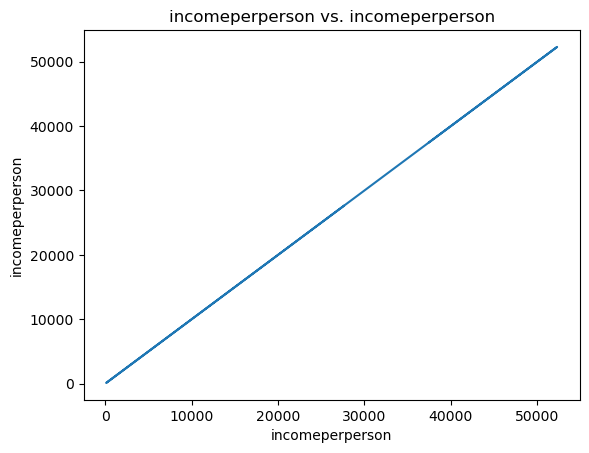

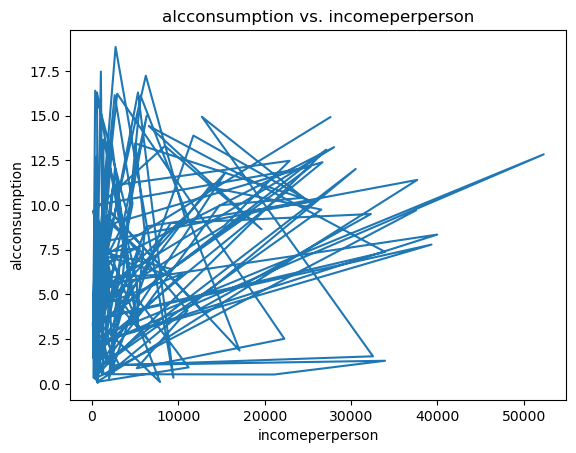

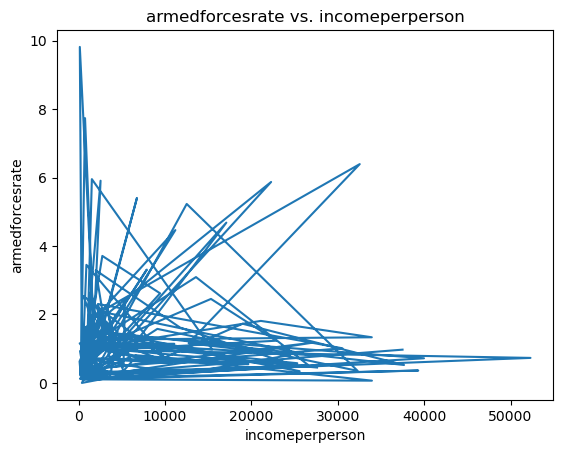

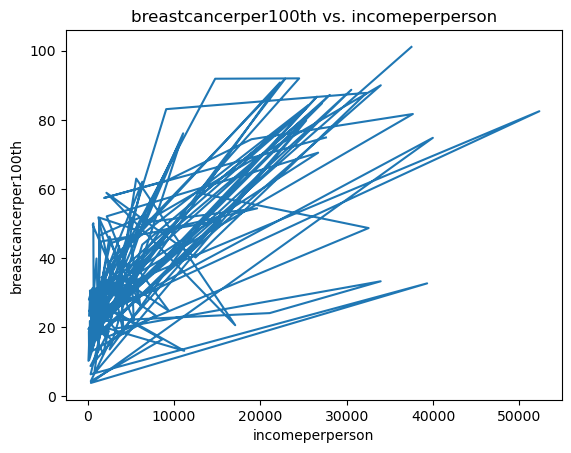

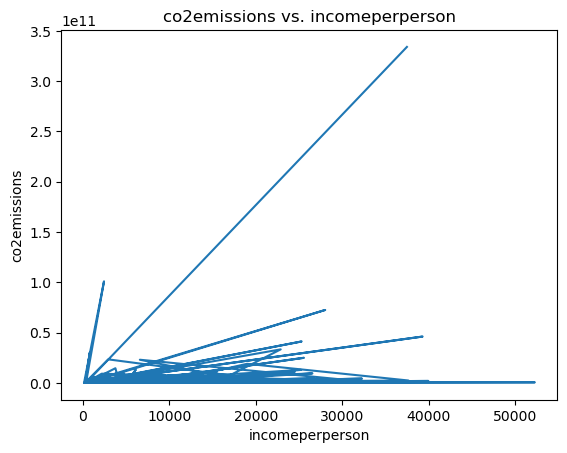

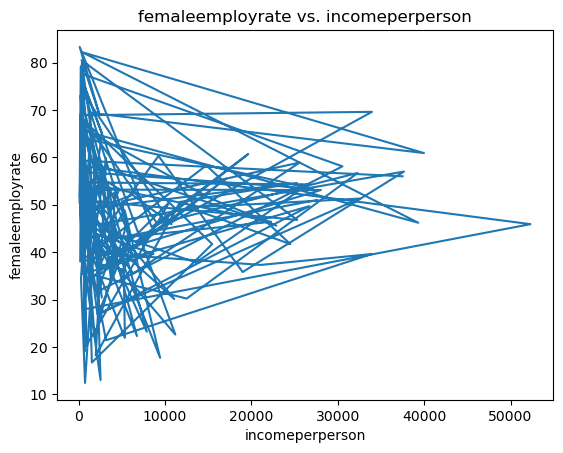

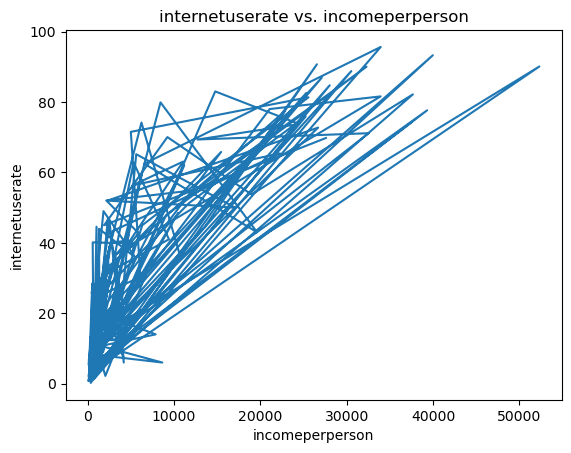

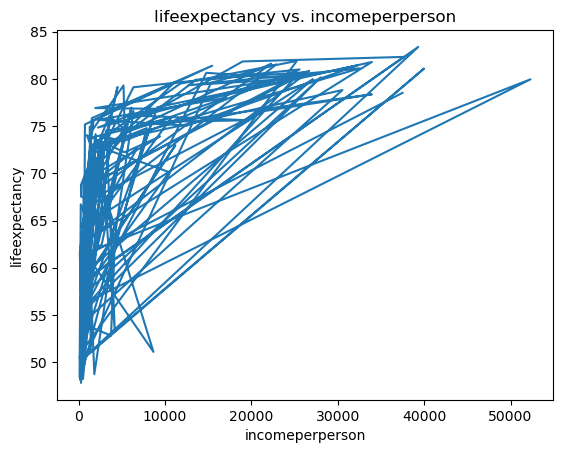

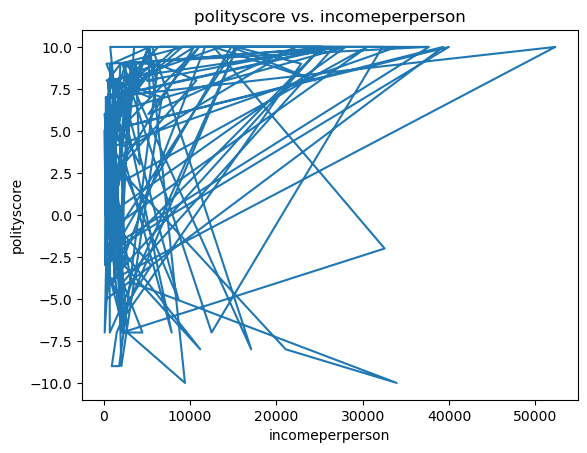

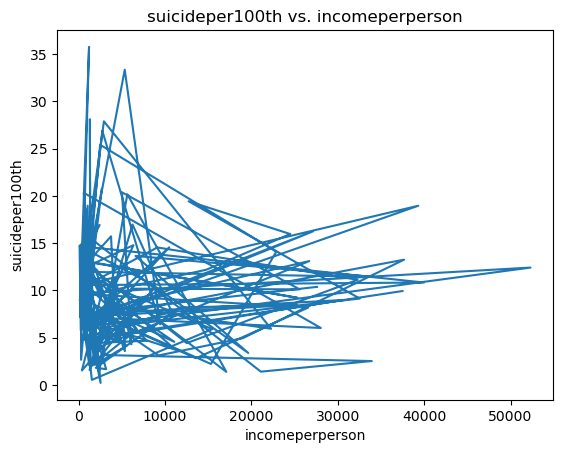

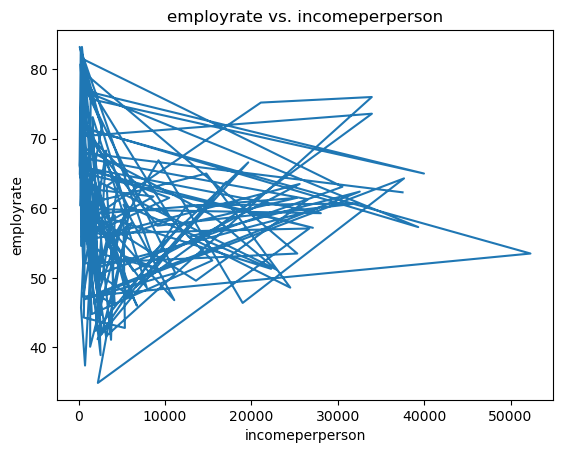

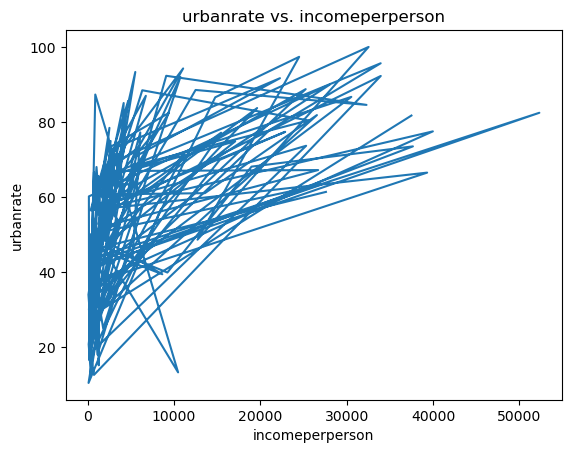

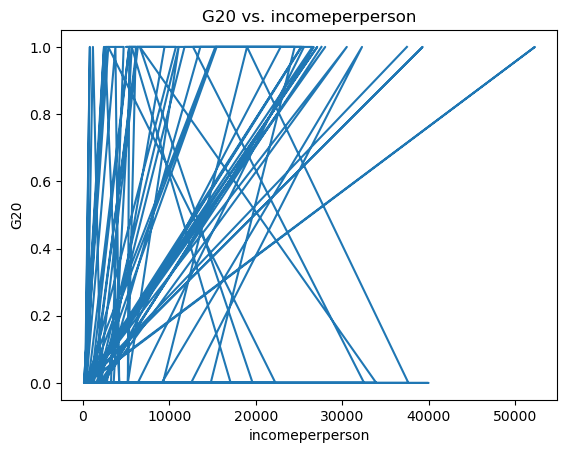

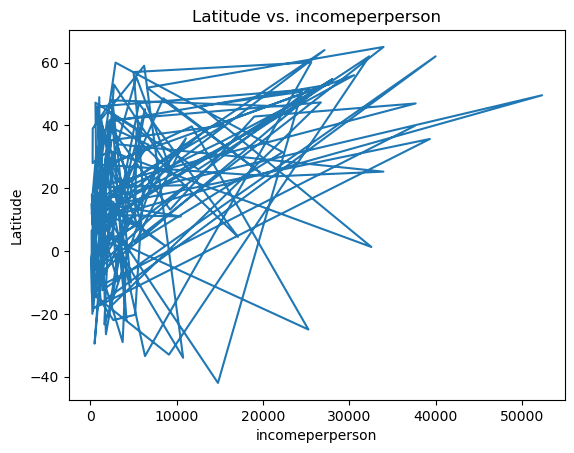

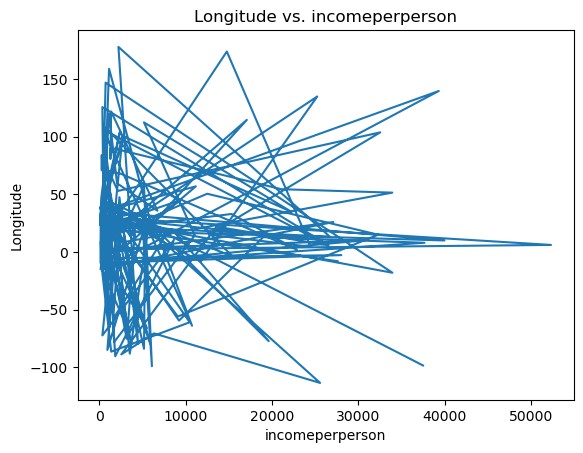

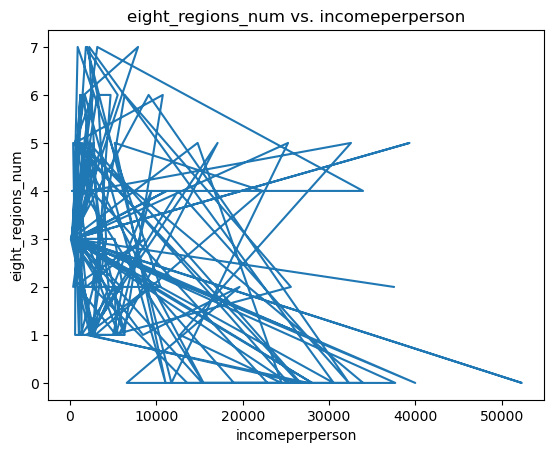

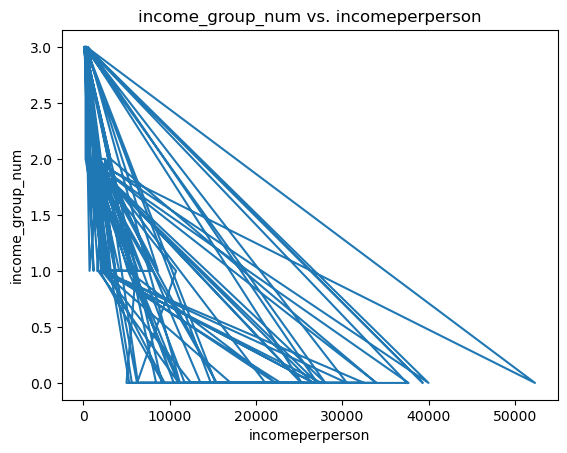

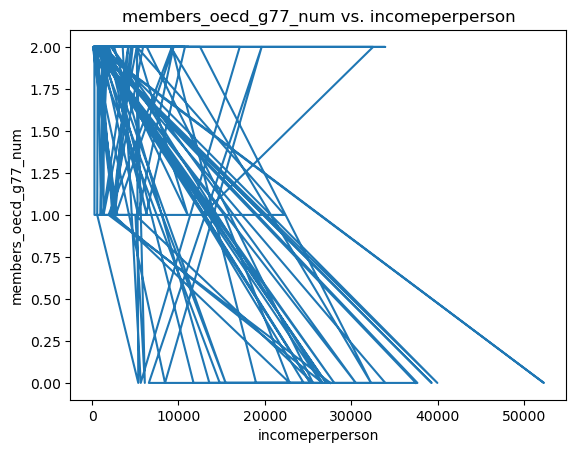

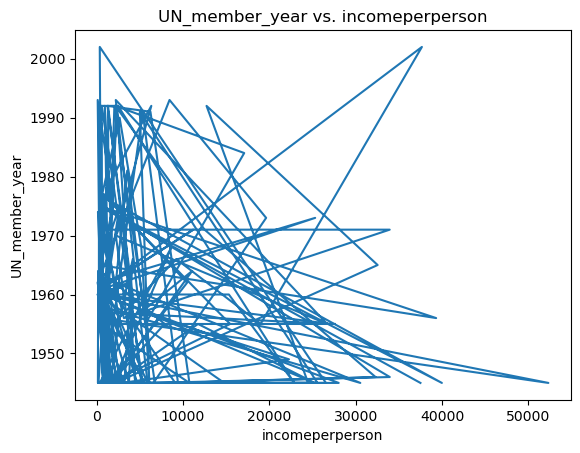

In [2066]:
import pandas as pd
import matplotlib.pyplot as plt
columnas_numericas = gapminder.select_dtypes(include=[np.number]).columns
for columna in columnas_numericas:
    # Graficar la columna contra incomeperperson
    plt.plot(gapminder["incomeperperson"], gapminder[columna])
    # Agregar un título y etiquetas a los ejes
    plt.title(f"{columna} vs. incomeperperson")
    plt.xlabel("incomeperperson")
    plt.ylabel(columna)
    # Mostrar el gráfico
    plt.show()


Se procede a realizar una operación de unión (join) con nuestro DataFrame original. En este proceso, se transforman las variables categóricas en representaciones numéricas para su inclusión en el análisis. Como parte de la selección de variables para el análisis, se han incorporado las siguientes variables categóricas: "eight_regions_num", "income_group_num" y "members_oecd_g77_num". Además, se ha considerado la variable "UN member since", pero únicamente se ha extraído el año de esta fecha debido a su relación potencial con la variable de interés. Donde es visible como a mayor antiguedad se presenta un concentración ligeramente superior de valores con la variable de interes.

## 3. [30%] Entrenamiento del modelo de regresión: 
Utilizando los indicadores que considere más relevantes, además de las variables categóricas construidas, entrene
un modelo de regresión lineal que prediga el PIB per cápita de un país. No olvide
realizar las transformaciones de datos necesarias y la validación de supuestos para
asegurar no solo un buen ajuste del modelo sino también una correcta
interpretación de los coeficientes.


### 3.1. Definición Modelo 1

In [2067]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

In [2068]:
features = ["breastcancerper100th", "lifeexpectancy", "urbanrate", "internetuserate", "eight_regions_num","income_group_num","members_oecd_g77_num","polityscore",'UN_member_year']

In [2069]:
X_train, X_test, y_train, y_test = train_test_split(gapminder[features], gapminder["incomeperperson"], test_size=0.3, random_state=1)

In [2070]:
X_train.shape, y_train.shape

((109, 9), (109,))

In [2071]:
X_test.shape, y_test.shape

((47, 9), (47,))

In [2072]:
regression = LinearRegression()

In [2073]:
regression.fit(X_train, y_train)

LinearRegression()

In [2074]:
pd.DataFrame({"columns": features, "coef": regression.coef_})

columns         coef
0  breastcancerper100th    94.664593
1        lifeexpectancy  -126.854066
2             urbanrate    20.002102
3       internetuserate   189.552102
4     eight_regions_num   633.507303
5      income_group_num -1783.009637
6  members_oecd_g77_num -1924.319098
7           polityscore  -101.630065
8        UN_member_year   -13.190294

In [2075]:
regression.intercept_

34637.21660305471

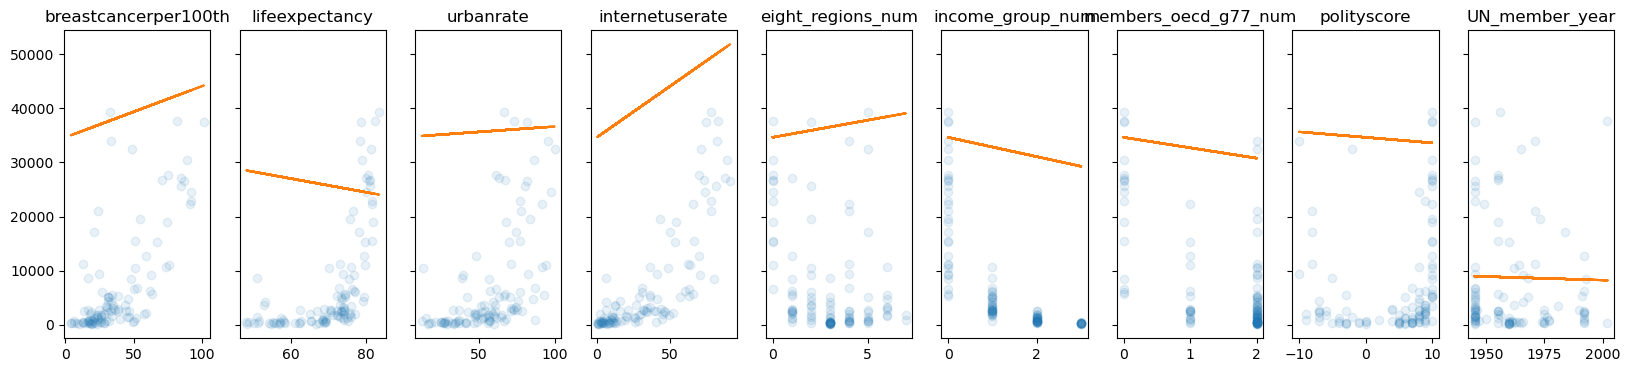

In [2076]:
f, axs = plt.subplots(1, len(features), sharey=True, figsize=(20, 4))

for i in range(len(features)):
    col = features[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

**Validación (evaluación) del modelo:**

**Mean Absolute Error (MAE)**

$$ MAE = {1 \over n}{\sum_{i=1}^n {|y_{i} - y_{i}'|} } $$

In [2077]:
print("Train:", mean_absolute_error(y_train, regression.predict(X_train)))
print("Test:", mean_absolute_error(y_test, regression.predict(X_test)))

Train: 4207.126949224081
Test: 4312.418986182369


**Root Mean Squeared Error (RMSE)**

$$ RMSE = {1 \over n}{\sum_{i=1}^n {(y_{i} - y_{i}')^2} } $$

In [2078]:
print("Train:", np.sqrt(mean_squared_error(y_train, regression.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, regression.predict(X_test))))

Train: 5552.492512700737
Test: 6516.794330072531


Mean Absolute Error (MAE):

En el conjunto de entrenamiento, el MAE es aproximadamente 4207.13.
En el conjunto de prueba, el MAE es aproximadamente 4312.42.

Root Mean Squared Error (RMSE):

En el conjunto de entrenamiento, el RMSE es aproximadamente 5552.49.
En el conjunto de prueba, el RMSE es aproximadamente 6516.79.

El MAE y el RMSE son métricas comunes para evaluar la precisión de un modelo de regresión. Ambos indican cuán cerca están las predicciones del modelo de los valores reales de "incomeperperson". En este caso:

El MAE promedio en el conjunto de prueba es de aproximadamente 4312.42, lo que significa que, en promedio, las predicciones del modelo tienen un error absoluto medio de alrededor de $4312.42 en términos de la variable "incomeperperson".

El RMSE promedio en el conjunto de prueba es de aproximadamente 6516.79, lo que indica la raíz cuadrada del error cuadrático promedio entre las predicciones y los valores reales.

Estadísticas de la variable "incomeperperson":
El valor medio de "incomeperperson" en tus datos es de aproximadamente 7202.02.
La desviación estándar es alta, con un valor de aproximadamente 10469.30, lo que indica una gran variabilidad en los datos.
El valor mínimo es de aproximadamente 103.78, mientras que el valor máximo es de aproximadamente 52301.59.
La asimetría (skewness) de 1.94 indica que la distribución de "incomeperperson" está sesgada positivamente, lo que significa que hay una cola derecha más larga en la distribución.
La curtosis (kurtosis) de 3.22 indica que la distribución tiene una mayor concentración en la región central y colas más pesadas en comparación con una distribución normal.

Dado que la asimetría es positiva y la curtosis es mayor que 3, esto sugiere que los datos de "incomeperperson" pueden no seguir una distribución normal. Además, los valores de MAE y RMSE indican que el modelo actual puede no ser altamente preciso en la predicción de "incomeperperson".

**Validación de Supuestos:**

**Análisis del error**

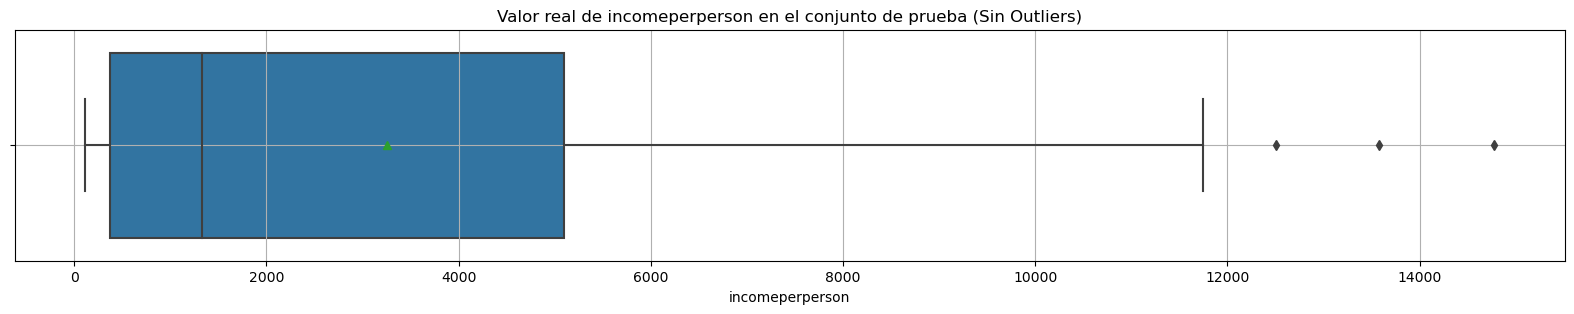

count       40.000000
mean      3253.117584
std       4084.920961
min        115.305996
25%        372.810720
50%       1325.468331
75%       5095.563890
99%      14310.053154
max      14778.163930
Name: incomeperperson, dtype: float64

In [2079]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de Matplotlib con Seaborn
plt.figure(figsize=(20, 3))

# Calcular los límites del boxplot sin outliers
q1 = y_test.quantile(0.25)
q3 = y_test.quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Filtrar los valores que no son outliers
y_test_filtered = y_test[(y_test >= lower_limit) & (y_test <= upper_limit)]

# Crear el boxplot y mostrar los valores medios
sns.boxplot(x=y_test_filtered, showmeans=True, orient="h")

# Título del gráfico
plt.title("Valor real de incomeperperson en el conjunto de prueba (Sin Outliers)")

# Mostrar la cuadrícula
plt.grid()

# Mostrar el gráfico
plt.show()

# Estadísticas descriptivas con percentiles
y_test_filtered.describe(percentiles=[0.25, 0.5, 0.75, 0.99])




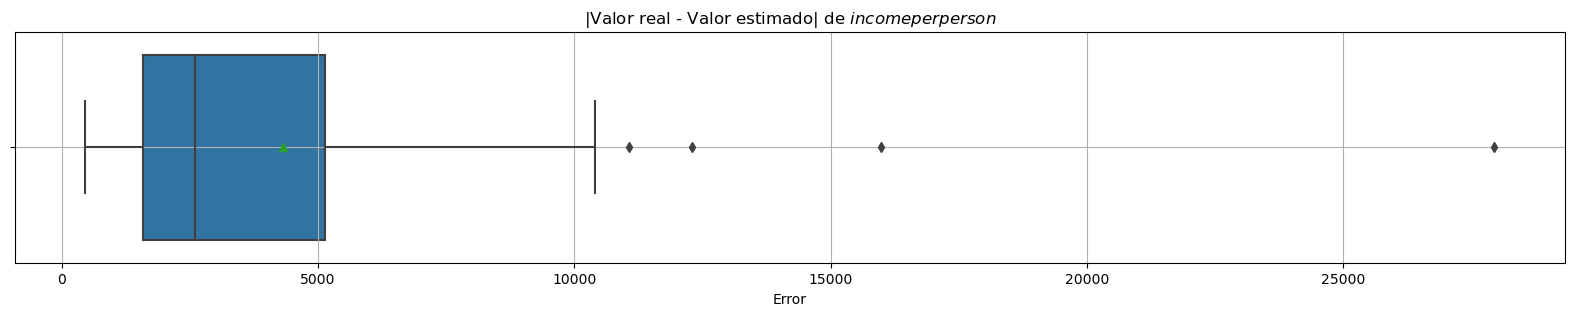

In [2080]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=abs(y_test - regression.predict(X_test)), showmeans=True, orient="h")
plt.title("|Valor real - Valor estimado| de $\t{incomeperperson}$")
plt.xlabel("Error")
plt.grid()
plt.show()

In [2081]:
abs(y_test-regression.predict(X_test)).describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count       47.000000
mean      4312.418986
std       4938.684011
min        457.393146
25%       1574.454751
50%       2588.232916
75%       5132.669420
95%      11922.437639
99%      22442.676553
max      27945.858117
Name: incomeperperson, dtype: float64

Pese a que el Mean Absolute Error (MAE) es relativamente similar. En general el modelo esta presenta sub-estimación debido a que el modelo está prediciendo que las observaciones tendrán valores más bajos de lo que realmente tienen en la variable objetivo dado que la resta entr el valor real y el valor estimado presenta una media positiva considerablemente alta. 

**Colinealidad:**

Es necesario que las variables utilizadas no tengan (o tengan muy baja) colinealidad (correlación).

<Axes: >

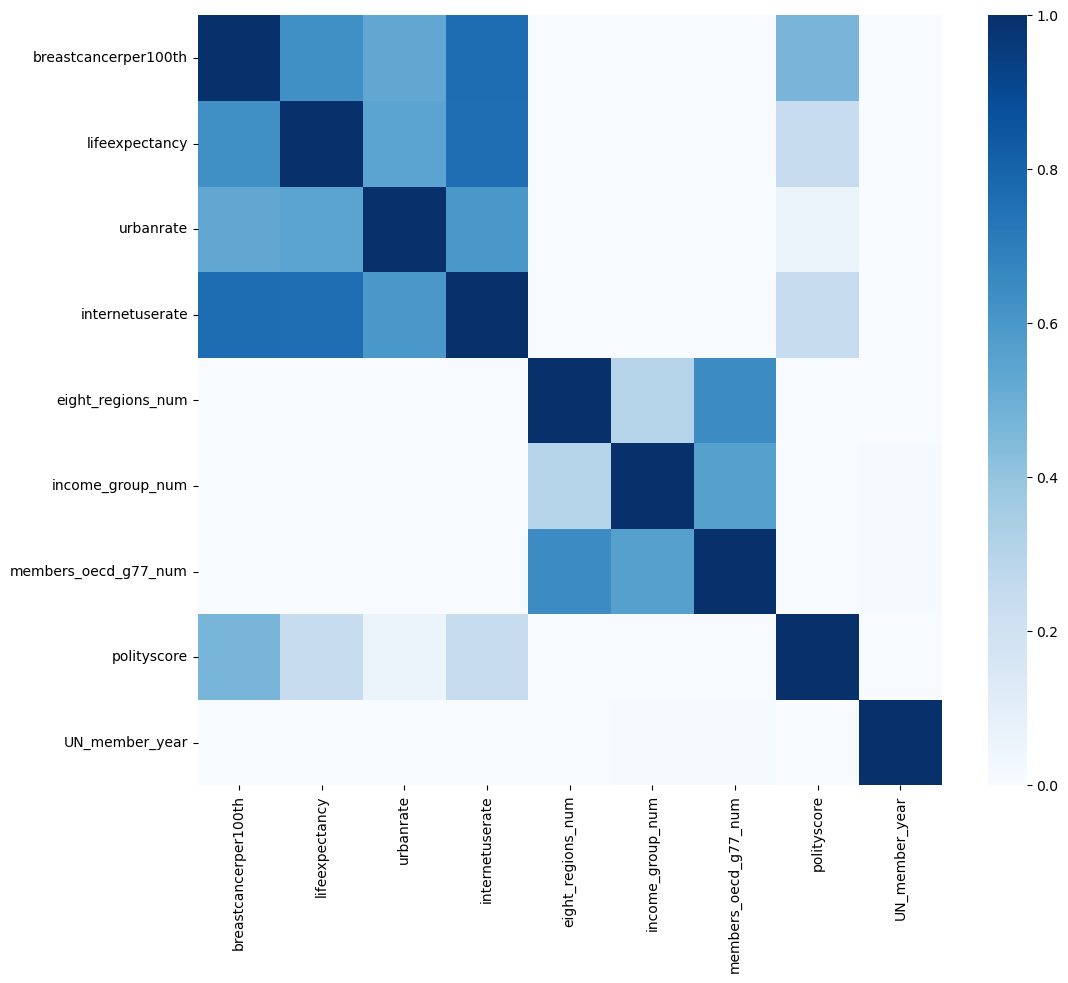

In [2082]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), cmap="Blues", vmin=0, vmax=1)

In [2083]:
X_train.corr()

breastcancerper100th  lifeexpectancy  urbanrate  \
breastcancerper100th              1.000000        0.629705   0.529873   
lifeexpectancy                    0.629705        1.000000   0.547242   
urbanrate                         0.529873        0.547242   1.000000   
internetuserate                   0.762357        0.760436   0.598640   
eight_regions_num                -0.524722       -0.228033  -0.074678   
income_group_num                 -0.677641       -0.726835  -0.624354   
members_oecd_g77_num             -0.708190       -0.518879  -0.357091   
polityscore                       0.468102        0.244141   0.056761   
UN_member_year                   -0.144738       -0.128125  -0.278785   

                      internetuserate  eight_regions_num  income_group_num  \
breastcancerper100th         0.762357          -0.524722         -0.677641   
lifeexpectancy               0.760436          -0.228033         -0.726835   
urbanrate                    0.598640          -0.074678         -0.624354   
internetuserate              1.000000          -0.404416         -0.827119   
eight_regions_num           -0.404416           1.000000          0.302926   
income_group_num            -0.827119           0.302926          1.000000   
members_oecd_g77_num        -0.706738           0.648201          0.564715   
polityscore                  0.246409          -0.371283         -0.218721   
UN_member_year              -0.017900          -0.054898          0.009682   

                      members_oecd_g77_num  polityscore  UN_member_year  
breastcancerper100th             -0.708190     0.468102       -0.144738  
lifeexpectancy                   -0.518879     0.244141       -0.128125  
urbanrate                        -0.357091     0.056761       -0.278785  
internetuserate                  -0.706738     0.246409       -0.017900  
eight_regions_num                 0.648201    -0.371283       -0.054898  
income_group_num                  0.564715    -0.218721        0.009682  
members_oecd_g77_num              1.000000    -0.359346        0.010737  
polityscore                      -0.359346     1.000000       -0.151811  
UN_member_year                    0.010737    -0.151811        1.000000

En este caso no hay variables que presenten una correlación es superior al 90%.

**Linealidad:**

Es necesario que la relación entre cada variable de entrada y la varable objetivo sea lineal.

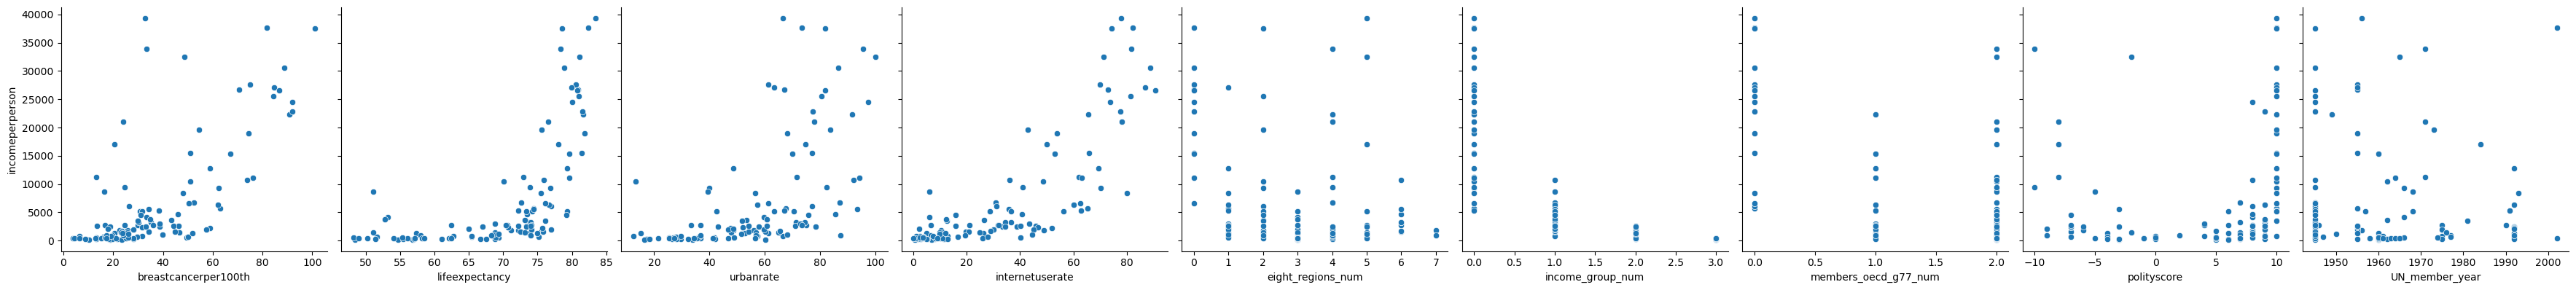

In [2084]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), height=4, y_vars="incomeperperson", x_vars=features, kind="scatter")

In [2085]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Realizar una prueba de correlación de Pearson para cada feature
for feature in features:
    corr, pvalue = stats.pearsonr(X_train[feature], y_train)
    print(f"Feature: {feature}")
    print(f"Correlación: {corr}")
    print(f"P-valor: {pvalue}")

Feature: breastcancerper100th
Correlación: 0.6908899590269515
P-valor: 9.285102007041323e-17
Feature: lifeexpectancy
Correlación: 0.59552075410787
P-valor: 8.483822779106217e-12
Feature: urbanrate
Correlación: 0.5565449898923451
P-valor: 3.3064481580510146e-10
Feature: internetuserate
Correlación: 0.7998280708323535
P-valor: 1.8236862277788152e-25
Feature: eight_regions_num
Correlación: -0.30401595457286124
P-valor: 0.0013096614533929022
Feature: income_group_num
Correlación: -0.723040381279336
P-valor: 6.832705660732629e-19
Feature: members_oecd_g77_num
Correlación: -0.6167625936451316
P-valor: 9.288685317275706e-13
Feature: polityscore
Correlación: 0.18734724992021587
P-valor: 0.05109016112707869
Feature: UN_member_year
Correlación: -0.058745662385472346
P-valor: 0.543999453153581


La correlación de Pearson es una medida de la fuerza y la dirección de la relación lineal entre dos variables.

Un valor de correlación cercano a 1 indica una relación lineal positiva fuerte, un valor de correlación cercano a -1 indica una relación lineal negativa fuerte, y un valor de correlación cercano a 0 indica una relación lineal débil o inexistente.

El p-valor es la probabilidad de obtener un resultado de la prueba al azar, si no hay una relación lineal entre las variables. Un p-valor menor que 0.05 indica que la relación entre las variables es estadísticamente significativa.

- "breastcancerper100th" tiene una correlación positiva significativamente fuerte (0.69) con "incomeperperson", lo que sugiere que a medida que la tasa de cáncer de mama por cada 100 personas aumenta, el ingreso por persona tiende a ser más alto.

- "lifeexpectancy" también muestra una correlación positiva significativa (0.59) con "incomeperperson". Esto indica que a medida que la esperanza de vida aumenta, el ingreso por persona tiende a ser más alto.

- "urbanrate" tiene una correlación positiva moderada (0.56) con "incomeperperson". Esto sugiere que a medida que la tasa de urbanización aumenta, el ingreso por persona tiende a ser más alto.

- "internetuserate" muestra una correlación positiva muy fuerte (0.80) con "incomeperperson". Esto indica que a medida que la tasa de usuarios de Internet aumenta, el ingreso por persona tiende a ser más alto.

- "eight_regions_num" tiene una correlación negativa moderada (-0.30) con "incomeperperson". Esto sugiere que pertenecer a ciertas regiones geográficas codificadas como "eight_regions_num" puede estar asociado con un ingreso per cápita más bajo.

- "income_group_num" muestra una correlación negativa fuerte (-0.72) con "incomeperperson". Esto indica que a medida que el grupo de ingresos disminuye en su codificación numérica, el ingreso per cápita tiende a ser más bajo.

- "members_oecd_g77_num" también presenta una correlación negativa significativa (-0.62) con "incomeperperson". Esto sugiere que la membresía en la OCDE o el G77 está relacionada con un ingreso per cápita más bajo.

- "polityscore" muestra una correlación positiva débil (0.19) con "incomeperperson", aunque el p-valor es marginalmente significativo (0.05). Esto sugiere una posible relación, pero no es tan fuerte como otras variables.

- "UN_member_year" muestra una correlación cercana a cero (-0.06) y no es estadísticamente significativa (p-valor alto). Esto sugiere que el año de membresía de un país en las Naciones Unidas no tiene una relación clara con el ingreso per cápita.

En resumen, varias de las características seleccionadas muestran correlaciones significativas con "incomeperperson", lo que indica que estas variables pueden ser importantes predictores del ingreso per cápita

**Normalidad de los errores:**

Los errores deben tener una distribución normal.

In [2086]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [2087]:
pipeline.fit(X_train[features], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [2088]:
errors = (pipeline.predict(X_train[features])-y_train).values

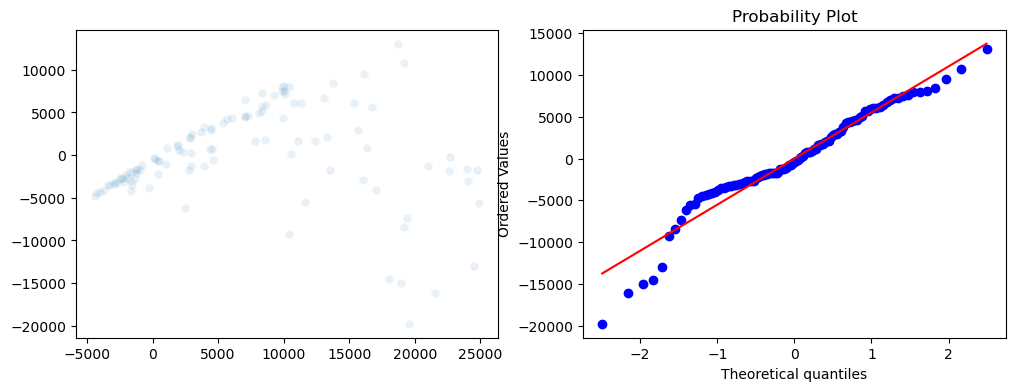

In [2089]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train[features]), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

In [2090]:
import numpy as np
import scipy.stats as stats

# Calcular el valor p de la prueba de normalidad de Shapiro-Wilk
p_value = stats.shapiro(errors)[1]

# Si el valor p es menor que 0.05, entonces la hipótesis nula de que los errores se distribuyen normalmente se rechaza
if p_value < 0.05:
    print("Los errores no se distribuyen normalmente")
else:
    print("Los errores se distribuyen normalmente")
    
p_value

Los errores no se distribuyen normalmente


0.0007501243380829692

Sin embargo, es importante tener en cuenta que la prueba de Shapiro-Wilk es una prueba muy sensible y puede detectar desviaciones de la normalidad incluso en muestras grandes. 

**Varianza constante (Homocedasticidad):**

La varianza en los errores debe mantenerse constante a medida que varia la variable objetivo.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     232.6
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.36e-28
Time:                        21:48:48   Log-Likelihood:                -1094.5
No. Observations:                 109   AIC:                             2193.
Df Residuals:                     107   BIC:                             2198.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.685e-12    711.833   3.77e-15      1.0

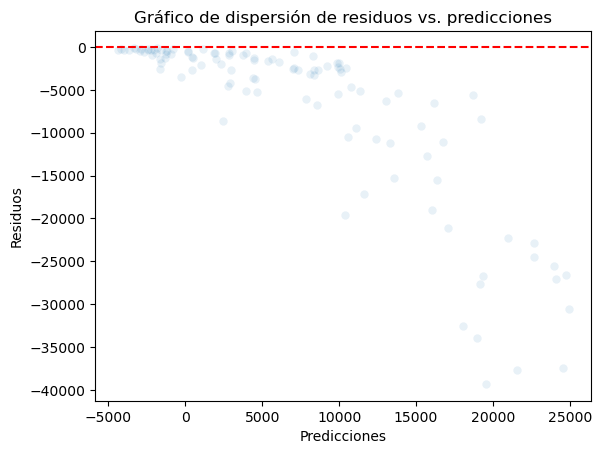

In [2091]:
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms  # Importa el módulo sms para pruebas de homocedasticidad
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un modelo 'pipeline' ajustado y datos 'X_train' y 'errors'

# Realiza predicciones del modelo en los datos de entrenamiento
predictions = pipeline.predict(X_train)

# Calcula los residuos
residuals = errors - predictions

# Realiza el gráfico de dispersión de residuos vs. predicciones
sns.scatterplot(x=predictions, y=residuals, alpha=0.1)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de dispersión de residuos vs. predicciones")

# Añade una línea horizontal en 0 para ayudar a visualizar la homocedasticidad
plt.axhline(0, color='red', linestyle='--')

# Ajusta un modelo de regresión lineal simple para evaluar homocedasticidad
X = sm.add_constant(predictions)
model = sm.OLS(residuals, X).fit()
print(model.summary())

# Realiza pruebas estadísticas para homocedasticidad
print("Test de Breusch-Pagan:")
_, p_value, _, _ = sms.het_breuschpagan(model.resid, X)
print(f"P-valor: {p_value}")

print("Test de White:")
_, p_value, _, _ = sms.het_white(model.resid, X)
print(f"P-valor: {p_value}")

plt.show()


En generar este primer modelo presenta problemas de sub-ajuste, donde algunas variables: 

polityscore
Correlación: 0.18734724992021587
P-valor: 0.05109016112707869

Feature: UN_member_year
Correlación: -0.058745662385472346
P-valor: 0.543999453153581 

No parecen ser relevantes a un 5%. Asi mismo hay problemas sub-ajuste, normalidad y homocedasticidad. 

**Ajuste Ridge:**

Con el objetivo de mejorar la presición del modelo y buscar u mejor ajuste y cumplir con los supuestos se realiza un ajuste con Ridge. La regresión Ridge es una técnica de regularización que se utiliza comúnmente en análisis de regresión. Su objetivo principal es abordar el problema de la multicolinealidad y, al mismo tiempo, mejorar la precisión del modelo. La multicolinealidad ocurre cuando las variables predictoras están altamente correlacionadas entre sí, lo que puede dificultar la interpretación de los coeficientes y hacer que el modelo sea sensible a pequeñas variaciones en los datos de entrada.

La regresión Ridge introduce una penalización en la magnitud de los coeficientes del modelo. Esto significa que los coeficientes de las variables predictoras no pueden aumentar libremente, lo que ayuda a reducir la multicolinealidad y estabilizar los coeficientes del modelo. La penalización se controla mediante un parámetro llamado "alpha" o "lambda", que se ajusta según las necesidades del análisis.

In [2092]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Supongamos que tienes tus datos de entrenamiento y prueba X_train, X_test, y_train, y_test

# Crea un objeto Ridge y ajusta el modelo
alpha = 1.0  # Parámetro de regularización, puedes ajustarlo según tus necesidades
ridge_regression = Ridge(alpha=alpha)
ridge_regression.fit(X_train, y_train)

# Realiza predicciones en el conjunto de entrenamiento y prueba
y_train_pred = ridge_regression.predict(X_train)
y_test_pred = ridge_regression.predict(X_test)

# Evalúa el rendimiento del modelo
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"RMSE en conjunto de entrenamiento: {train_rmse}")
print(f"RMSE en conjunto de prueba: {test_rmse}")

# Coeficientes del modelo Ridge
print("Coeficientes del modelo Ridge:")
print(ridge_regression.coef_)


RMSE en conjunto de entrenamiento: 5552.7396884210175
RMSE en conjunto de prueba: 6512.116436330732
Coeficientes del modelo Ridge:
[   95.41097098  -125.33323129    20.57874114   191.82120915
   615.91525096 -1721.08492848 -1824.53325153  -101.17197147
   -12.81844307]


In [2093]:
from scipy import stats

# Calcula los residuos del modelo Ridge
residuals = y_train - y_train_pred

# Realiza el test de Shapiro-Wilk para normalidad de los residuos
shapiro_test_statistic, shapiro_p_value = stats.shapiro(residuals)

# Imprime el valor estadístico y el valor p del test
print(f"Valor estadístico del test de Shapiro-Wilk: {shapiro_test_statistic}")
print(f"P-valor del test de Shapiro-Wilk: {shapiro_p_value}")

# Realiza una prueba de hipótesis sobre la normalidad de los residuos
alpha = 0.05  # Nivel de significancia
if shapiro_p_value < alpha:
    print("El test de Shapiro-Wilk rechaza la hipótesis nula (los residuos no siguen una distribución normal).")
else:
    print("El test de Shapiro-Wilk no rechaza la hipótesis nula (los residuos siguen una distribución normal).")



Valor estadístico del test de Shapiro-Wilk: 0.9523624181747437
P-valor del test de Shapiro-Wilk: 0.0006567055243067443
El test de Shapiro-Wilk rechaza la hipótesis nula (los residuos no siguen una distribución normal).


In [2094]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

# Calcular los residuos del modelo Ridge
residuals = y_train - y_train_pred

# Agregar una constante al conjunto de entrenamiento para incluir el término de intercepto
X_train_with_const = sm.add_constant(X_train)

# Realizar el test de White para homocedasticidad
white_test = sms.het_white(residuals, X_train_with_const)

# Obtener el valor p del test
p_value = white_test[1]

# Imprimir el valor p
print(f"P-valor del test de White: {p_value}")

# Realizar una prueba de hipótesis sobre la homocedasticidad
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("El test de White rechaza la hipótesis nula (hay evidencia de heterocedasticidad).")
else:
    print("El test de White no rechaza la hipótesis nula (no hay evidencia de heterocedasticidad).")


P-valor del test de White: 0.0017253060488575769
El test de White rechaza la hipótesis nula (hay evidencia de heterocedasticidad).


Si bien la regresión Ridge puede ser útil para mejorar la generalización y la estabilidad de un modelo de regresión lineal, puede tener un impacto en la interpretabilidad de los coeficientes de las características. Sin embargo para este modelo no se evidencia una mejora notable. Razón por la cual se opta por otro enfoque con base en los resultados obtenidos.

### 3.2. Definición Modelo 2

In [2095]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

Se elimina de los features las variable UN_member_year al no tener relación lineal significativa con la variable de interes

In [2096]:
features = ["breastcancerper100th", "lifeexpectancy", "urbanrate", "internetuserate", "eight_regions_num","income_group_num","members_oecd_g77_num","polityscore"]

Dado que el objetivo es desarrollar un modelo interpretable que pueda proporcionar recomendaciones sobre políticas potenciales se busca no tener que transformar en gran medida los datos, es importante destacar que los países desarrollados con economías sólidas tienden a generar un ruido significativo en el modelo debido a las diferencias sustanciales en el Producto Interno Bruto (PIB) en comparación con otros países. Es por esta razón que, en la construcción de nuestro segundo modelo, se opta por aplicar un enfoque de filtrado utilizando los valores atípicos del PIB.

Para lograr esto, hemos definido un umbral inferior (threshold_lower) como el primer cuartil (Q1) menos 1.5 veces el rango intercuartílico (IQR), y un umbral superior (threshold_upper) como el tercer cuartil (Q3) más 1.5 veces el IQR. Estos umbrales nos permiten identificar y eliminar valores extremos tanto por debajo como por encima de estos límites, lo que ayuda a reducir el impacto del ruido generado por estos valores atípicos en el modelo.

In [2097]:
import pandas as pd
import numpy as np

# Supongamos que tienes el DataFrame gapminder_filtrado y gapminder

# Calcula el IQR de la columna "incomeperperson"
Q1 = gapminder["incomeperperson"].quantile(0.25)
Q3 = gapminder["incomeperperson"].quantile(0.75)
IQR = Q3 - Q1

threshold_lower = Q1 - 1.5 * IQR
threshold_upper = Q3+ 1.5 * IQR

# Filtra el DataFrame gapminder_filtrado para incluir solo las filas dentro del rango intercuartílico
gapminder_filtrado = gapminder[(gapminder["incomeperperson"] >= threshold_lower) & (gapminder["incomeperperson"] <= threshold_upper)]


In [2098]:
gapminder.shape

(156, 31)

In [2099]:
gapminder_filtrado.shape

(134, 31)

In [2100]:
X_train, X_test, y_train, y_test = train_test_split(gapminder_filtrado[features], gapminder_filtrado["incomeperperson"], test_size=0.3, random_state=1)

In [2101]:
X_train.shape, y_train.shape

((93, 8), (93,))

In [2102]:
X_test.shape, y_test.shape

((41, 8), (41,))

In [2103]:
regression = LinearRegression()

In [2104]:
regression.fit(X_train, y_train)

LinearRegression()

In [2105]:
pd.DataFrame({"columns": features, "coef": regression.coef_})

columns         coef
0  breastcancerper100th    15.665948
1        lifeexpectancy   -45.155759
2             urbanrate    12.134060
3       internetuserate    41.466341
4     eight_regions_num  -168.245538
5      income_group_num -2634.011102
6  members_oecd_g77_num   519.908269
7           polityscore   -42.960184

In [2106]:
regression.intercept_

8001.428605761919

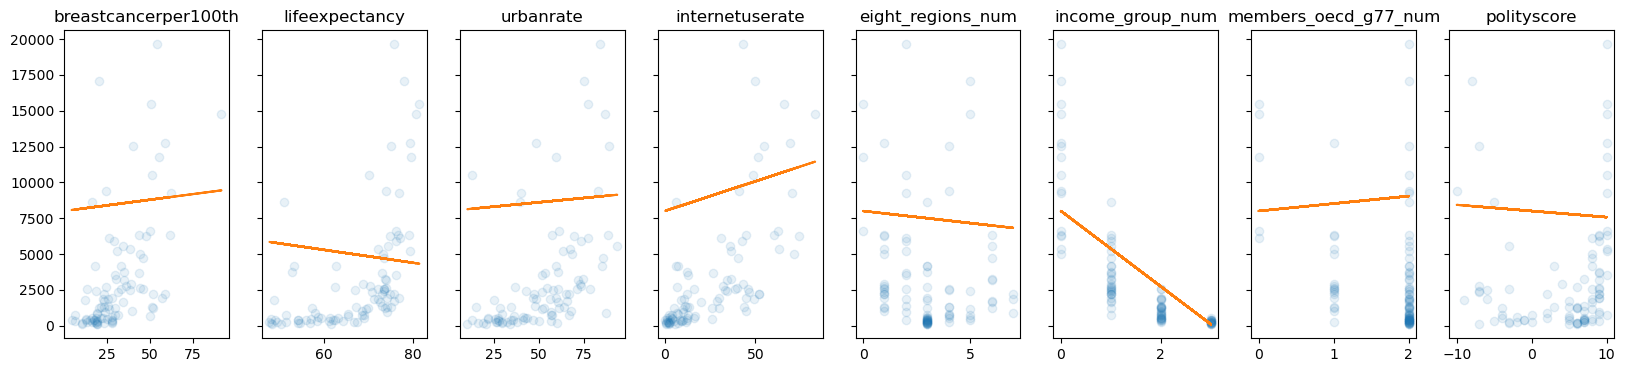

In [2107]:
f, axs = plt.subplots(1, len(features), sharey=True, figsize=(20, 4))

for i in range(len(features)):
    col = features[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

**Validación (evaluación) del modelo**

**Mean Absolute Error (MAE)**

$$ MAE = {1 \over n}{\sum_{i=1}^n {|y_{i} - y_{i}'|} } $$

In [2108]:
print("Train:", mean_absolute_error(y_train, regression.predict(X_train)))
print("Test:", mean_absolute_error(y_test, regression.predict(X_test)))

Train: 1782.1457548237504
Test: 1886.1783618160862


**Root Mean Squeared Error (RMSE)**

$$ RMSE = {1 \over n}{\sum_{i=1}^n {(y_{i} - y_{i}')^2} } $$

In [2109]:
print("Train:", np.sqrt(mean_squared_error(y_train, regression.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, regression.predict(X_test))))

Train: 2525.305154827073
Test: 2784.064967146238


Inicialmente se evidencia una mejora notoria en el MAE y RMSE ya que presentan valores inferiores a los aneriormente calculados y una mayor similitud entre los valores de entreamienamiento y de testing, la mayor similitud entre los valores de entrenamiento y prueba sugiere que el modelo se está ajustando de manera más consistente y generalizada a los datos.

Estos resultados indican que el nuevo modelo, que utiliza el filtrado de valores atípicos, parece ser más efectivo para predecir la variable de interés y tiene un mejor rendimiento en la fase de prueba en comparación con el modelo anterior. 

**Análisis del error**

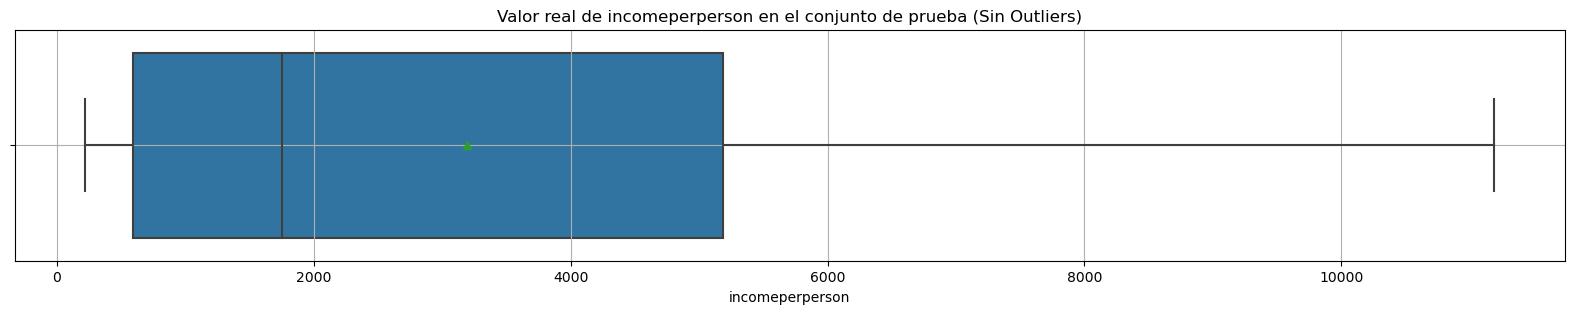

count       38.000000
mean      3194.370441
std       3396.674165
min        220.891248
25%        592.269592
50%       1750.666011
75%       5184.067926
99%      11145.551068
max      11191.811010
Name: incomeperperson, dtype: float64

In [2110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de Matplotlib con Seaborn
plt.figure(figsize=(20, 3))

# Calcular los límites del boxplot sin outliers
q1 = y_test.quantile(0.25)
q3 = y_test.quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Filtrar los valores que no son outliers
y_test_filtered = y_test[(y_test >= lower_limit) & (y_test <= upper_limit)]

# Crear el boxplot y mostrar los valores medios
sns.boxplot(x=y_test_filtered, showmeans=True, orient="h")

# Título del gráfico
plt.title("Valor real de incomeperperson en el conjunto de prueba (Sin Outliers)")

# Mostrar la cuadrícula
plt.grid()

# Mostrar el gráfico
plt.show()

# Estadísticas descriptivas con percentiles
y_test_filtered.describe(percentiles=[0.25, 0.5, 0.75, 0.99])




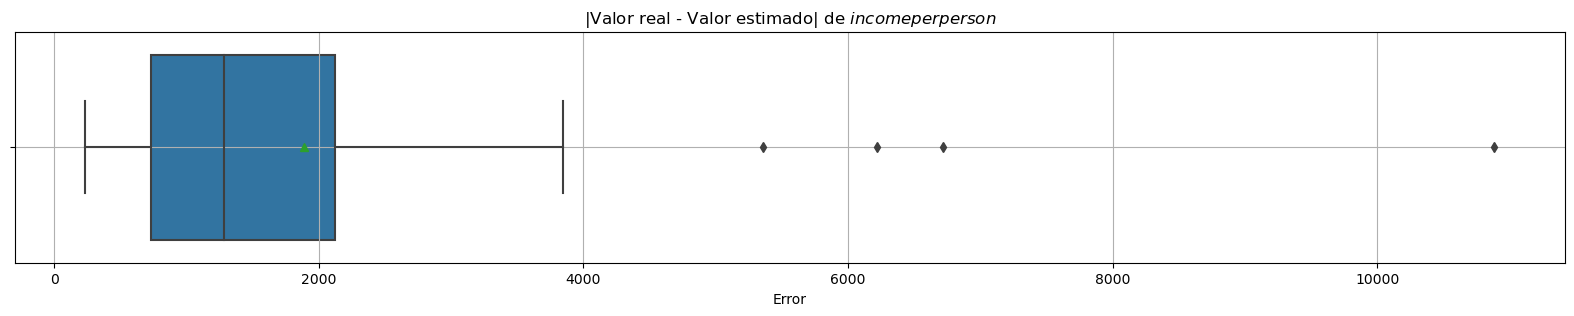

In [2111]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=abs(y_test - regression.predict(X_test)), showmeans=True, orient="h")
plt.title("|Valor real - Valor estimado| de $\t{incomeperperson}$")
plt.xlabel("Error")
plt.grid()
plt.show()

In [2112]:
abs(y_test-regression.predict(X_test)).describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count       41.000000
mean      1886.178362
std       2073.205887
min        234.146251
25%        727.535254
50%       1283.853422
75%       2119.453505
95%       6217.977110
99%       9218.554869
max      10886.623674
Name: incomeperperson, dtype: float64

Pese a tener un mejor ajuste, el error continua siendo considerable 

**Colinealidad:**

Es necesario que las variables utilizadas no tengan (o tengan muy baja) colinealidad (correlación).

<Axes: >

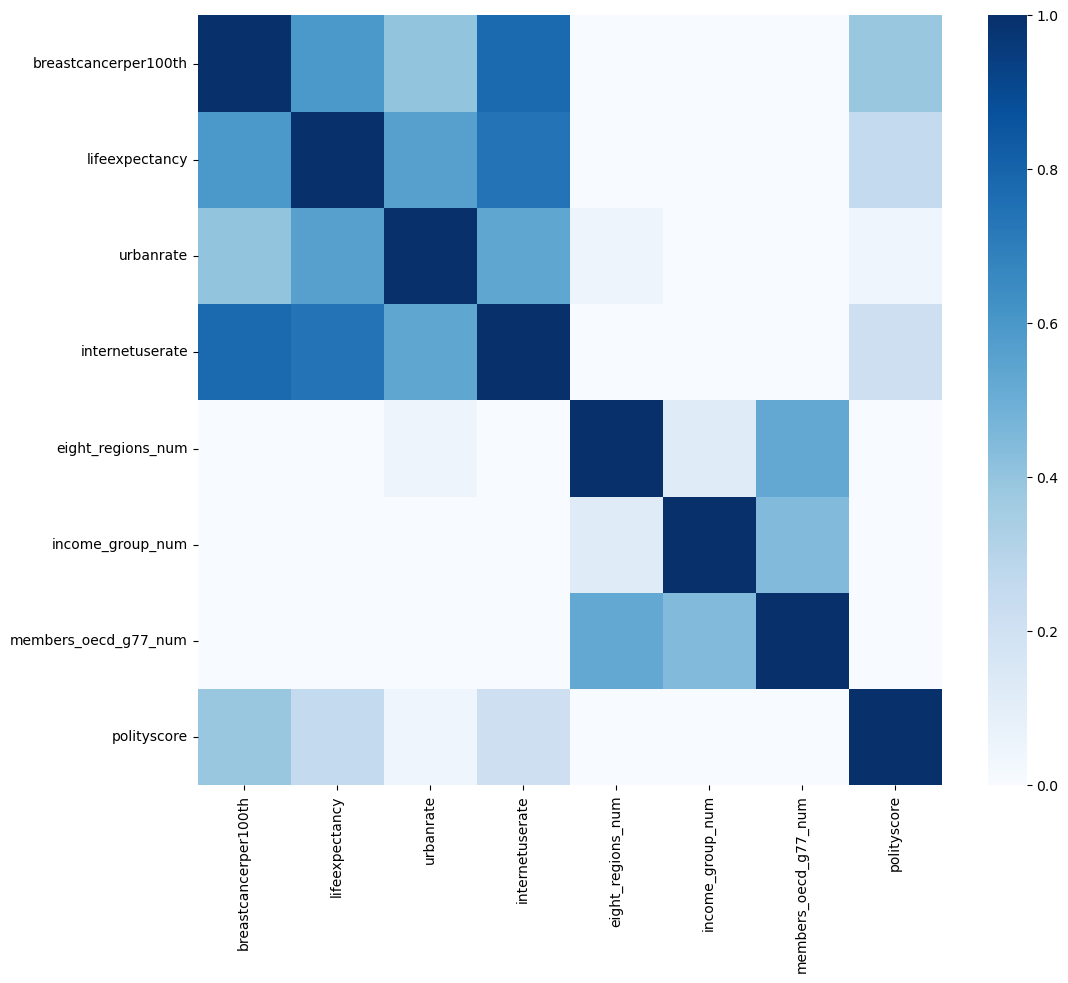

In [2113]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), cmap="Blues", vmin=0, vmax=1)

In [2114]:
X_train.corr()

breastcancerper100th  lifeexpectancy  urbanrate  \
breastcancerper100th              1.000000        0.597226   0.405631   
lifeexpectancy                    0.597226        1.000000   0.559784   
urbanrate                         0.405631        0.559784   1.000000   
internetuserate                   0.780465        0.740092   0.537352   
eight_regions_num                -0.339374       -0.094084   0.053188   
income_group_num                 -0.654058       -0.701611  -0.593758   
members_oecd_g77_num             -0.588970       -0.443118  -0.318455   
polityscore                       0.386991        0.257665   0.045454   

                      internetuserate  eight_regions_num  income_group_num  \
breastcancerper100th         0.780465          -0.339374         -0.654058   
lifeexpectancy               0.740092          -0.094084         -0.701611   
urbanrate                    0.537352           0.053188         -0.593758   
internetuserate              1.000000          -0.292454         -0.782869   
eight_regions_num           -0.292454           1.000000          0.118804   
income_group_num            -0.782869           0.118804          1.000000   
members_oecd_g77_num        -0.622780           0.526158          0.447590   
polityscore                  0.218063          -0.269935         -0.176564   

                      members_oecd_g77_num  polityscore  
breastcancerper100th             -0.588970     0.386991  
lifeexpectancy                   -0.443118     0.257665  
urbanrate                        -0.318455     0.045454  
internetuserate                  -0.622780     0.218063  
eight_regions_num                 0.526158    -0.269935  
income_group_num                  0.447590    -0.176564  
members_oecd_g77_num              1.000000    -0.205392  
polityscore                      -0.205392     1.000000

No se presentan correlaciones superirores al 90%.

**Linealidad:**

Es necesario que la relación entre cada variable de entrada y la varable objetivo sea lineal.

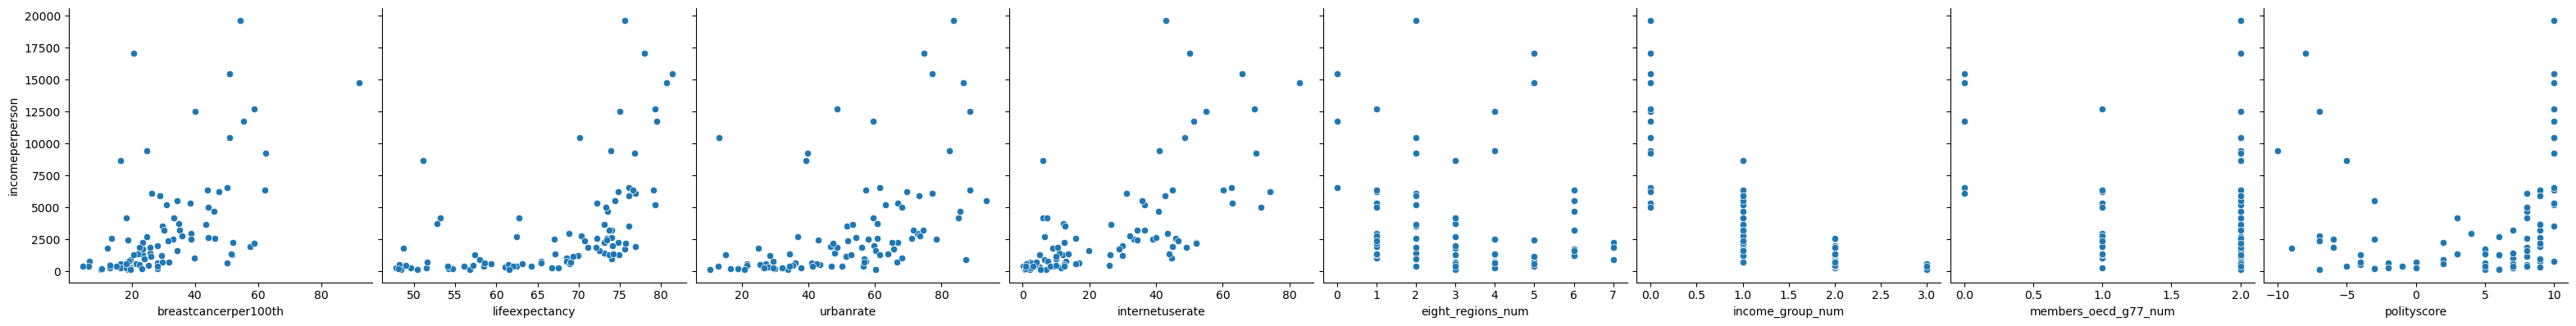

In [2115]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), height=4, y_vars="incomeperperson", x_vars=features, kind="scatter")

In [2116]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Realizar una prueba de correlación de Pearson para cada feature
for feature in features:
    corr, pvalue = stats.pearsonr(X_train[feature], y_train)
    print(f"Feature: {feature}")
    print(f"Correlación: {corr}")
    print(f"P-valor: {pvalue}")

Feature: breastcancerper100th
Correlación: 0.5630156357895492
P-valor: 4.243140463877692e-09
Feature: lifeexpectancy
Correlación: 0.5285998016488154
P-valor: 5.1449593860855334e-08
Feature: urbanrate
Correlación: 0.4898119980061437
P-valor: 6.261469868196807e-07
Feature: internetuserate
Correlación: 0.677438853712262
P-valor: 8.877369735125266e-14
Feature: eight_regions_num
Correlación: -0.16137183370849412
P-valor: 0.12227054287342515
Feature: income_group_num
Correlación: -0.7691955392111008
P-valor: 2.1549365743416505e-19
Feature: members_oecd_g77_num
Correlación: -0.379644230467928
P-valor: 0.00017460859916764384
Feature: polityscore
Correlación: 0.10064297169699553
P-valor: 0.33711612152385056


La correlación de Pearson es una medida de la fuerza y la dirección de la relación lineal entre dos variables.

Un valor de correlación cercano a 1 indica una relación lineal positiva fuerte, un valor de correlación cercano a -1 indica una relación lineal negativa fuerte, y un valor de correlación cercano a 0 indica una relación lineal débil o inexistente.

El p-valor es la probabilidad de obtener un resultado de la prueba al azar, si no hay una relación lineal entre las variables. Un p-valor menor que 0.05 indica que la relación entre las variables es estadísticamente significativa. polityscore ya no muestra una relación lineal en este modelo.

**Normalidad de los errores:**

Los errores deben tener una distribución normal.

In [2117]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [2118]:
pipeline.fit(X_train[features], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [2119]:
errors = (pipeline.predict(X_train[features])-y_train).values

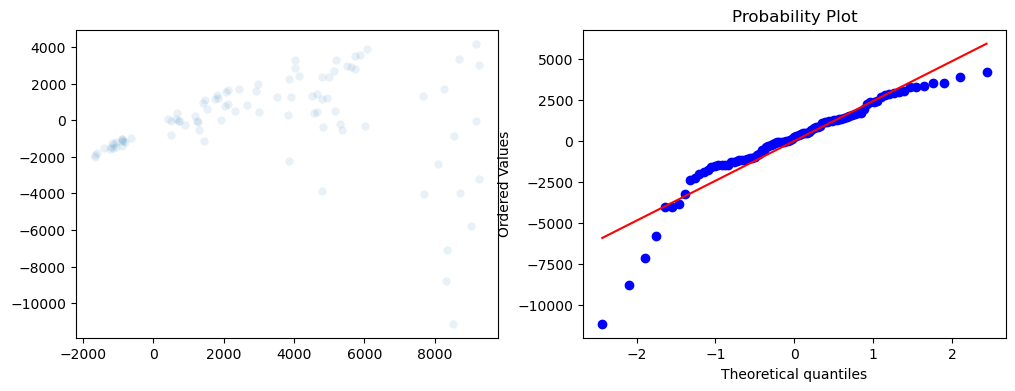

In [2120]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train[features]), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

In [2121]:
import numpy as np
import scipy.stats as stats

# Calcular el valor p de la prueba de normalidad de Shapiro-Wilk
p_value = stats.shapiro(errors)[1]

# Si el valor p es menor que 0.05, entonces la hipótesis nula de que los errores se distribuyen normalmente se rechaza
if p_value < 0.05:
    print("Los errores no se distribuyen normalmente")
else:
    print("Los errores se distribuyen normalmente")
    
p_value

Los errores no se distribuyen normalmente


1.0547745432631928e-06

Sin embargo, es importante tener en cuenta que la prueba de Shapiro-Wilk es una prueba muy sensible y puede detectar desviaciones de la normalidad incluso en muestras grandes. 

**Varianza constante (Homocedasticidad):**

La varianza en los errores debe mantenerse constante a medida que varia la variable objetivo.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     148.2
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           8.47e-21
Time:                        21:48:56   Log-Likelihood:                -860.53
No. Observations:                  93   AIC:                             1725.
Df Residuals:                      91   BIC:                             1730.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.466e-14    375.995  -1.19e-16      1.0

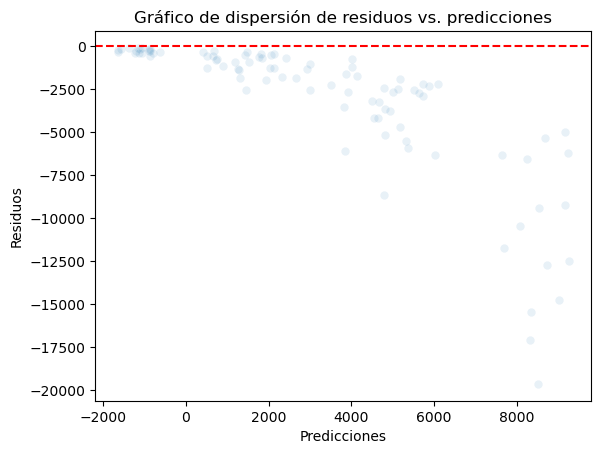

In [2122]:
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms  # Importa el módulo sms para pruebas de homocedasticidad
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un modelo 'pipeline' ajustado y datos 'X_train' y 'errors'

# Realiza predicciones del modelo en los datos de entrenamiento
predictions = pipeline.predict(X_train)

# Calcula los residuos
residuals = errors - predictions

# Realiza el gráfico de dispersión de residuos vs. predicciones
sns.scatterplot(x=predictions, y=residuals, alpha=0.1)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de dispersión de residuos vs. predicciones")

# Añade una línea horizontal en 0 para ayudar a visualizar la homocedasticidad
plt.axhline(0, color='red', linestyle='--')

# Ajusta un modelo de regresión lineal simple para evaluar homocedasticidad
X = sm.add_constant(predictions)
model = sm.OLS(residuals, X).fit()
print(model.summary())

# Realiza pruebas estadísticas para homocedasticidad
print("Test de Breusch-Pagan:")
_, p_value, _, _ = sms.het_breuschpagan(model.resid, X)
print(f"P-valor: {p_value}")

print("Test de White:")
_, p_value, _, _ = sms.het_white(model.resid, X)
print(f"P-valor: {p_value}")

plt.show()


En generar este segundo modelo presenta problemas de sub-ajuste y no se cumplen los supuestos de normalidad y homocedasticidad. 

**Ajuste Ridge:**

In [2123]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Supongamos que tienes tus datos de entrenamiento y prueba X_train, X_test, y_train, y_test

# Crea un objeto Ridge y ajusta el modelo
alpha = 1.0  # Parámetro de regularización, puedes ajustarlo según tus necesidades
ridge_regression = Ridge(alpha=alpha)
ridge_regression.fit(X_train, y_train)

# Realiza predicciones en el conjunto de entrenamiento y prueba
y_train_pred = ridge_regression.predict(X_train)
y_test_pred = ridge_regression.predict(X_test)

# Evalúa el rendimiento del modelo
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"RMSE en conjunto de entrenamiento: {train_rmse}")
print(f"RMSE en conjunto de prueba: {test_rmse}")

# Coeficientes del modelo Ridge
print("Coeficientes del modelo Ridge:")
print(ridge_regression.coef_)


RMSE en conjunto de entrenamiento: 2525.817654074347
RMSE en conjunto de prueba: 2781.043879708941
Coeficientes del modelo Ridge:
[   16.2379246    -43.58304385    12.81457277    43.09679542
  -160.15058024 -2545.69564127   490.01374681   -42.98118835]


In [2124]:
from scipy import stats

# Calcula los residuos del modelo Ridge
residuals = y_train - y_train_pred

# Realiza el test de Shapiro-Wilk para normalidad de los residuos
shapiro_test_statistic, shapiro_p_value = stats.shapiro(residuals)

# Imprime el valor estadístico y el valor p del test
print(f"Valor estadístico del test de Shapiro-Wilk: {shapiro_test_statistic}")
print(f"P-valor del test de Shapiro-Wilk: {shapiro_p_value}")

# Realiza una prueba de hipótesis sobre la normalidad de los residuos
alpha = 0.05  # Nivel de significancia
if shapiro_p_value < alpha:
    print("El test de Shapiro-Wilk rechaza la hipótesis nula (los residuos no siguen una distribución normal).")
else:
    print("El test de Shapiro-Wilk no rechaza la hipótesis nula (los residuos siguen una distribución normal).")



Valor estadístico del test de Shapiro-Wilk: 0.8867452144622803
P-valor del test de Shapiro-Wilk: 7.704512086093018e-07
El test de Shapiro-Wilk rechaza la hipótesis nula (los residuos no siguen una distribución normal).


In [2125]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

# Calcular los residuos del modelo Ridge
residuals = y_train - y_train_pred

# Agregar una constante al conjunto de entrenamiento para incluir el término de intercepto
X_train_with_const = sm.add_constant(X_train)

# Realizar el test de White para homocedasticidad
white_test = sms.het_white(residuals, X_train_with_const)

# Obtener el valor p del test
p_value = white_test[1]

# Imprimir el valor p
print(f"P-valor del test de White: {p_value}")

# Realizar una prueba de hipótesis sobre la homocedasticidad
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("El test de White rechaza la hipótesis nula (hay evidencia de heterocedasticidad).")
else:
    print("El test de White no rechaza la hipótesis nula (no hay evidencia de heterocedasticidad).")


P-valor del test de White: 0.01760056568325616
El test de White rechaza la hipótesis nula (hay evidencia de heterocedasticidad).


Pese al filtro aplicado el modelo 2 presenta un mejor ajuste a partir del MAE y RMSE. Sin embargo, no cumple los supuestos de la regresión y presenta un sub-ajuste considerable

### 3.2. Definición Modelo 3

In [2126]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

In [2127]:
features = ["breastcancerper100th", "lifeexpectancy", "urbanrate", "internetuserate", "eight_regions_num","income_group_num","members_oecd_g77_num","polityscore"]

Para este modelo, dado que los dos primeros presentaban retos para lograr un ajuste preciso y así mismo cumplir con los supuestos de la regresión debido a los valores extremos presentados en la variable de interés, se decide aplicar una transformación logarítmica sobre esta. Esta transformación logarítmica ayuda a reducir la influencia de los valores extremos y a mejorar la linealidad de la relación entre las variables predictoras y la variable objetivo, lo que puede conducir a un modelo más robusto y preciso.

La aplicación de esta transformación permite que los coeficientes estimados en el modelo de regresión tengan una interpretación más intuitiva, ya que representan el cambio porcentual en la variable de interés asociado a un cambio unitario en la variable predictora. Además, esta técnica puede contribuir a cumplir con los supuestos de normalidad y homocedasticidad de los errores, lo que es esencial para la validez de las inferencias estadísticas y la precisión de las predicciones.

En resumen, la transformación logarítmica se elige como una estrategia para abordar los desafíos específicos presentados por la variable objetivo y mejorar la calidad del modelo de regresión en términos de ajuste y cumplimiento de supuestos.

In [2128]:
import pandas as pd
import numpy as np

gapminder_transformed = gapminder.copy()

# Aplicamos una transformación logarítmica a la columna 'incomeperperson' en 'gapminder_transformed'
gapminder_transformed['incomeperperson'] = np.log(gapminder_transformed['incomeperperson'])

# Ahora 'gapminder_transformed' contiene los mismos datos que 'gapminder', pero con 'incomeperperson' transformada


In [2129]:
gapminder.shape

(156, 31)

In [2130]:
gapminder_transformed.shape

(156, 31)

In [2131]:
X_train, X_test, y_train, y_test = train_test_split(gapminder_transformed[features], gapminder_transformed["incomeperperson"], test_size=0.3, random_state=1)

In [2132]:
X_train.shape, y_train.shape

((109, 8), (109,))

In [2133]:
X_test.shape, y_test.shape

((47, 8), (47,))

In [2134]:
regression = LinearRegression()

In [2135]:
regression.fit(X_train, y_train)

LinearRegression()

In [2136]:
pd.DataFrame({"columns": features, "coef": regression.coef_})

columns      coef
0  breastcancerper100th  0.006079
1        lifeexpectancy  0.010110
2             urbanrate  0.009409
3       internetuserate  0.010032
4     eight_regions_num -0.008421
5      income_group_num -0.942878
6  members_oecd_g77_num  0.124470
7           polityscore -0.003999

In [2137]:
regression.intercept_

7.1301101251731955

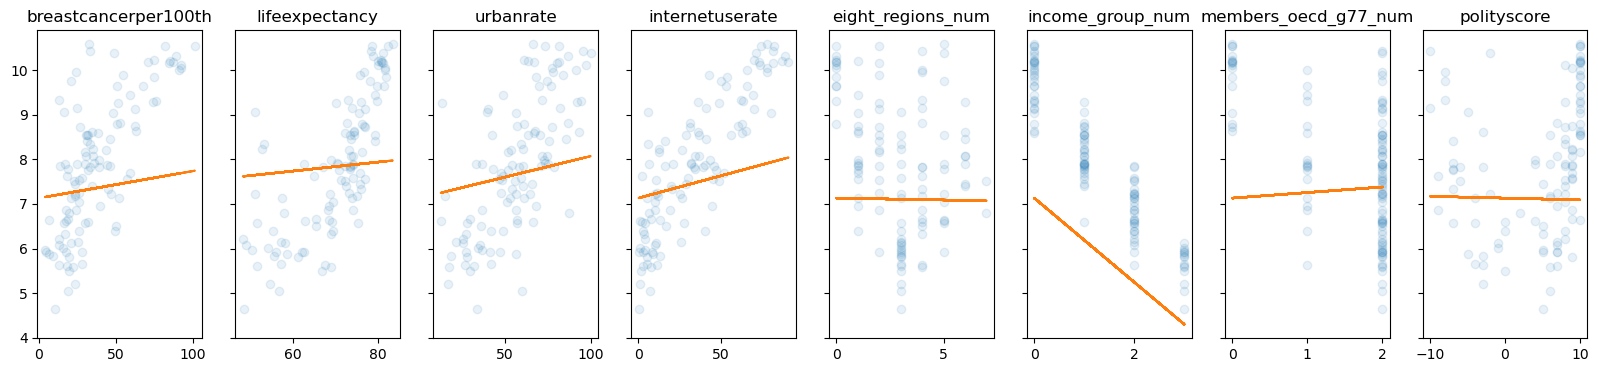

In [2138]:
f, axs = plt.subplots(1, len(features), sharey=True, figsize=(20, 4))

for i in range(len(features)):
    col = features[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

**Validación (evaluación) del modelo:**

**Mean Absolute Error (MAE)**

$$ MAE = {1 \over n}{\sum_{i=1}^n {|y_{i} - y_{i}'|} } $$

In [2139]:
print("Train:", mean_absolute_error(y_train, regression.predict(X_train)))
print("Test:", mean_absolute_error(y_test, regression.predict(X_test)))

Train: 0.3614747697546367
Test: 0.44246138506765165


**Root Mean Squeared Error (RMSE)**

$$ RMSE = {1 \over n}{\sum_{i=1}^n {(y_{i} - y_{i}')^2} } $$

In [2140]:
print("Train:", np.sqrt(mean_squared_error(y_train, regression.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, regression.predict(X_test))))

Train: 0.4573724768913242
Test: 0.5292394521657633


**Análisis del error**

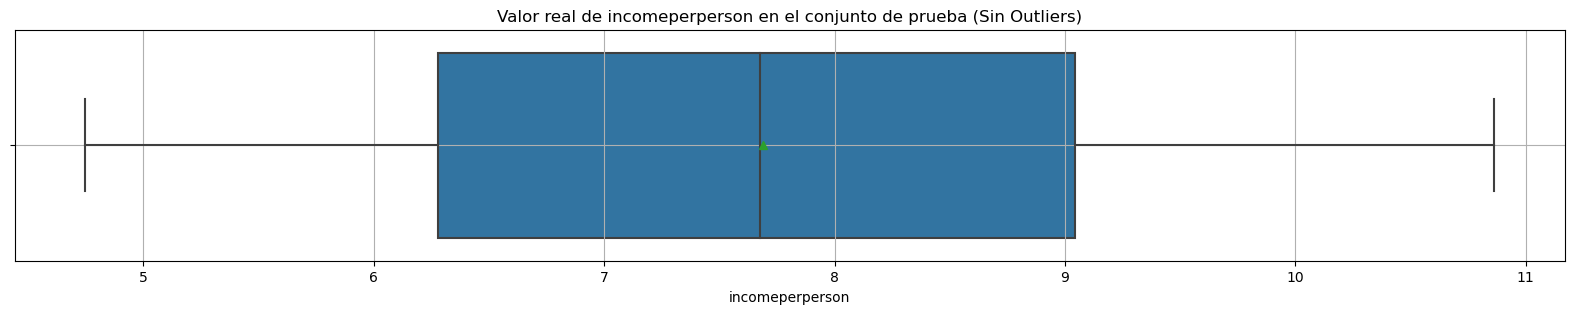

count    47.000000
mean      7.688940
std       1.758667
min       4.747589
25%       6.280724
50%       7.678579
75%       9.044751
99%      10.741116
max      10.864782
Name: incomeperperson, dtype: float64

In [2141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de Matplotlib con Seaborn
plt.figure(figsize=(20, 3))

# Calcular los límites del boxplot sin outliers
q1 = y_test.quantile(0.25)
q3 = y_test.quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Filtrar los valores que no son outliers
y_test_filtered = y_test[(y_test >= lower_limit) & (y_test <= upper_limit)]

# Crear el boxplot y mostrar los valores medios
sns.boxplot(x=y_test_filtered, showmeans=True, orient="h")

# Título del gráfico
plt.title("Valor real de incomeperperson en el conjunto de prueba (Sin Outliers)")

# Mostrar la cuadrícula
plt.grid()

# Mostrar el gráfico
plt.show()

# Estadísticas descriptivas con percentiles
y_test_filtered.describe(percentiles=[0.25, 0.5, 0.75, 0.99])




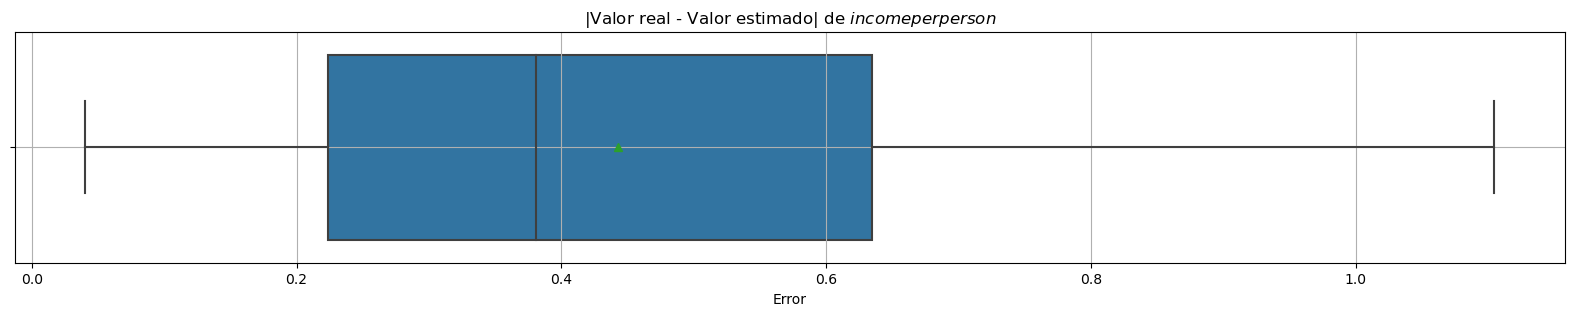

In [2142]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=abs(y_test - regression.predict(X_test)), showmeans=True, orient="h")
plt.title("|Valor real - Valor estimado| de $\t{incomeperperson}$")
plt.xlabel("Error")
plt.grid()
plt.show()

In [2143]:
abs(y_test-regression.predict(X_test)).describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count    47.000000
mean      0.442461
std       0.293522
min       0.040365
25%       0.223616
50%       0.380567
75%       0.634341
95%       0.932275
99%       1.086008
max       1.104850
Name: incomeperperson, dtype: float64

**Validación de supuestos de la regresión:**

La construcción de un buen modelo de Machine Learning va más allá de solamente minimizar las métricas de error. El modelo de regresión lineal, desde una perspectiva clásica, debería además cumplir con los siguientes supuestos:

*Se volverán a revisar algunos aspectos que se habían descubierto en la etapa de entendimiento de los datos.*

**Colinealidad:**

Es necesario que las variables utilizadas no tengan (o tengan muy baja) colinealidad (correlación).

<Axes: >

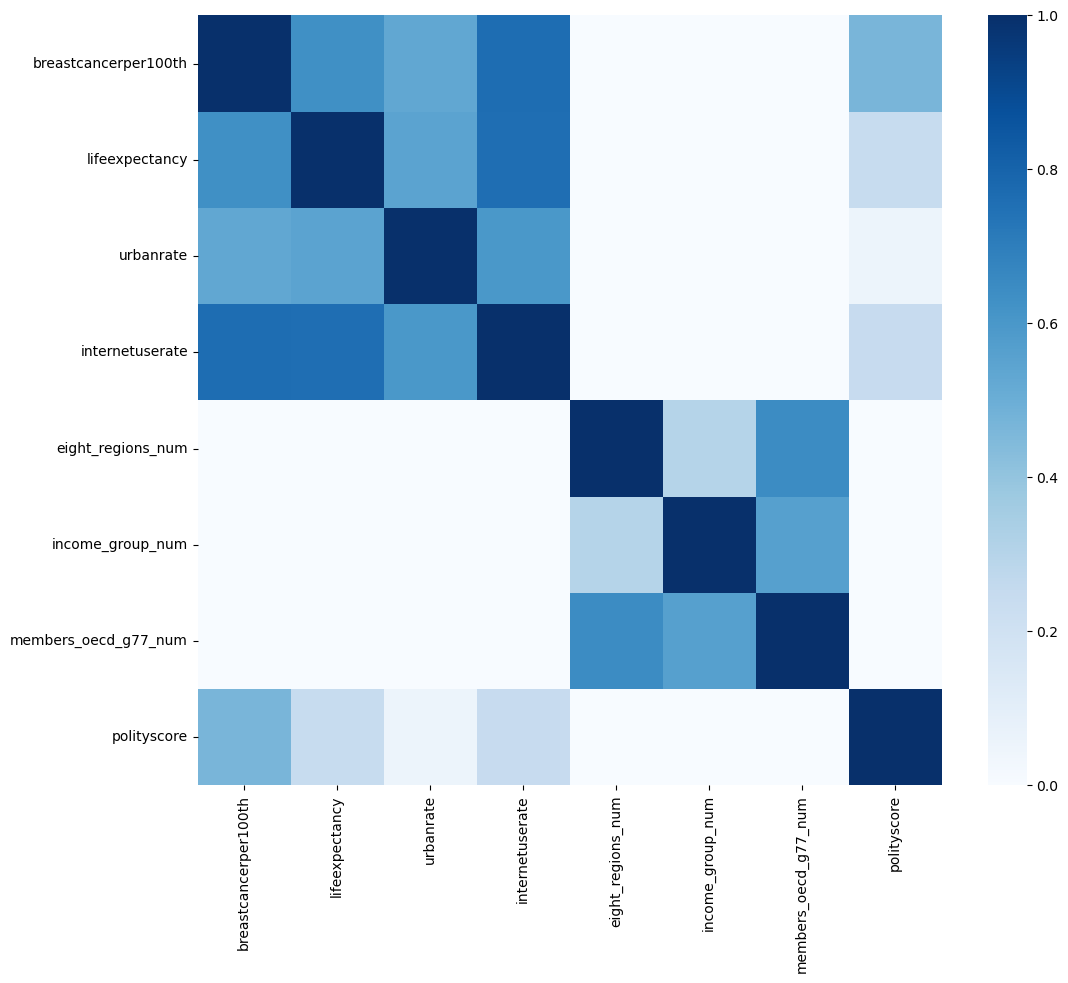

In [2144]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), cmap="Blues", vmin=0, vmax=1)

In [2145]:
X_train.corr()

breastcancerper100th  lifeexpectancy  urbanrate  \
breastcancerper100th              1.000000        0.629705   0.529873   
lifeexpectancy                    0.629705        1.000000   0.547242   
urbanrate                         0.529873        0.547242   1.000000   
internetuserate                   0.762357        0.760436   0.598640   
eight_regions_num                -0.524722       -0.228033  -0.074678   
income_group_num                 -0.677641       -0.726835  -0.624354   
members_oecd_g77_num             -0.708190       -0.518879  -0.357091   
polityscore                       0.468102        0.244141   0.056761   

                      internetuserate  eight_regions_num  income_group_num  \
breastcancerper100th         0.762357          -0.524722         -0.677641   
lifeexpectancy               0.760436          -0.228033         -0.726835   
urbanrate                    0.598640          -0.074678         -0.624354   
internetuserate              1.000000          -0.404416         -0.827119   
eight_regions_num           -0.404416           1.000000          0.302926   
income_group_num            -0.827119           0.302926          1.000000   
members_oecd_g77_num        -0.706738           0.648201          0.564715   
polityscore                  0.246409          -0.371283         -0.218721   

                      members_oecd_g77_num  polityscore  
breastcancerper100th             -0.708190     0.468102  
lifeexpectancy                   -0.518879     0.244141  
urbanrate                        -0.357091     0.056761  
internetuserate                  -0.706738     0.246409  
eight_regions_num                 0.648201    -0.371283  
income_group_num                  0.564715    -0.218721  
members_oecd_g77_num              1.000000    -0.359346  
polityscore                      -0.359346     1.000000

No se presenta correlaciónes superiores al 90%.

**Linealidad**

Es necesario que la relación entre cada variable de entrada y la varable objetivo sea lineal.

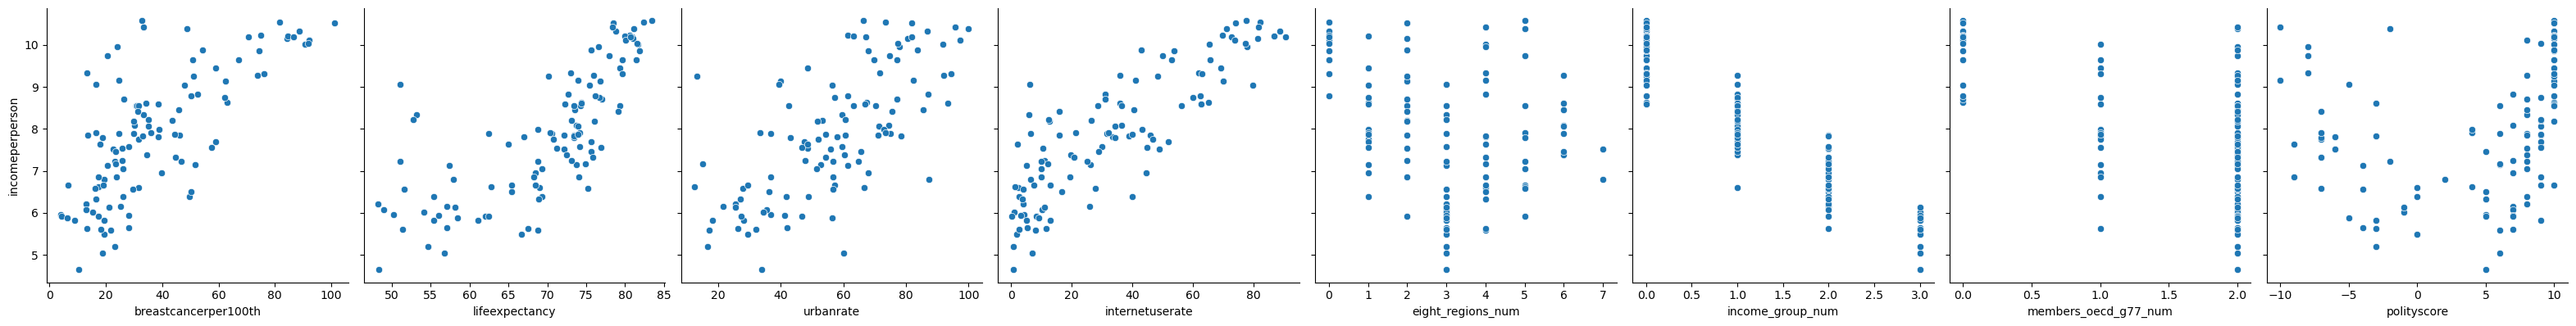

In [2146]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), height=4, y_vars="incomeperperson", x_vars=features, kind="scatter")

In [2147]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Realizar una prueba de correlación de Pearson para cada feature
for feature in features:
    corr, pvalue = stats.pearsonr(X_train[feature], y_train)
    print(f"Feature: {feature}")
    print(f"Correlación: {corr}")
    print(f"P-valor: {pvalue}")

Feature: breastcancerper100th
Correlación: 0.7173522546884893
P-valor: 1.7117164034448397e-18
Feature: lifeexpectancy
Correlación: 0.7522163660526211
P-valor: 4.185170429560897e-21
Feature: urbanrate
Correlación: 0.6929772822668989
P-valor: 6.882715799652341e-17
Feature: internetuserate
Correlación: 0.8518168647450595
P-valor: 8.102565870940626e-32
Feature: eight_regions_num
Correlación: -0.29867359831943635
P-valor: 0.0016070376432278002
Feature: income_group_num
Correlación: -0.9325181793021607
P-valor: 3.8466791187380564e-49
Feature: members_oecd_g77_num
Correlación: -0.5647293370419874
P-valor: 1.5936196415779153e-10
Feature: polityscore
Correlación: 0.21199048445090482
P-valor: 0.02690141915012965


La correlación de Pearson es una medida de la fuerza y la dirección de la relación lineal entre dos variables.

Un valor de correlación cercano a 1 indica una relación lineal positiva fuerte, un valor de correlación cercano a -1 indica una relación lineal negativa fuerte, y un valor de correlación cercano a 0 indica una relación lineal débil o inexistente.

El p-valor es la probabilidad de obtener un resultado de la prueba al azar, si no hay una relación lineal entre las variables. Un p-valor menor que 0.05 indica que la relación entre las variables es estadísticamente significativa. Todas las variables tienen una relación lineal al 5%. 

**Normalidad de los errores:**

Los errores deben tener una distribución normal.

In [2148]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [2149]:
pipeline.fit(X_train[features], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [2150]:
errors = (pipeline.predict(X_train[features])-y_train).values

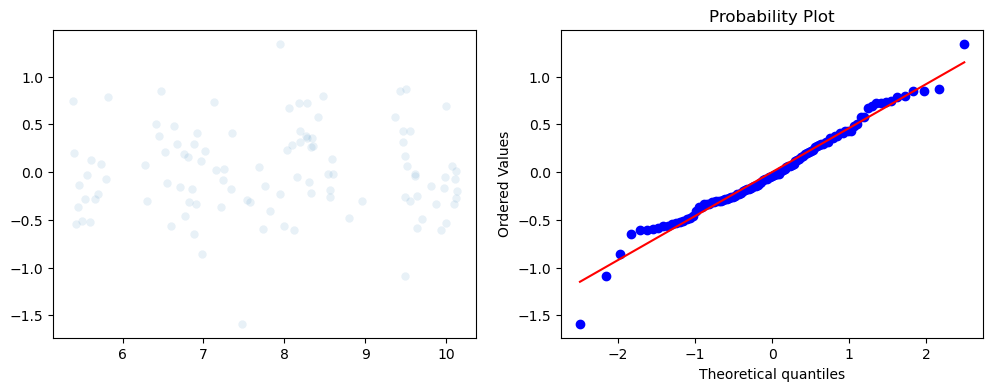

In [2151]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train[features]), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

**Normalidad de los errores:**

Los errores deben tener una distribución normal.

In [2152]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [2153]:
pipeline.fit(X_train[features], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [2154]:
errors = (pipeline.predict(X_train[features])-y_train).values

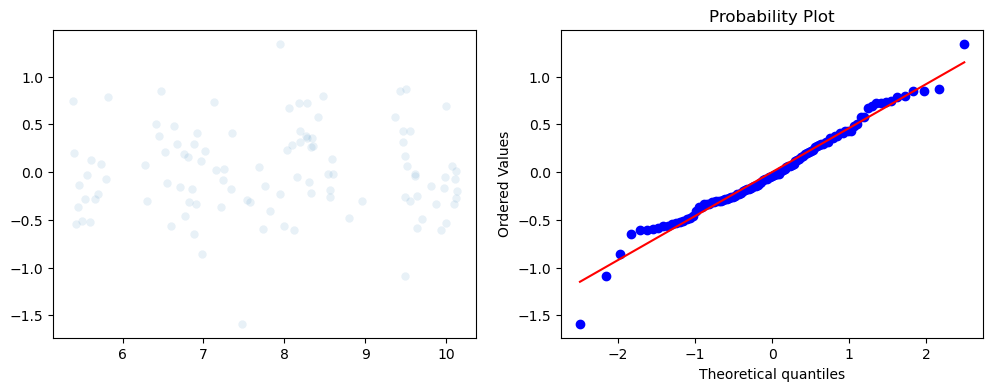

In [2155]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train[features]), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

In [2156]:
import numpy as np
import scipy.stats as stats

# Calcular el valor p de la prueba de normalidad de Shapiro-Wilk
p_value = stats.shapiro(errors)[1]

# Si el valor p es menor que 0.05, entonces la hipótesis nula de que los errores se distribuyen normalmente se rechaza
if p_value < 0.05:
    print("Los errores no se distribuyen normalmente")
else:
    print("Los errores se distribuyen normalmente")
    
p_value

Los errores se distribuyen normalmente


0.16107167303562164

Sin embargo, es importante tener en cuenta que la prueba de Shapiro-Wilk es una prueba muy sensible y puede detectar desviaciones de la normalidad incluso en muestras grandes. 

**Varianza constante (Homocedasticidad):**

La varianza en los errores debe mantenerse constante a medida que varia la variable objetivo.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1063.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.13e-57
Time:                        21:49:03   Log-Likelihood:                -69.398
No. Observations:                 109   AIC:                             142.8
Df Residuals:                     107   BIC:                             148.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.778e-15      0.245   7.25e-15      1.0

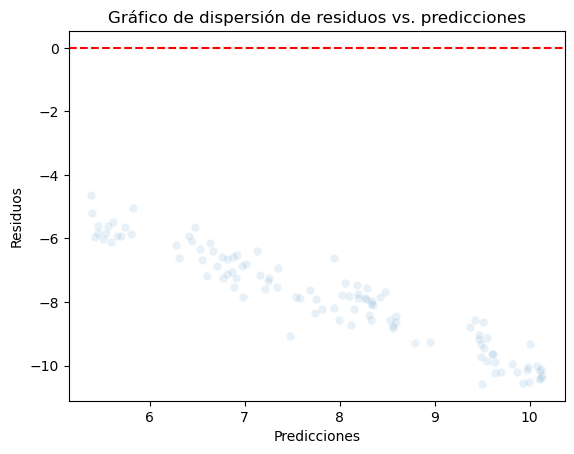

In [2157]:
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms  # Importa el módulo sms para pruebas de homocedasticidad
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un modelo 'pipeline' ajustado y datos 'X_train' y 'errors'

# Realiza predicciones del modelo en los datos de entrenamiento
predictions = pipeline.predict(X_train)

# Calcula los residuos
residuals = errors - predictions

# Realiza el gráfico de dispersión de residuos vs. predicciones
sns.scatterplot(x=predictions, y=residuals, alpha=0.1)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de dispersión de residuos vs. predicciones")

# Añade una línea horizontal en 0 para ayudar a visualizar la homocedasticidad
plt.axhline(0, color='red', linestyle='--')

# Ajusta un modelo de regresión lineal simple para evaluar homocedasticidad
X = sm.add_constant(predictions)
model = sm.OLS(residuals, X).fit()
print(model.summary())

# Realiza pruebas estadísticas para homocedasticidad
print("Test de Breusch-Pagan:")
_, p_value, _, _ = sms.het_breuschpagan(model.resid, X)
print(f"P-valor: {p_value}")

print("Test de White:")
_, p_value, _, _ = sms.het_white(model.resid, X)
print(f"P-valor: {p_value}")

plt.show()


Segmentación de modelos dado el no cumplimiento de supuestos

**Ajuste Ridge:**

In [2158]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Supongamos que tienes tus datos de entrenamiento y prueba X_train, X_test, y_train, y_test

# Crea un objeto Ridge y ajusta el modelo
alpha = 1.0  # Parámetro de regularización, puedes ajustarlo según tus necesidades
ridge_regression = Ridge(alpha=alpha)
ridge_regression.fit(X_train, y_train)

# Realiza predicciones en el conjunto de entrenamiento y prueba
y_train_pred = ridge_regression.predict(X_train)
y_test_pred = ridge_regression.predict(X_test)

# Evalúa el rendimiento del modelo
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"RMSE en conjunto de entrenamiento: {train_rmse}")
print(f"RMSE en conjunto de prueba: {test_rmse}")

# Coeficientes del modelo Ridge
print("Coeficientes del modelo Ridge:")
print(ridge_regression.coef_)


RMSE en conjunto de entrenamiento: 0.4576488558440154
RMSE en conjunto de prueba: 0.5259227066030175
Coeficientes del modelo Ridge:
[ 0.00613172  0.0107057   0.00964895  0.01059591 -0.00768807 -0.91324208
  0.12023225 -0.00399304]


In [2159]:
from scipy import stats

# Calcula los residuos del modelo Ridge
residuals = y_train - y_train_pred

# Realiza el test de Shapiro-Wilk para normalidad de los residuos
shapiro_test_statistic, shapiro_p_value = stats.shapiro(residuals)

# Imprime el valor estadístico y el valor p del test
print(f"Valor estadístico del test de Shapiro-Wilk: {shapiro_test_statistic}")
print(f"P-valor del test de Shapiro-Wilk: {shapiro_p_value}")

# Realiza una prueba de hipótesis sobre la normalidad de los residuos
alpha = 0.05  # Nivel de significancia
if shapiro_p_value < alpha:
    print("El test de Shapiro-Wilk rechaza la hipótesis nula (los residuos no siguen una distribución normal).")
else:
    print("El test de Shapiro-Wilk no rechaza la hipótesis nula (los residuos siguen una distribución normal).")



Valor estadístico del test de Shapiro-Wilk: 0.98185133934021
P-valor del test de Shapiro-Wilk: 0.1440800577402115
El test de Shapiro-Wilk no rechaza la hipótesis nula (los residuos siguen una distribución normal).


In [2160]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

# Calcular los residuos del modelo Ridge
residuals = y_train - y_train_pred

# Agregar una constante al conjunto de entrenamiento para incluir el término de intercepto
X_train_with_const = sm.add_constant(X_train)

# Realizar el test de White para homocedasticidad
white_test = sms.het_white(residuals, X_train_with_const)

# Obtener el valor p del test
p_value = white_test[1]

# Imprimir el valor p
print(f"P-valor del test de White: {p_value}")

# Realizar una prueba de hipótesis sobre la homocedasticidad
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("El test de White rechaza la hipótesis nula (hay evidencia de heterocedasticidad).")
else:
    print("El test de White no rechaza la hipótesis nula (no hay evidencia de heterocedasticidad).")


P-valor del test de White: 0.028646761996354103
El test de White rechaza la hipótesis nula (hay evidencia de heterocedasticidad).


En general, el modelo presenta un mejor ajuste en comparación con los modelos anteriores y cumple con los supuestos de un modelo de regresión lineal. Al aplicar una transformación Ridge, no se evidencia una mejora significativa en el rendimiento del modelo, pero sí se observa una pérdida de interpretabilidad en los coeficientes. Por lo tanto, se opta por utilizar exclusivamente el último modelo, que incluye la transformación logarítmica sobre la variable de interés, para realizar las recomendaciones.

Es importante destacar que, debido a la transformación logarítmica aplicada a la variable de interés, los coeficientes del modelo ahora se interpretan de manera diferente. En lugar de representar un cambio unitario en la variable predictora que afecta directamente a la variable objetivo, los coeficientes indican el cambio porcentual asociado a un cambio unitario en la variable predictora. Esta interpretación puede brindar información valiosa sobre la relación entre las variables y facilitar la toma de decisiones basadas en el modelo.

En conclusión, el último modelo con la transformación logarítmica se considera el más adecuado para proporcionar recomendaciones sobre políticas potenciales debido a su mejor ajuste y cumplimiento de supuestos, a pesar de la nueva interpretación de los coeficientes.

<div style="background-color: blue; height: 2px;"></div>

## 4.[25%] Generación de resultados: Redacte un informe ejecutivo o una presentación
corta en donde muestre los hallazgos o insights más importantes en términos de
entendimiento de los datos, métricas de error e interpretación del modelo.
Responda a la pregunta: dado que un alto PIB puede representar un buen
comportamiento de pago de un país, a partir de las relaciones más importantes
que, según el modelo de regresión, existe entre el PIB y otros indicadores, ¿qué
conjunto de políticas públicas recomendaría implementar, a partir de la premisa de
que la mejora en estas áreas indicaría al Banco Mundial que el país es estable, está
en una trayectoria de desarrollo sostenible y tiene la capacidad de administrar y
reembolsar préstamos de manera efectiva?
